In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import itertools
import warnings

warnings.filterwarnings("ignore")
sns.set_style('darkgrid')
%matplotlib inline

In [6]:
# set the max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

## Loading the dataframe and analyse the columns

In [7]:
loan = pd.read_csv("data/loan/loan.csv")

In [8]:
loan.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [9]:
loan.shape

(39717, 111)

In [10]:
loan.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count  39717.000000    39717.000000            14035.000000   
mean       0.146512        0.869200               35.900962   
std        0.491812        1.070219               22.020060   
min        0.000000        0.000000                0.000000   
25%        0.000000        0.000000               18.000000   
50%        0.000000        1.000000               34.000000   
75%        0.000000        1.000000               52.000000   
max       11.000000        8.000000              120.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count             2786.000000  39717.000000  39717.000000   39717.000000   
mean                69.698134      9.294408      0.055065   13382.528086   
std                 43.822529      4.400282      0.237200   15885.016641   
min                  0.000000      2.000000      0.000000       0.000000   
25%                 22.000000      6.000000      0.000000    3703.000000   
50%                 90.000000      9.000000      0.000000    8850.000000   
75%                104.000000     12.000000      0.000000   17058.000000   
max                129.000000     44.000000      4.000000  149588.000000   

          total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count  39717.000000  39717.000000   39717.000000  39717.000000   
mean      22.088828     51.227887      50.989768  12153.596544   
std       11.401709    375.172839     373.824457   9042.040766   
min        2.000000      0.000000       0.000000      0.000000   
25%       13.000000      0.000000       0.000000   5576.930000   
50%       20.000000      0.000000       0.000000   9899.640319   
75%       29.000000      0.000000       0.000000  16534.433040   
max       90.000000   6311.470000    6307.370000  58563.679930   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count     39717.000000     39717.000000   39717.000000        39717.000000   
mean      11567.149118      9793.348813    2263.663172            1.363015   
std        8942.672613      7065.522127    2608.111964            7.289979   
min           0.000000         0.000000       0.000000            0.000000   
25%        5112.310000      4600.000000     662.180000            0.000000   
50%        9287.150000      8000.000000    1348.910000            0.000000   
75%       15798.810000     13653.260000    2833.400000            0.000000   
max       58563.680000     35000.020000   23563.680000          180.200000   

         recoveries  collection_recovery_fee  last_pymnt_amnt  \
count  39717.000000             39717.000000     39717.000000   
mean      95.221624                12.406112      2678.826162   
std      688.744771               148.671593      4447.136012   
min    

# Data Preprocessing

## Analysis for null/na values

In [11]:
tmp = loan.isnull().sum().rename("nulls")
null_counts  = tmp.to_frame()
null_counts

nulls
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                        2459
emp_length                       1075
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                            12940
purpose                             0
title                              11
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq          25682
mths_since_last_record          36931
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                         50
total_acc                           0
initial_list_status                 0
out_prncp                           0
out_prncp_inv                       0
total_pymnt                         0
total_pymnt_inv                     0
total_rec_prncp                     0
total_rec_int                       0
total_rec_late_fee                  0
recoveries                          0
collection_recovery_fee             0
last_pymnt_d                       71
last_pymnt_amnt                     0
next_pymnt_d                    38577
last_credit_pull_d                  2
collections_12_mths_ex_med         56
mths_since_last_major_derog     39717
policy_code                         0
application_type                    0
annual_inc_joint                39717
dti_joint                       39717
verification_status_joint       39717
acc_now_delinq                      0
tot_coll_amt                    39717
tot_cur_bal                     39717
open_acc_6m                     39717
open_il_6m                      39717
open_il_12m                     39717
open_il_24m                     39717
mths_since_rcnt_il              39717
total_bal_il                    39717
il_util                         39717
open_rv_12m                     39717
open_rv_24m                     39717
max_bal_bc                      39717
all_util                        39717
total_rev_hi_lim                39717
inq_fi                          39717
total_cu_tl                     39717
inq_last_12m                    39717
acc_open_past_24mths            39717
avg_cur_bal                     39717
bc_open_to_buy                  39717
bc_util                         39717
chargeoff_within_12_mths           56
delinq_amnt                         0
mo_sin_old_il_acct              39717
mo_sin_old_rev_tl_op            39717
mo_sin_rcnt_rev_tl_op           39717
mo_sin_rcnt_tl                  39717
mort_acc                        39717
mths_since_recent_bc            39717
mths_since_recent_bc_dlq        39717
mths_since_recent_inq           39717
mths_since_recent_revol_delinq  39717
num_accts_ever_120_pd           39717
num_actv_bc_tl                  39717
num_actv_rev_tl                 39717
num_bc_sats                     39717
num_bc_tl                       39717
num_il_tl                       39717
num_op_rev_tl                   39717
num_rev_accts                   39717
num_rev_tl_bal_gt_0             39717
num_sats                        39717
num_tl_120dpd_2m                39717
num_tl_30dpd                    39717
num_tl_90g_dpd_24m              39717
num_tl_op_past_12m              39717
pct_tl_nvr_dlq                  39717
percent_bc_gt_75                39717
pub_

In [12]:
nullsColummns = null_counts[null_counts["nulls"]>0]

In [13]:
print(f'columns with nulls: {nullsColummns.shape}')
print(f'dataframe shape: {loan.shape}')

columns with nulls: (68, 1)
dataframe shape: (39717, 111)


In [14]:
all_null_values = nullsColummns[nullsColummns["nulls"]== 39717].index.to_list()
print(f'before dropping :\n Columns with all values null: {len(all_null_values)},\n Total null cols: {nullsColummns.shape},\n dataframe shape: {loan.shape}\n\n')
loan.drop(columns=all_null_values, inplace=True)
print(f'before dropping :\n Columns with all values null: {len(all_null_values)},\n Total null cols: {nullsColummns.shape},\n dataframe shape: {loan.shape}')

before dropping :
 Columns with all values null: 54,
 Total null cols: (68, 1),
 dataframe shape: (39717, 111)


before dropping :
 Columns with all values null: 54,
 Total null cols: (68, 1),
 dataframe shape: (39717, 57)


In [15]:
some_nulls_columns = nullsColummns[nullsColummns["nulls"]!= 39717].index.to_list()
print("Columns with some values as nulls : ",len(some_nulls_columns))
some_nulls_df =  nullsColummns[nullsColummns["nulls"]!= 39717].sort_values(by="nulls")
some_nulls_df

Columns with some values as nulls :  14


nulls
last_credit_pull_d              2
title                          11
tax_liens                      39
revol_util                     50
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
last_pymnt_d                   71
pub_rec_bankruptcies          697
emp_length                   1075
emp_title                    2459
desc                        12940
mths_since_last_delinq      25682
mths_since_last_record      36931
next_pymnt_d                38577

In [16]:
loan[some_nulls_columns].describe()

mths_since_last_delinq  mths_since_last_record  \
count            14035.000000             2786.000000   
mean                35.900962               69.698134   
std                 22.020060               43.822529   
min                  0.000000                0.000000   
25%                 18.000000               22.000000   
50%                 34.000000               90.000000   
75%                 52.000000              104.000000   
max                120.000000              129.000000   

       collections_12_mths_ex_med  chargeoff_within_12_mths  \
count                     39661.0                   39661.0   
mean                          0.0                       0.0   
std                           0.0                       0.0   
min                           0.0                       0.0   
25%                           0.0                       0.0   
50%                           0.0                       0.0   
75%                           0.0                       0.0   
max                           0.0                       0.0   

       pub_rec_bankruptcies  tax_liens  
count          39020.000000    39678.0  
mean               0.043260        0.0  
std                0.204324        0.0  
min                0.000000        0.0  
25%                0.000000        0.0  
50%                0.000000        0.0  
75%                0.000000        0.0  
max                2.000000        0.0

In [17]:
# checking each of the columns with some missing values
for some_null in some_nulls_columns:
    print("Column : ", some_null + " \n")
    print("Describe : \n",loan[some_null].describe())

    null_count= loan[some_null].isna().sum()

    print("\nnulls count : " ,null_count)
    print("nulls %     : ","{0:.3f}%".format((100*null_count)/loan.shape[0]))
    print("\nValue Counts : \n",loan[some_null].value_counts().sort_values(ascending=False))
    print("_______________\n\n")

Column :  emp_title 

Describe : 
 count       37258
unique      28820
top       US Army
freq          134
Name: emp_title, dtype: object

nulls count :  2459
nulls %     :  6.191%

Value Counts : 
 US Army                     134
Bank of America             109
IBM                          66
AT&T                         59
Kaiser Permanente            56
                           ... 
P.M.A.M.                      1
Bailard                       1
American General Finance      1
HKS  Inc.                     1
Evergreen Center              1
Name: emp_title, Length: 28820, dtype: int64
_______________


Column :  emp_length 

Describe : 
 count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

nulls count :  1075
nulls %     :  2.707%

Value Counts : 
 10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      14


nulls count :  2
nulls %     :  0.005%

Value Counts : 
 May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
Jan-16      657
Dec-15      647
Mar-13      577
Mar-14      564
Dec-14      562
Jul-14      555
Sep-14      546
Jul-15      535
Feb-14      531
Nov-15      529
Oct-14      529
Aug-14      522
Jan-14      516
Sep-15      512
Oct-15      502
Nov-14      497
Apr-14      494
Nov-13      473
May-14      473
Jun-14      466
May-13      448
Jan-15      440
Apr-13      425
May-15      423
Dec-13      422
Aug-15      422
Oct-13      416
Nov-12      404
Jul-13      396
Sep-12      391
Sep-13      390
Apr-15      388
Aug-12      377
Jun-15      375
Dec-12      374
Mar-15      371
Aug-13      370
Jun-13      370
Feb-12      368
Feb-15      358
Mar-12      338
Oct-12      332
May-12      324
Apr-12      308
Jun-12      308
Jul-12      297
Jan-12      258
Mar-11      257
Aug-11      254
Dec-11      245
Nov-11      201
May-11      193
Jun-11      165
Sep-11      15

In [18]:
some_nulls_df.sort_values(by="nulls", ascending=False, inplace=True)
some_nulls_df

nulls
next_pymnt_d                38577
mths_since_last_record      36931
mths_since_last_delinq      25682
desc                        12940
emp_title                    2459
emp_length                   1075
pub_rec_bankruptcies          697
last_pymnt_d                   71
collections_12_mths_ex_med     56
chargeoff_within_12_mths       56
revol_util                     50
tax_liens                      39
title                          11
last_credit_pull_d              2

## Analysis for variance of values

In [19]:
# Analysing missing values in depth
colLengths = []
sampleValues = []
types = []
missing = []
missingCount = []

for column in loan.columns:
    colLengths.append(len(loan[column].value_counts()))
    sampleValues.append(loan[column].value_counts().index[0])
    types.append(type(loan[column].value_counts().index[0]))
    missingCount_ = loan[column].isna().sum()
    missingCount.append(missingCount_)
    missing.append(missingCount_ *100 / loan.shape[0])

data = {"column": loan.columns, "uniqueValues": colLengths,"sample_value":sampleValues,"type":types,"missingCount":missingCount,"missing Percentage":missing}

columnMetadata = pd.DataFrame(data)
columnMetadata.sort_values(by="uniqueValues", inplace=True)
columnMetadata

column  uniqueValues  \
56                   tax_liens             1   
54                 delinq_amnt             1   
53    chargeoff_within_12_mths             1   
52              acc_now_delinq             1   
51            application_type             1   
50                 policy_code             1   
49  collections_12_mths_ex_med             1   
17                  pymnt_plan             1   
35         initial_list_status             1   
5                         term             2   
47                next_pymnt_d             2   
55        pub_rec_bankruptcies             3   
16                 loan_status             3   
14         verification_status             3   
31                     pub_rec             5   
12              home_ownership             5   
8                        grade             7   
27              inq_last_6mths             9   
11                  emp_length            11   
25                 delinq_2yrs            11   
20                     purpose            14   
9                    sub_grade            35   
30                    open_acc            40   
23                  addr_state            50   
15                     issue_d            55   
34                   total_acc            82   
28      mths_since_last_delinq            95   
45                last_pymnt_d           101   
48          last_credit_pull_d           106   
29      mths_since_last_record           111   
6                     int_rate           371   
26            earliest_cr_line           526   
22                    zip_code           823   
2                    loan_amnt           885   
3                  funded_amnt          1041   
33                  revol_util          1089   
36                   out_prncp          1137   
37               out_prncp_inv          1138   
42          total_rec_late_fee          1356   
44     collection_recovery_fee          2616   
24                         dti          2868   
43                  recoveries          4040   
13                  annual_inc          5318   
40             total_rec_prncp          7976   
4              funded_amnt_inv          8205   
7                  installment         15383   
21                       title         19615   
32                   revol_bal         21711   
19                        desc         26527   
10                   emp_title         28820   
46             last_pymnt_amnt         34930   
41               total_rec_int         35148   
39             total_pymnt_inv         37518   
38                 total_pymnt         37850   
18                         url         39717   
1                    member_id         39717   
0                           id         39717   

                                         sample_value  \
56                                                0.0   
54                                                  0   
53                                                0.0   
52                                                  0   
51                                         INDIVIDUAL   
50                                                  1   
49                                                0.0   
17                                                  n   
35                                                  f   
5                                           36 months   
47                                             Jun-16   
55                                                0.0   
16                                         Fully Paid   
14                                       Not Verified   
31                                                  0   
12                                               RENT   
8                                                   B   
27                                                  0   
11                                          10+ years   
25                                                  0   
20                                 debt_co

## Attributes ignorable based on data and stats

In [20]:
# Dropping columns that have only one unique value or with missing values >= 90%
columnsCanBeIgnored = columnMetadata[ (columnMetadata['uniqueValues']==1) |  (columnMetadata['missing Percentage'] >= 90)] 
columnsCanBeIgnored

column  uniqueValues sample_value  \
56                   tax_liens             1          0.0   
54                 delinq_amnt             1            0   
53    chargeoff_within_12_mths             1          0.0   
52              acc_now_delinq             1            0   
51            application_type             1   INDIVIDUAL   
50                 policy_code             1            1   
49  collections_12_mths_ex_med             1          0.0   
17                  pymnt_plan             1            n   
35         initial_list_status             1            f   
47                next_pymnt_d             2       Jun-16   
29      mths_since_last_record           111          0.0   

                       type  missingCount  missing Percentage  
56  <class 'numpy.float64'>            39            0.098195  
54    <class 'numpy.int64'>             0            0.000000  
53  <class 'numpy.float64'>            56            0.140998  
52    <class 'numpy.int64'>             0            0.000000  
51            <class 'str'>             0            0.000000  
50    <class 'numpy.int64'>             0            0.000000  
49  <class 'numpy.float64'>            56            0.140998  
17            <class 'str'>             0            0.000000  
35            <class 'str'>             0            0.000000  
47            <class 'str'>         38577           97.129693  
29  <class 'numpy.float64'>         36931           92.985372

In [21]:
loan.drop(columns=columnsCanBeIgnored['column'], inplace=True)

## Attributes that still having missing values

In [22]:
stillMissing = loan.isna().sum().rename("missing").to_frame()
colList = stillMissing[stillMissing['missing']>0].index.to_list()
stillMissing = columnMetadata[columnMetadata['column'].isin(colList)]
stillMissing

column  uniqueValues        sample_value  \
55    pub_rec_bankruptcies             3                 0.0   
11              emp_length            11           10+ years   
28  mths_since_last_delinq            95                 0.0   
45            last_pymnt_d           101              May-16   
48      last_credit_pull_d           106              May-16   
33              revol_util          1089                  0%   
21                   title         19615  Debt Consolidation   
19                    desc         26527                       
10               emp_title         28820             US Army   

                       type  missingCount  missing Percentage  
55  <class 'numpy.float64'>           697            1.754916  
11            <class 'str'>          1075            2.706650  
28  <class 'numpy.float64'>         25682           64.662487  
45            <class 'str'>            71            0.178765  
48            <class 'str'>             2            0.005036  
33            <class 'str'>            50            0.125891  
21            <class 'str'>            11            0.027696  
19            <class 'str'>         12940           32.580507  
10            <class 'str'>          2459            6.191303

## Attributes ignorable based on business importance

In [23]:
# creating new column desc_length, it'll be 0 for NANs
loan['derived_desc_length'] = loan['desc'].apply(lambda x: len(x.strip()) if x==x else 0)

In [24]:
# dropping these columns as then have no importance to the analysis
attrsToBeignored = ['id','member_id','url','desc','mths_since_last_delinq','last_credit_pull_d']
loan.drop(attrsToBeignored, inplace=True, axis=1)

## Imputations for ```pub_rec_bankruptcies```, ```emp_length```, ```last_pymnt_d```, ```revol_util```, ```title```, ```emp_title```

In [25]:
loan['pub_rec_bankruptcies'] = loan.pub_rec_bankruptcies.apply(lambda x: x if x==x else 0)
loan['emp_length'] = loan.emp_length.apply(lambda x: x if x==x else 'Unknwon')
loan['last_pymnt_d'] = loan.last_pymnt_d.apply(lambda x: x if x==x else 'Jan-00')
loan['revol_util'] = loan.revol_util.apply(lambda x: x if x==x else 0)
loan['title'] = loan.title.apply(lambda x: x if x==x else 'Unknown')
loan['emp_title'] = loan.emp_title.apply(lambda x: x if x==x else 'Unknown')

In [26]:
loan.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late

## Records to drop


In [27]:
# Loans that are currently in progress are of no importance to the analysis
print(f"Loans that are currently in progress: {(loan['loan_status']=='Current').sum()}")
loan.drop(loan[loan['loan_status']=='Current'].index, inplace=True)

Loans that are currently in progress: 1140


In [28]:
#checking for duplicate records
loan.duplicated().sum()

0

No duplicate records found

In [29]:
loan.shape

(38577, 41)

## Handle Invalid Values

In [30]:
dataTypeMetadata = loan.dtypes
coltypes = dataTypeMetadata.rename("type").to_frame()
coltypes.reset_index(inplace=True)

# Columns with Object type
allObjectTypeColumns = coltypes[coltypes['type'] == 'object']
objectcols = allObjectTypeColumns['index'].to_list()
objectcols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'revol_util',
 'last_pymnt_d']

### Data cleaning : trimming standardize the case of all columns

In [31]:
BOLD = '\033[1m'
END = '\033[0m'

for objectcol in objectcols:
    loan["derived_"+objectcol] = loan[objectcol].apply(lambda x: str(x).strip().lower())
    print(BOLD + objectcol + END, " :\n")
    print(loan[objectcol].value_counts())
    print("-----------------------")

term  :

 36 months    29096
 60 months     9481
Name: term, dtype: int64
-----------------------
int_rate  :

10.99%    913
11.49%    790
7.51%     787
13.49%    749
7.88%     725
7.49%     651
9.99%     590
7.90%     574
5.42%     573
11.71%    559
11.99%    483
10.37%    467
12.69%    451
6.03%     447
8.49%     434
5.79%     410
12.99%    409
12.42%    403
10.65%    403
7.29%     397
6.62%     396
11.86%    391
8.90%     386
9.63%     378
10.59%    358
9.91%     357
5.99%     347
14.27%    344
7.14%     341
6.99%     336
11.11%    331
12.53%    327
10.74%    311
6.54%     305
6.91%     303
8.94%     294
16.77%    294
7.66%     292
13.61%    291
13.98%    284
13.23%    263
11.12%    259
15.99%    259
6.17%     252
12.68%    251
10.75%    250
10.36%    250
10.00%    249
11.36%    247
13.99%    241
11.83%    233
10.62%    228
10.38%    219
13.06%    219
10.25%    218
16.49%    218
14.96%    214
15.65%    208
18.25%    207
11.14%    206
6.92%     204
12.18%    203
15.23%    200
15.95% 

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
        ... 
463xx      1
381xx      1
592xx      1
414xx      1
469xx      1
Name: zip_code, Length: 822, dtype: int64
-----------------------
addr_state  :

CA    6949
NY    3698
FL    2781
TX    2659
NJ    1790
IL    1478
PA    1468
VA    1369
GA    1359
MA    1297
OH    1178
MD    1023
AZ     849
WA     818
CO     766
NC     750
CT     726
MI     704
MO     670
MN     605
NV     479
SC     459
WI     440
AL     435
OR     435
LA     427
KY     311
OK     287
KS     255
UT     252
AR     235
DC     211
RI     194
NM     183
WV     172
NH     166
HI     166
DE     113
MT      83
WY      80
AK      78
SD      62
VT      53
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64
-----------------------
earliest_cr_line  :

Oct-99    360
Nov-98    357
Oct-00    341
Dec-98    340
Dec-97    318
         ... 
Nov-65      1
Feb-73      1
Oct-08      1
Dec-61      1
Oct-74    

## Creating new columns from existing columns

In [32]:
def correct_year(date, yearboundary=2017):
    if date.year > yearboundary:
        return date.replace(year=date.year-100)
    else:
        return date

In [33]:
loan['derived_int_rate_pct']   =  loan['int_rate'].apply(lambda x: x[:-1]).astype(np.float16)

loan['derived_revol_util_pct'] =  loan['revol_util'].apply(lambda x: x[:-1] if str(x).endswith("%") else x).astype(np.float16)

loan['derived_issue_d_date']     =  pd.to_datetime(loan['issue_d'], format="%b-%y").apply(lambda x: correct_year(x, 2017))
loan['derived_issue_d_year']     =  loan['derived_issue_d_date'].dt.year
loan['derived_issue_d_month']    =  loan['derived_issue_d_date'].dt.month

loan['derived_last_pymnt_d_date']     =  pd.to_datetime(loan['last_pymnt_d'], format="%b-%y")
loan['derived_last_pymnt_d_date']     = loan['derived_last_pymnt_d_date'].apply(lambda x: correct_year(x, 2020))
loan['derived_last_pymnt_d_year']     =  loan['derived_last_pymnt_d_date'].dt.year
loan['derived_last_pymnt_d_month']    =  loan['derived_last_pymnt_d_date'].dt.month

loan['derived_earliest_cr_line_date']   =  pd.to_datetime(loan['earliest_cr_line'], format="%b-%y").apply(lambda x: correct_year(x, 2017))
loan['derived_earliest_cr_line_month']  =  loan['derived_earliest_cr_line_date'].dt.month
loan['derived_earliest_cr_line_year']   =  loan['derived_earliest_cr_line_date'].dt.year

loan['derived_zip_code']= loan['zip_code'].apply(lambda x: x[:-2])

In [34]:
# Converting month and year from number to string
def monthToNum(monthNum):
  months = {1: 'January', 2: 'February', 3: 'March', 4: 'April',5: 'May', 6: 'June',7: 'July', 8: 'August', 9: 'September',  10: 'October',  11: 'November',  12: 'December'}
  return months.get(monthNum, 'NaN')

loan['derived_earliest_cr_line_year'] = loan['derived_earliest_cr_line_year'].astype(str)
loan['derived_earliest_cr_line_month'] = loan['derived_earliest_cr_line_month'].apply(monthToNum)
loan['derived_issue_d_year'] = loan['derived_issue_d_year'].astype(str)
loan['derived_issue_d_month'] = loan['derived_issue_d_month'].apply(monthToNum)

In [35]:
# not using these columns as new cols are derived out of it
redundant_cols = ['derived_earliest_cr_line', 'derived_int_rate', 'revol_util', 'derived_revol_util', 'issue_d', 
                  'last_pymnt_d', 'earliest_cr_line', 'term', 
                  'int_rate', 'grade', 'sub_grade', 'emp_title',
                  'emp_length', 'home_ownership', 'verification_status', 
                  'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 
                  'addr_state', 'earliest_cr_line', 'last_pymnt_d']
loan.drop(redundant_cols, axis=1, inplace=True)

# Univariate Analysis

In [36]:
loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   loan_amnt                       38577 non-null  int64         
 1   funded_amnt                     38577 non-null  int64         
 2   funded_amnt_inv                 38577 non-null  float64       
 3   installment                     38577 non-null  float64       
 4   annual_inc                      38577 non-null  float64       
 5   dti                             38577 non-null  float64       
 6   delinq_2yrs                     38577 non-null  int64         
 7   inq_last_6mths                  38577 non-null  int64         
 8   open_acc                        38577 non-null  int64         
 9   pub_rec                         38577 non-null  int64         
 10  revol_bal                       38577 non-null  int64         
 11  to

In [37]:
# separating out categorical and numerical variables
categorical = []
numerical = []
for col in loan.columns:
  if loan[col].dtype == object:
    categorical.append(col)
  else:
    numerical.append(col)
print(f"categorical: {categorical}\n")
print(f"numerical: {numerical}")

categorical: ['derived_term', 'derived_grade', 'derived_sub_grade', 'derived_emp_title', 'derived_emp_length', 'derived_home_ownership', 'derived_verification_status', 'derived_issue_d', 'derived_loan_status', 'derived_purpose', 'derived_title', 'derived_zip_code', 'derived_addr_state', 'derived_last_pymnt_d', 'derived_issue_d_year', 'derived_issue_d_month', 'derived_earliest_cr_line_month', 'derived_earliest_cr_line_year']

numerical: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'derived_desc_length', 'derived_int_rate_pct', 'derived_revol_util_pct', 'derived_issue_d_date', 'derived_last_pymnt_d_date', 'derived_last_pymnt_d_year', 'derived_last_pymnt_d_month', 'de

In [38]:
categorical_cols = loan[categorical]
numeric_cols = loan[numerical]

## Categorical univariate analysis

In [39]:
# method to add annotations to bar plots
def add_annots(ax, data, percentage=False):
  if percentage:
    data = round(100 * data / data.sum(), 2)
    data = data.apply(lambda x : str(x) + "%")
  for patch, value in zip(ax.patches, data):
    ax.annotate(value, xy=(patch.get_x() +patch.get_width() / 2, patch.get_height()), ha='center', va='bottom', color='black')

In [40]:
# method to plot rank frequency plot
def frequency_plot(col, title, xlabel, ylabel, annot_percent=False, figsize=None, xtick_rotation=0):
  value_counts = categorical_cols[col].value_counts()
  if figsize:
    plt.figure(figsize=figsize)

  plt.title(title)
  ax = sns.barplot(x=value_counts.index, y=value_counts, palette=sns.color_palette('pastel'))
  add_annots(ax, value_counts, annot_percent)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.xticks(rotation=xtick_rotation)
  plt.show()

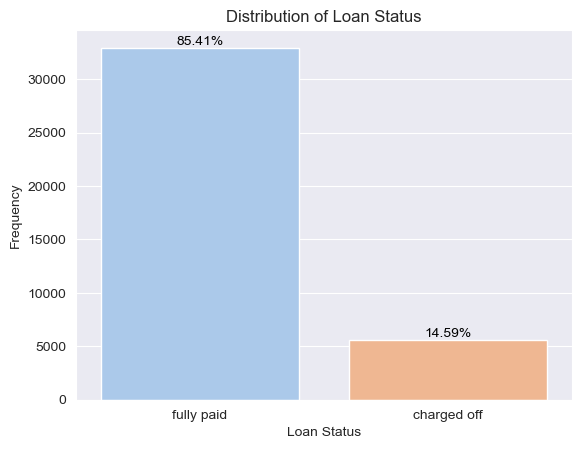

In [41]:
# bar plot for 'loan_status'
frequency_plot('derived_loan_status', 'Distribution of Loan Status', 'Loan Status', 'Frequency', True)

Around 85% of the loans were fully paid and \~14% defaulted.

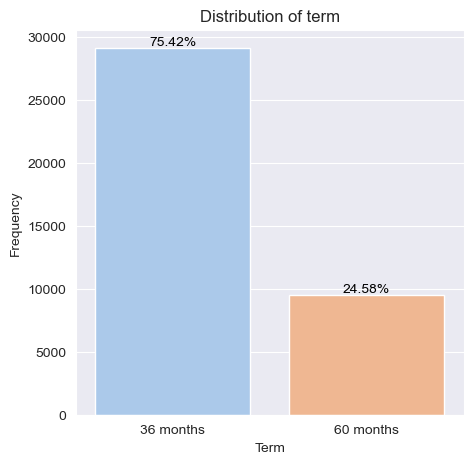

In [42]:
# bar plot for 'term'
frequency_plot('derived_term', 'Distribution of term', 'Term', 'Frequency', True, (5, 5))

From the above bar chart, it is clear that most borrowers (\~75%) prefer a term of 36 months more than 60 months.

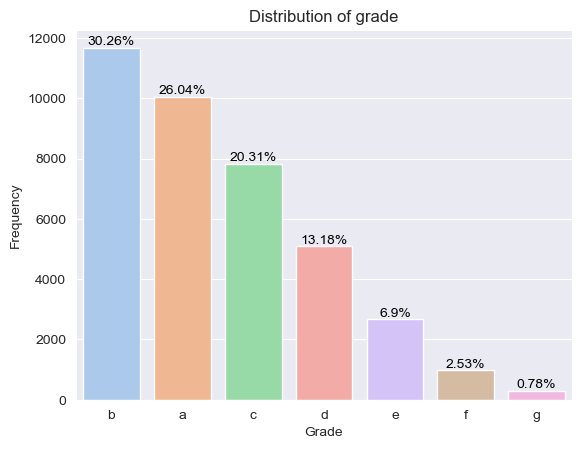

In [43]:
# bar plot for 'grade'
frequency_plot('derived_grade', 'Distribution of grade', 'Grade', 'Frequency', True)

Most loans were given to borrowers with a grade of B (\~30%), followed by A (\~26%) and so on.

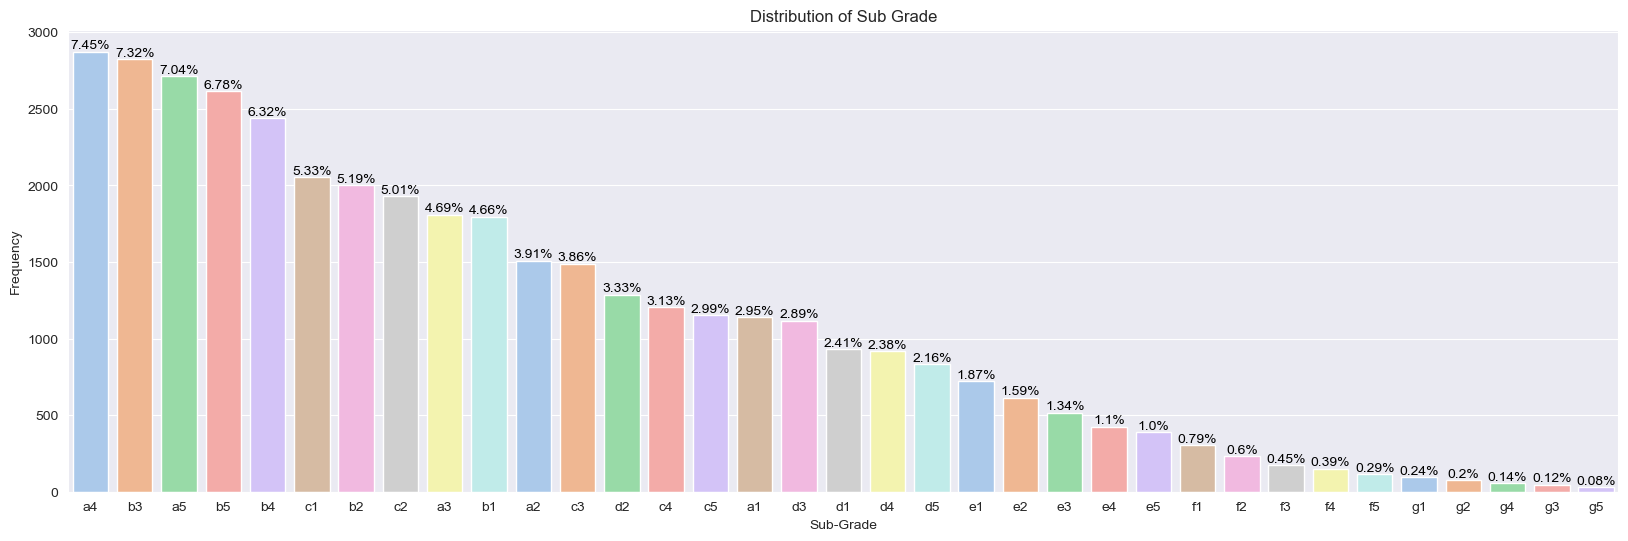

In [44]:
# bar plot for 'sub_grade'
frequency_plot('derived_sub_grade', 'Distribution of Sub Grade', 'Sub-Grade', 'Frequency', True, (20, 6))

Borrowers of most approved loans fall under A4, B3 category, closely followed by A5.

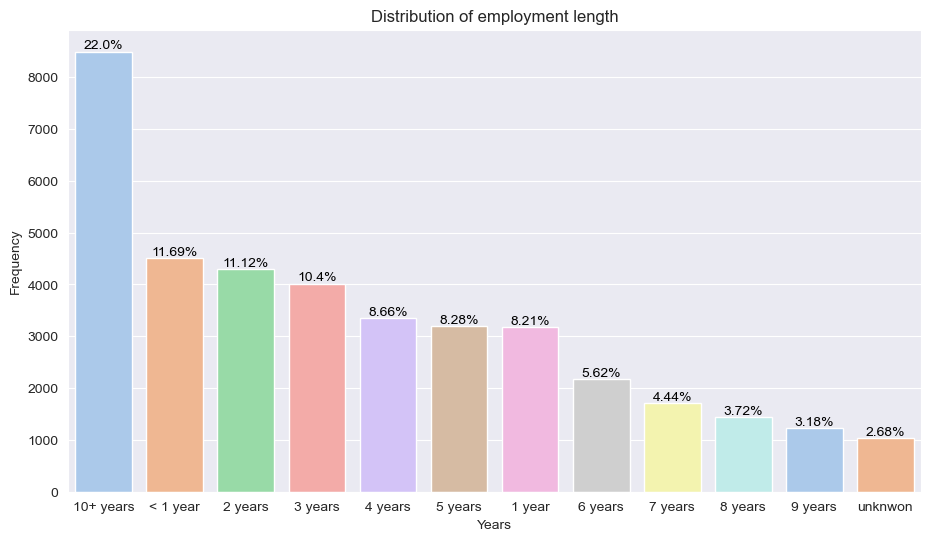

In [45]:
# bar plot for 'emp_length'
frequency_plot('derived_emp_length', 'Distribution of employment length', 'Years', 'Frequency', True, (11, 6))

- Loans of borrowers who have been working 10+ years gets approved more than others.
- It is to be noted that the Distribution does not consistently decrease with no. of years of employment. It can be seen that people with \<1 year, 2 years, etc employment have a higher frequency compared to people with 6, 7, 8 or 9 years. i.e. There is no proper trend with the loan approvals with respect to employment years.

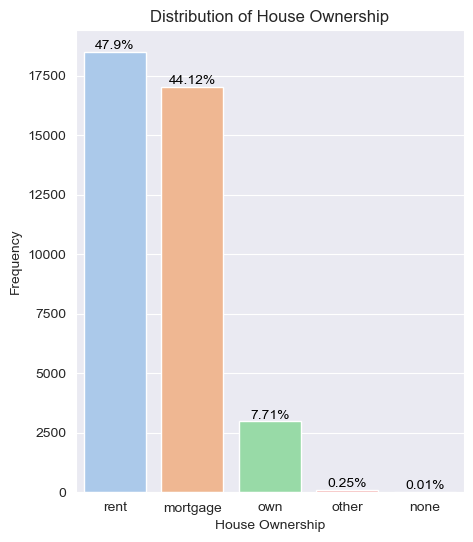

In [46]:
# bar plot for 'home_ownership'
frequency_plot('derived_home_ownership', 'Distribution of House Ownership', 'House Ownership', 'Frequency', True, (5, 6))

Most of the borrowers have a rented house or mortgage.

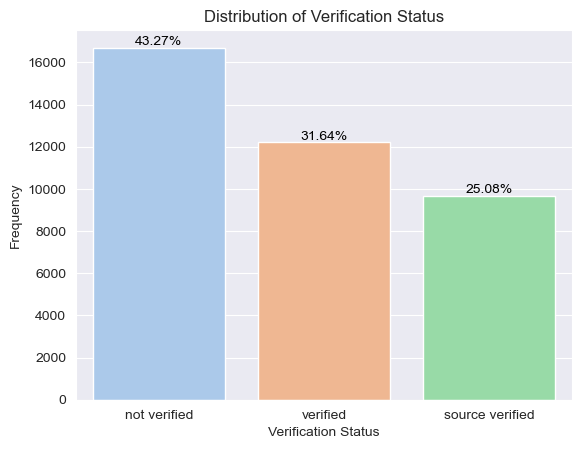

In [47]:
# bar plot for 'verification_status'
frequency_plot('derived_verification_status', 'Distribution of Verification Status', 'Verification Status', 'Frequency', True)

Most of the loans were given without verifying income of the borrower.

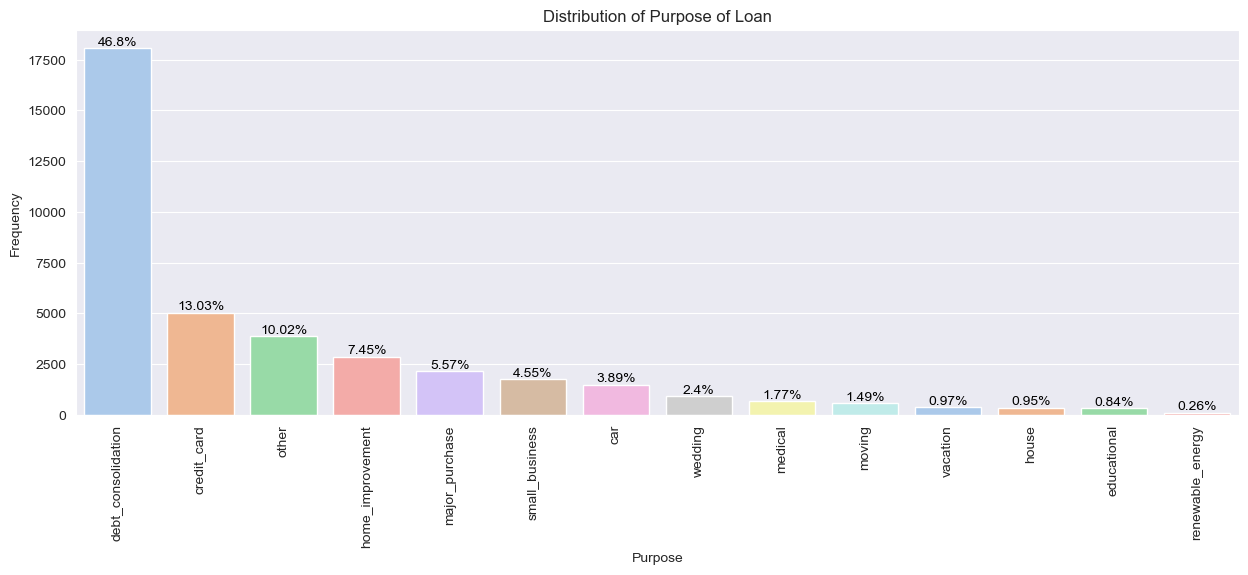

In [48]:
# bar plot for 'purpose'
frequency_plot('derived_purpose', 'Distribution of Purpose of Loan', 'Purpose', 'Frequency', True, (15, 5), 90)

- Most loans were taken for dept consolidation i.e. taking a loan to pay off many other loans.
- Considering other purposes, people mostly get credit card loans followed by other (purpose unspecified), home improvement and so on.

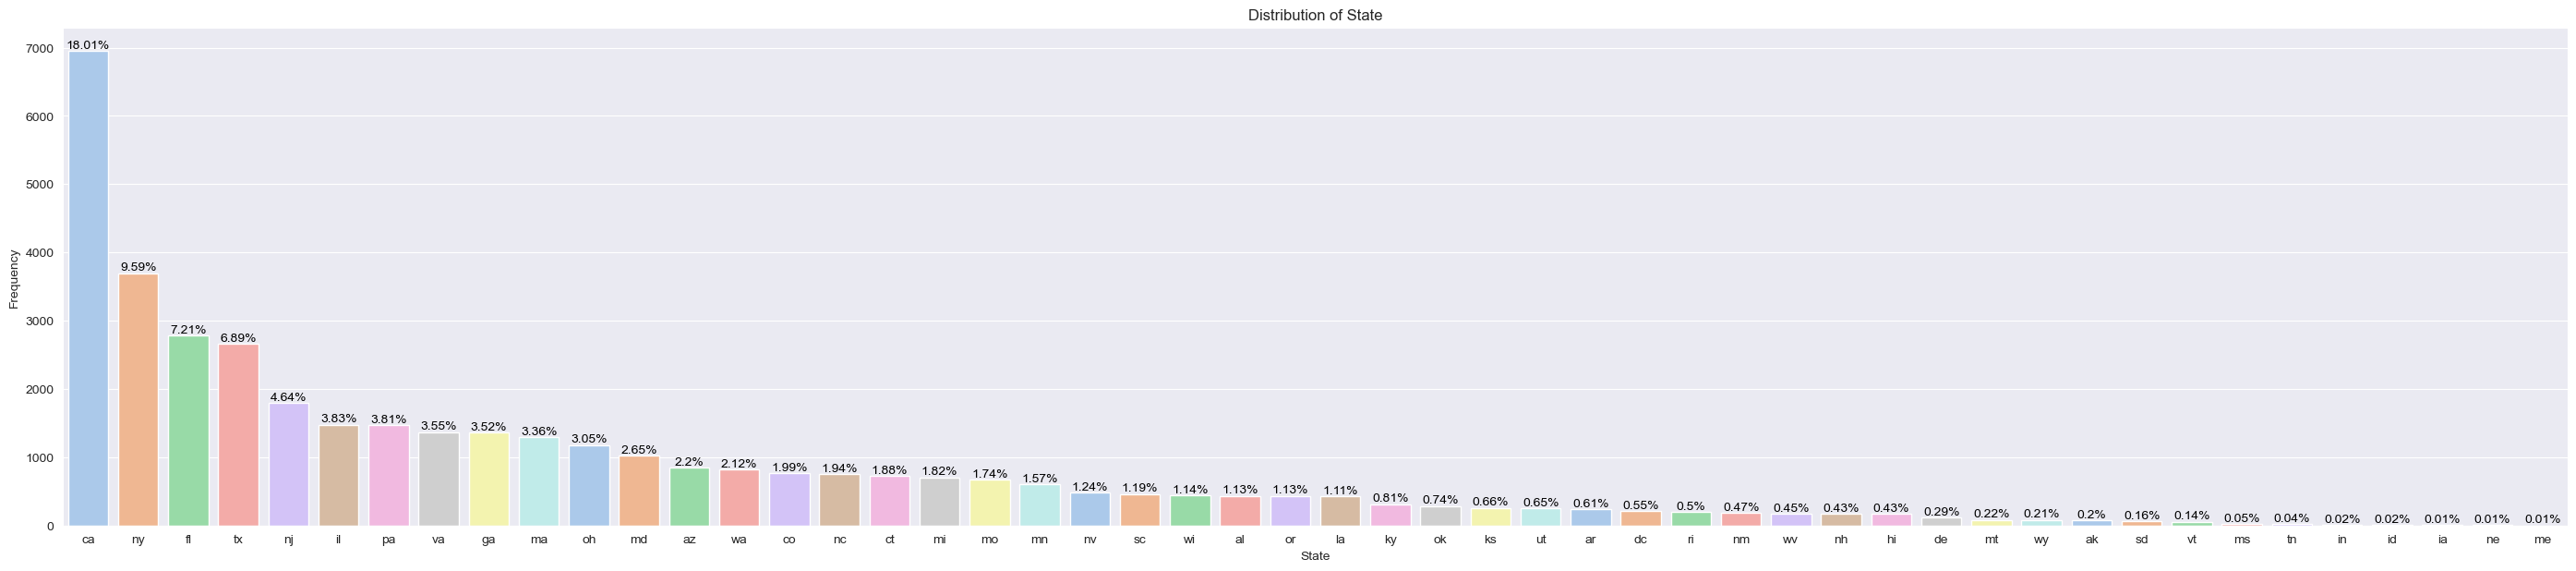

In [49]:
# bar plot for 'addr_state'
frequency_plot('derived_addr_state', 'Distribution of State', 'State', 'Frequency', True, (35, 7))

Most of the borrowers are from California (CA) followed by New Your (NY), Florida (FL) and so on.

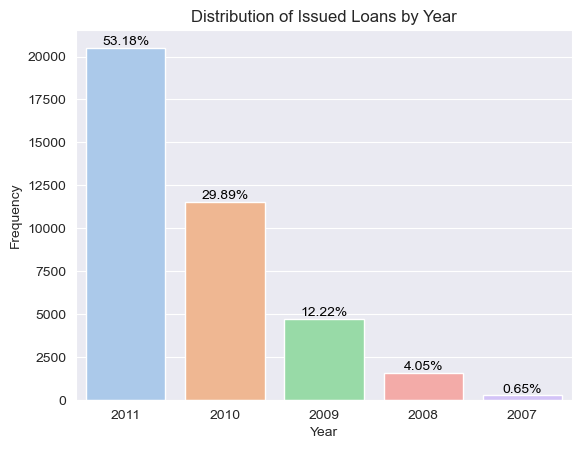

In [50]:
# bar plot for Year derived from 'issue_d'
frequency_plot('derived_issue_d_year', 'Distribution of Issued Loans by Year', 'Year', 'Frequency', True)

- The number of loans given increases every year.
- Most loans were given in the year 2011.

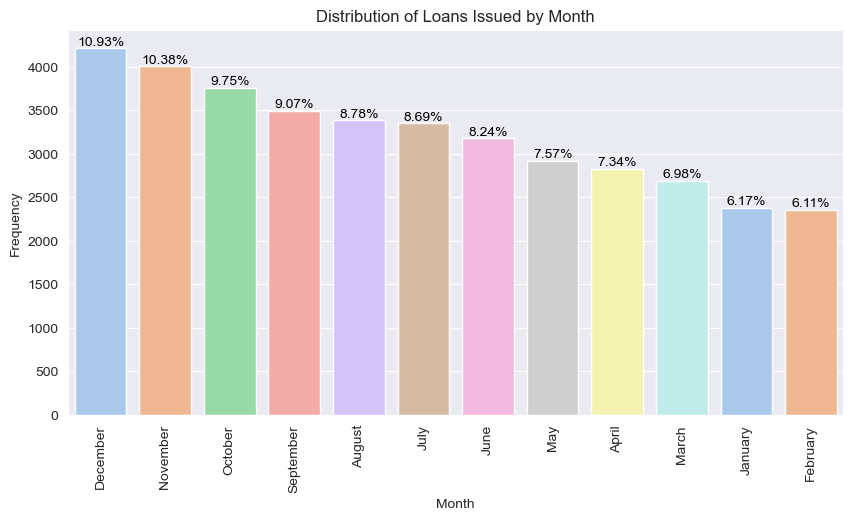

In [51]:
# bar plot for Month derived from 'issue_d'
frequency_plot('derived_issue_d_month', 'Distribution of Loans Issued by Month', 'Month', 'Frequency', True, (10, 5), 90)

Most loans were given during the final months of a year (October, November & December) as they are festive seasons and people tend to spend more during those months.

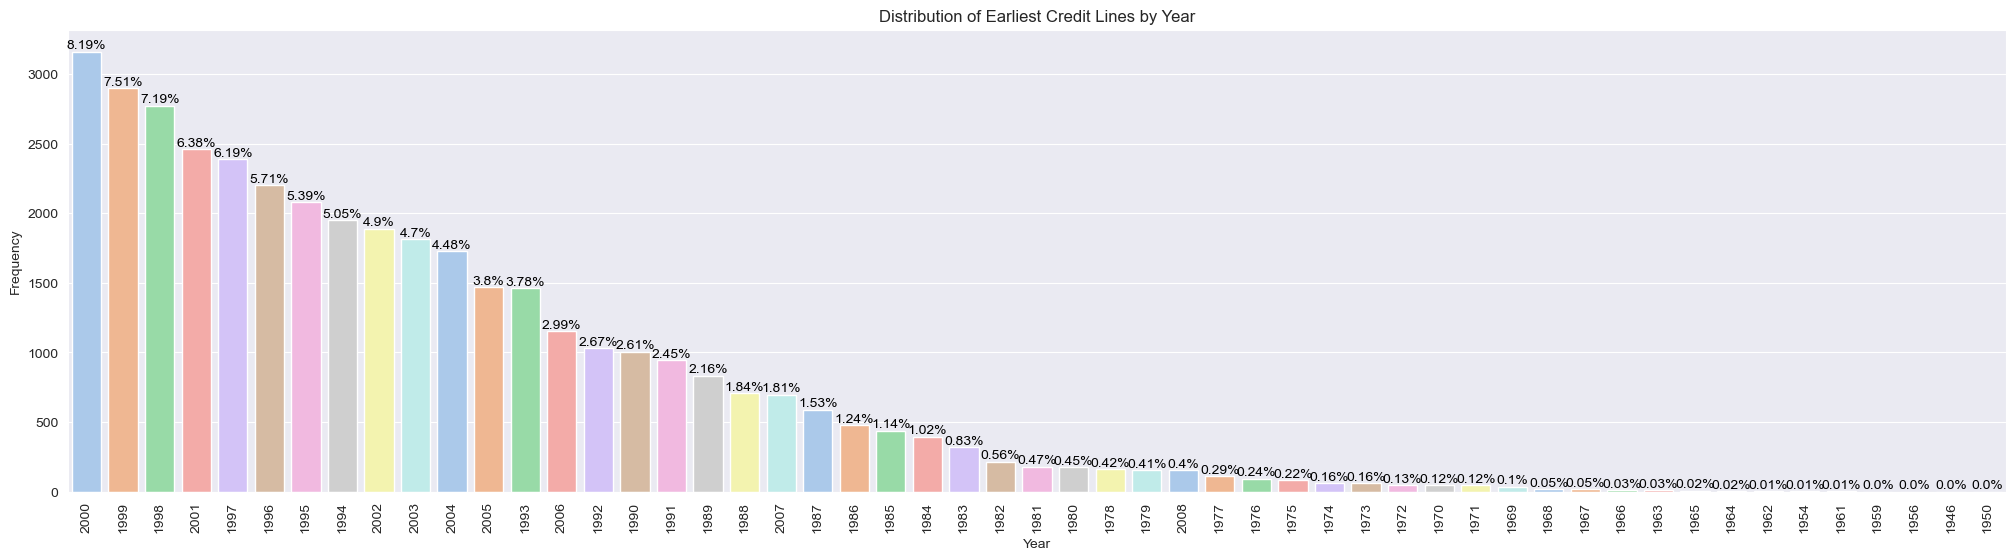

In [52]:
# bar plot for Year derived from 'earliest_cr_line'
frequency_plot('derived_earliest_cr_line_year', 'Distribution of Earliest Credit Lines by Year', 'Year', 'Frequency', True, (25, 6), 90)

Most of the borrower's credit lines had begun by 2000.

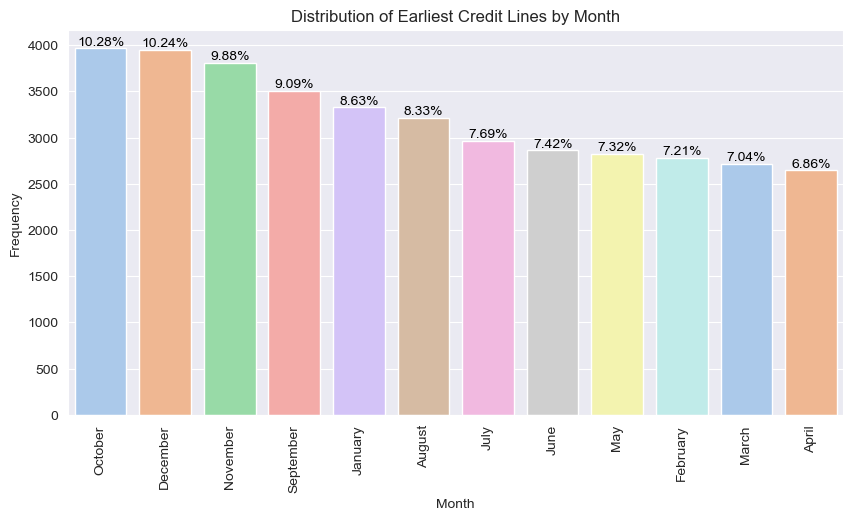

In [53]:
# bar plot for Month derived from 'earliest_cr_line'
frequency_plot('derived_earliest_cr_line_month', 'Distribution of Earliest Credit Lines by Month', 'Month', 'Frequency', True, (10, 5), 90)

Most credit lines had begun in the months or October or December.

## Numerical univariate analysis


In [54]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # display property for float

def boxplot_annot(box_plot, summary):
  box_plot.text(box_plot.get_xticks()[0]+0.17, summary['25%'], horizontalalignment='center', s=f'25%: {summary["25%"]}', color='black')
  box_plot.text(box_plot.get_xticks()[0]+0.17, summary['50%'], horizontalalignment='center', s=f'50%: {summary["50%"]}', color='black')
  box_plot.text(box_plot.get_xticks()[0]+0.17, summary['75%'], horizontalalignment='center', s=f'75%: {summary["75%"]}', color='black')

In [55]:
def plot_histogram_boxplot(col, bins, title, quantiles=None, outlier_count=False, is_outlier_after=95, remove_outliers=False):
  
  outlier_threshold = 0
  column = loan[col]

  if quantiles:
    summary = column.describe(percentiles=quantiles)
  else:
    summary = column.describe()
    
  print("Summary metrics: ")
  print(summary)
  if outlier_count:
    outlier_threshold = np.percentile(column, is_outlier_after)
    print("Outliers: ", (column > outlier_threshold).sum())
  
  if remove_outliers:
    column = loan[loan[col] < outlier_threshold][col]
    print("Threshold: ", outlier_threshold)

  
  plt.figure(figsize=(15, 7))
  plt.suptitle(title)

  plt.subplot(1, 2, 1)
  sns.set_style("darkgrid")
  sns.distplot(column, bins=bins)

  plt.subplot(1, 2, 2)
  sns.set_style("whitegrid")
  box_plot = column.plot.box()
  boxplot_annot(box_plot, summary)
  plt.show()

Summary metrics: 
count   38577.000
mean    11047.025
std      7348.442
min       500.000
25%      5300.000
50%      9600.000
75%     15000.000
95%     25000.000
max     35000.000
Name: loan_amnt, dtype: float64
Outliers:  1435


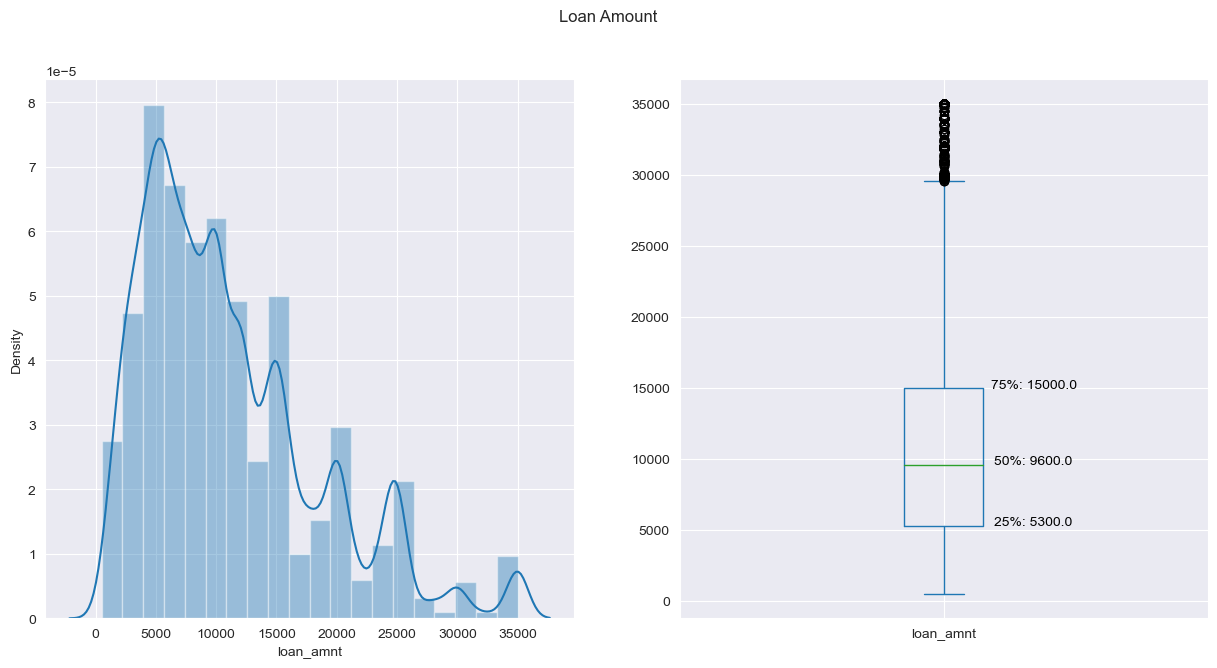

In [56]:
# analysis of loan_amnt
plot_histogram_boxplot('loan_amnt', 20, 'Loan Amount', [0.25, 0.5, 0.75, 0.95], True, 95)

- Most loan amounts were approximately between 5300 and 15000.
- The median is 9600.
-  In the histogram, there are many spikes near round numbers. This might be because, most people prefer rounded numbers more.

Summary metrics: 
count   38577.000
mean    10784.059
std      7090.306
min       500.000
25%      5200.000
50%      9550.000
75%     15000.000
95%     25000.000
max     35000.000
Name: funded_amnt, dtype: float64
Outliers:  1268


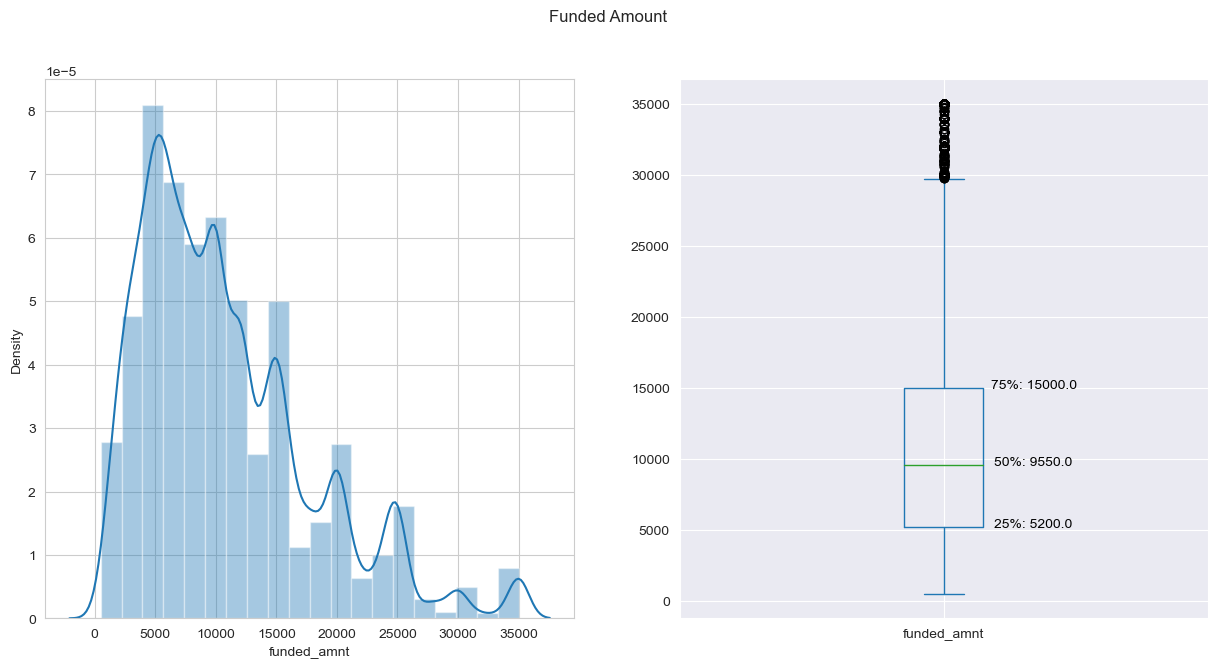

In [57]:
# analysis of funded_amnt
plot_histogram_boxplot('funded_amnt', 20, 'Funded Amount', [0.25, 0.5, 0.75, 0.95], True, 95)

The summary metrics as well as the distribution of ```funded_amnt``` is very similar to ```loan_amnt```. This indicates that, in most cases, the Lending club lends the total amount requested by the borrower.

Summary metrics: 
count   38577.000
mean    10222.481
std      7022.721
min         0.000
25%      5000.000
50%      8733.440
75%     14000.000
95%     24500.067
max     35000.000
Name: funded_amnt_inv, dtype: float64
Outliers:  1929


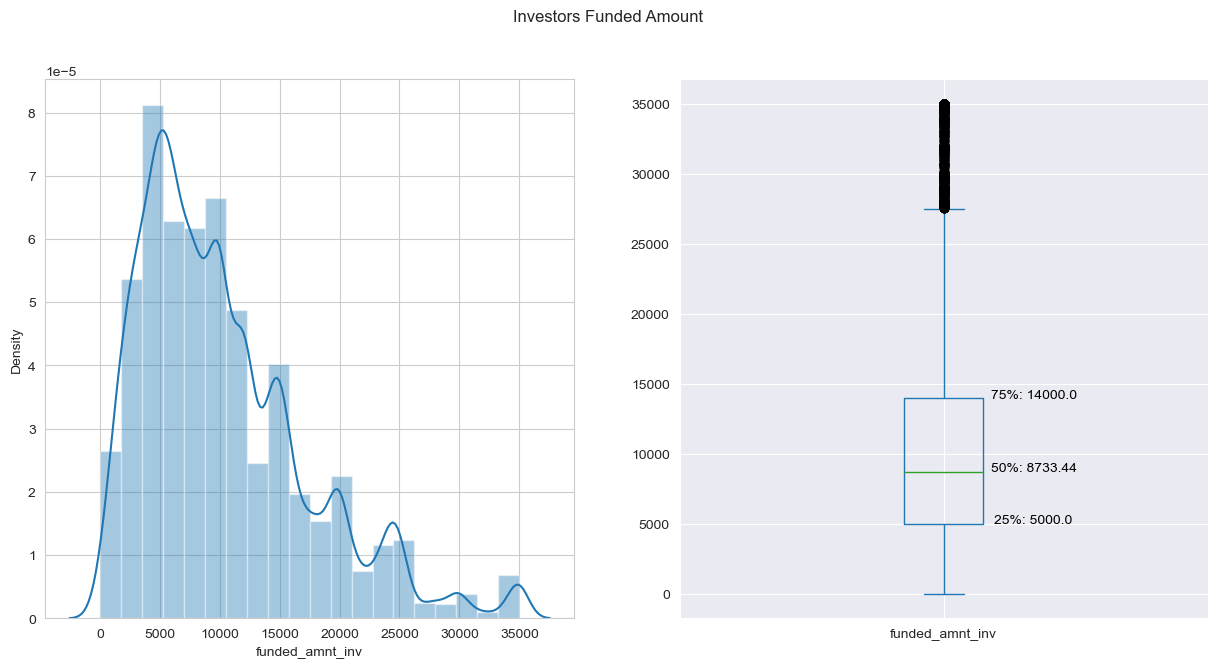

In [58]:
# analysis of funded_amnt_inv
plot_histogram_boxplot('funded_amnt_inv', 20, 'Investors Funded Amount', [0.25, 0.5, 0.75, 0.95], True, 95)

The summary metrics for this column is also very similar to ```loan_amnt```.

Summary metrics: 
count   38577.000
mean      322.466
std       208.639
min        15.690
25%       165.740
50%       277.860
75%       425.550
95%       760.820
max      1305.190
Name: installment, dtype: float64
Outliers:  1924


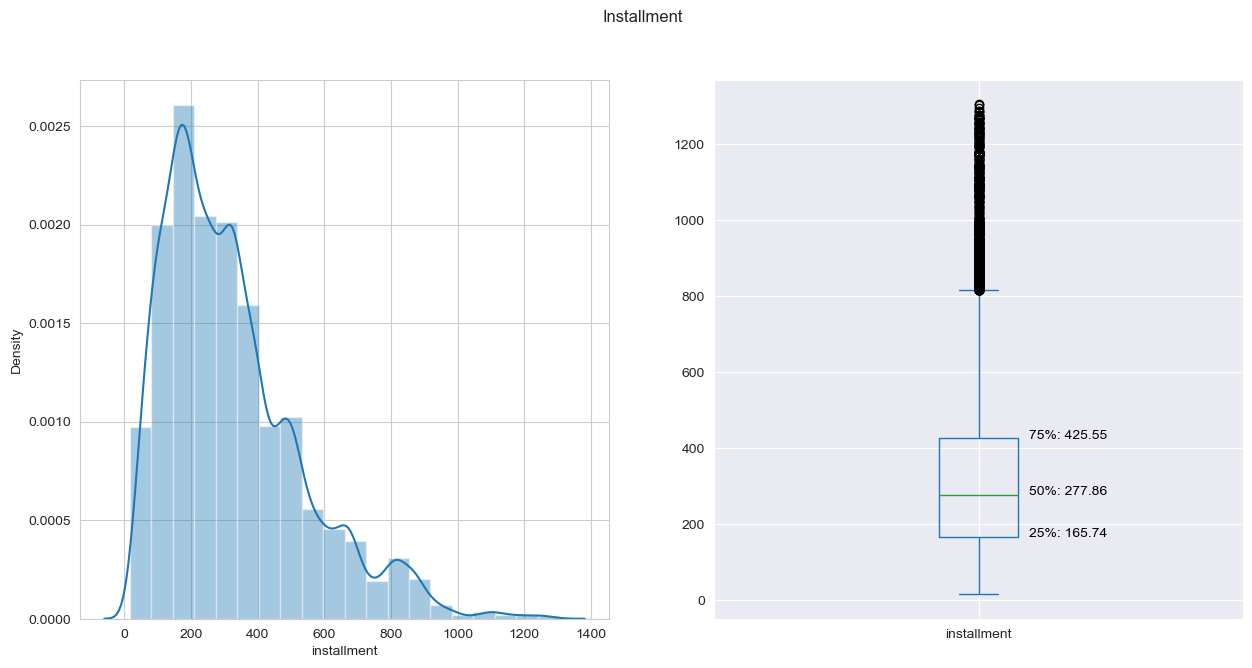

In [59]:
# analysis of installment
plot_histogram_boxplot('installment', 20, 'Installment', [0.25, 0.5, 0.75, 0.95], True, 95)

We can consider the median (~278) as the representative value of the monthly installment amount.

Summary metrics: 
count     38577.000
mean      68777.974
std       64218.682
min        4000.000
25%       40000.000
50%       58868.000
75%       82000.000
95%      140004.000
max     6000000.000
Name: annual_inc, dtype: float64
Outliers:  1923
Threshold:  140004.0


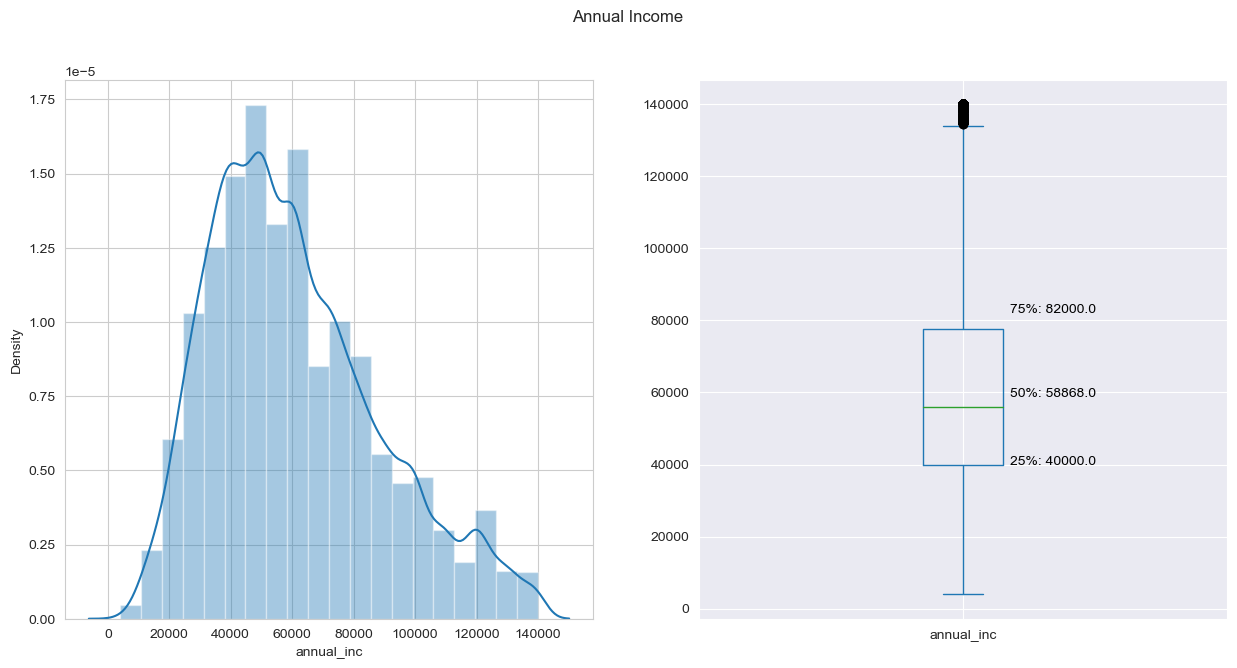

In [60]:
# analysis of annual_inc
# outliers (95 percentile above) are removed from visualization as visualization was not proper

plot_histogram_boxplot('annual_inc', 20, 'Annual Income', [0.25, 0.5, 0.75, 0.95], True, 95, True)

- An income of 58868 (median) is an representation of the borrowers.
- 95% of the people have an income below 140004.

Summary metrics: 
count   38577.000
mean       13.273
std         6.673
min         0.000
25%         8.130
50%        13.370
75%        18.560
95%        23.800
max        29.990
Name: dti, dtype: float64
Outliers:  1923


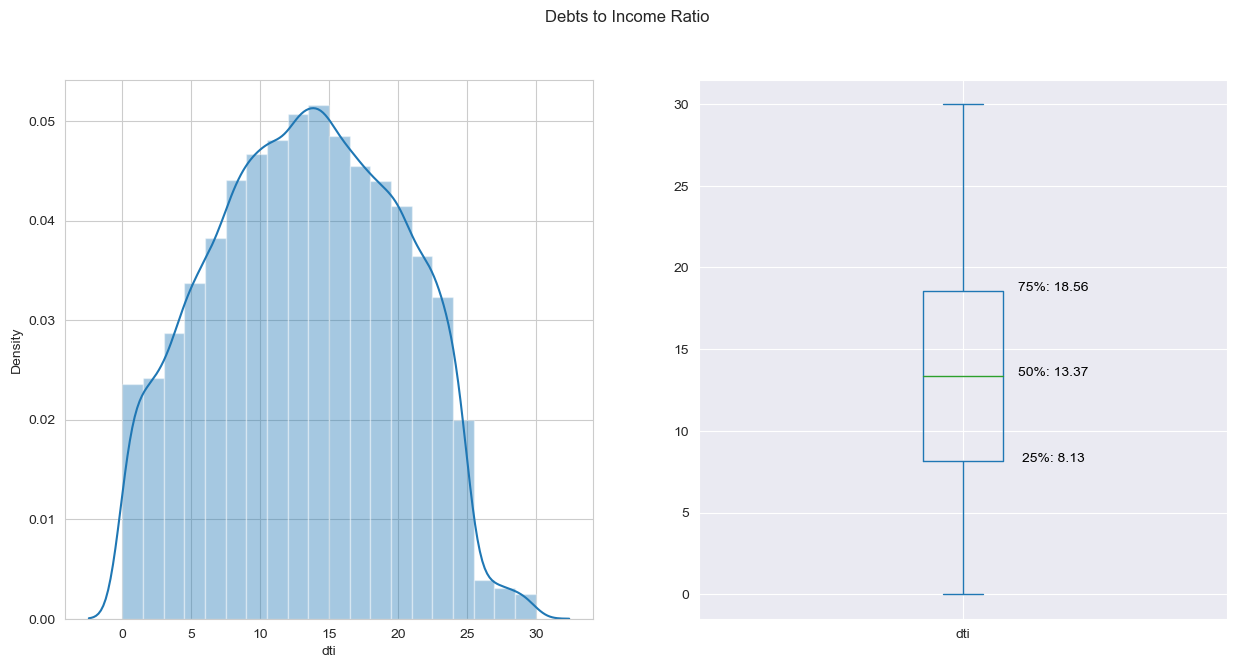

In [61]:
# analysis of dti
plot_histogram_boxplot('dti', 20, 'Debts to Income Ratio', [0.25, 0.5, 0.75, 0.95], True, 95)

- There are no outliers in this column.
- It is clear that greater the DTI lesser is the chance of getting a loan.
- All the approved loans have a DTI of less than 30 and most lie in the range of 8 to ~19.

Summary metrics: 
count   38577.000
mean        0.147
std         0.492
min         0.000
25%         0.000
50%         0.000
75%         0.000
95%         1.000
max        11.000
Name: delinq_2yrs, dtype: float64
Outliers:  984


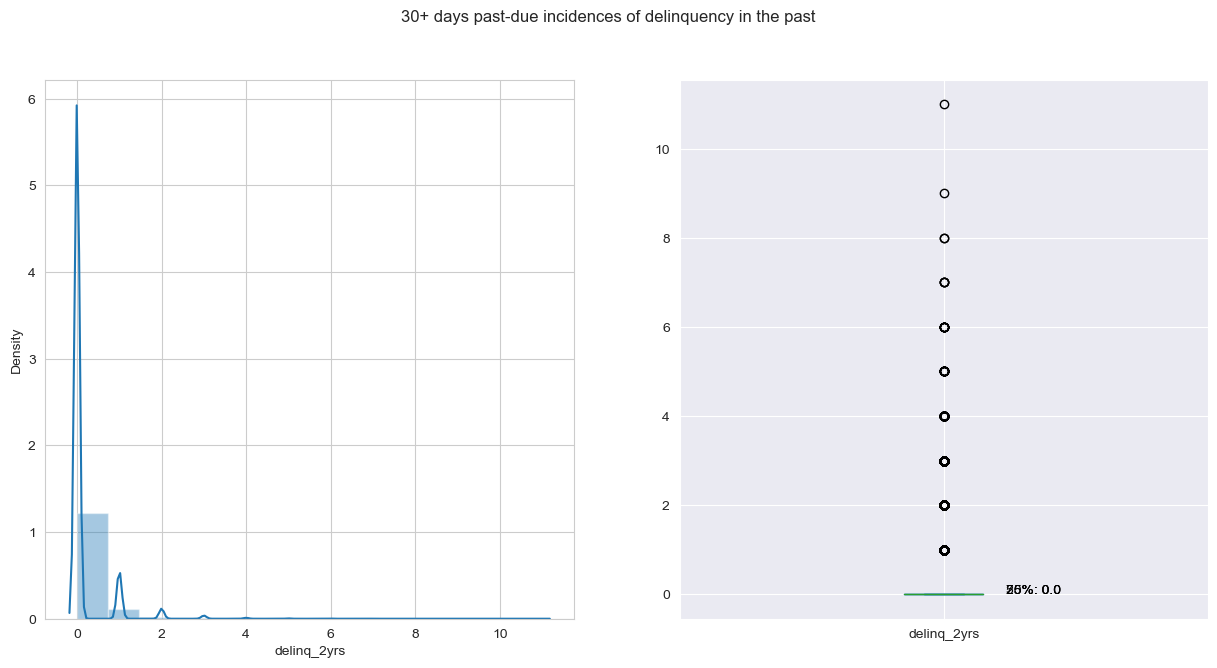

In [62]:
# analysis of delinq_2yrs
plot_histogram_boxplot('delinq_2yrs', 15, '30+ days past-due incidences of delinquency in the past', [0.25, 0.5, 0.75, 0.95], True, 95)

Except a few, most borrowers whose loan was approved had no 30+ days past-due delinquencies is the past 2 years.

Summary metrics: 
count   38577.000
mean        0.872
std         1.072
min         0.000
25%         0.000
50%         1.000
75%         1.000
95%         3.000
max         8.000
Name: inq_last_6mths, dtype: float64
Outliers:  571


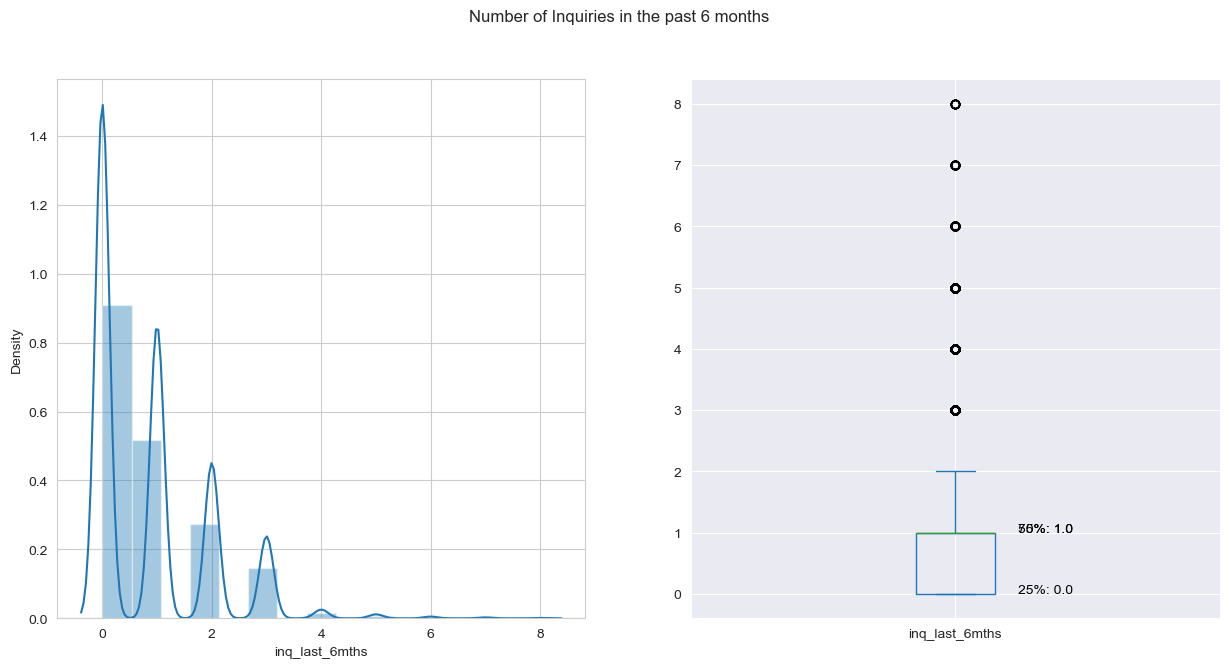

In [63]:
# analysis of inq_last_6mths
plot_histogram_boxplot('inq_last_6mths', 15, 'Number of Inquiries in the past 6 months', [0.25, 0.5, 0.75, 0.95], True, 95)

Most borrowers had enquired atleast once.

Summary metrics: 
count   38577.000
mean        9.275
std         4.402
min         2.000
25%         6.000
50%         9.000
75%        12.000
95%        17.000
max        44.000
Name: open_acc, dtype: float64
Outliers:  1911


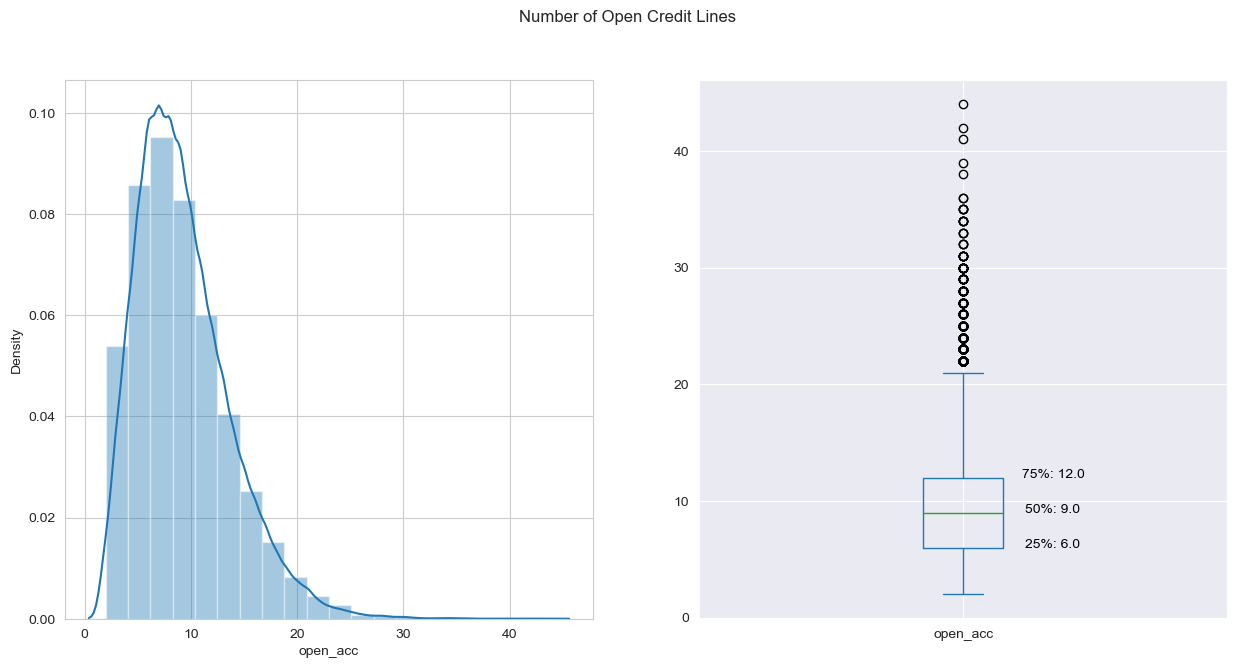

In [64]:
# analysis of open_acc
plot_histogram_boxplot('open_acc', 20, 'Number of Open Credit Lines', [0.25, 0.5, 0.75, 0.95], True, 95)

Most borrowers have an open credit line between 6 and 12.

Summary metrics: 
count   38577.000
mean       22.053
std        11.426
min         2.000
25%        13.000
50%        20.000
75%        29.000
95%        43.000
max        90.000
Name: total_acc, dtype: float64
Outliers:  1904


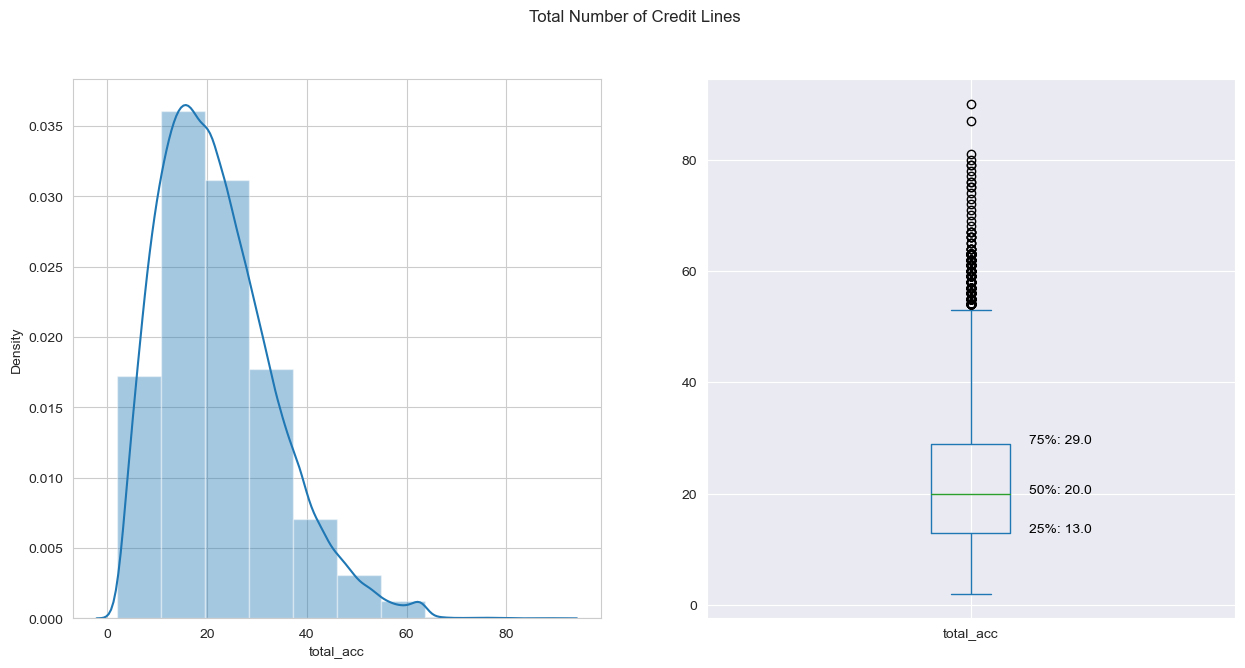

In [65]:
# analysis of total_acc
plot_histogram_boxplot('total_acc', 10, 'Total Number of Credit Lines', [0.25, 0.5, 0.75, 0.95], True, 95)

Most borrowers have a total number of credit lines between 13 and 29.

Summary metrics: 
count   38577.000
mean        0.055
std         0.238
min         0.000
25%         0.000
50%         0.000
75%         0.000
95%         1.000
max         4.000
Name: pub_rec, dtype: float64
Outliers:  57


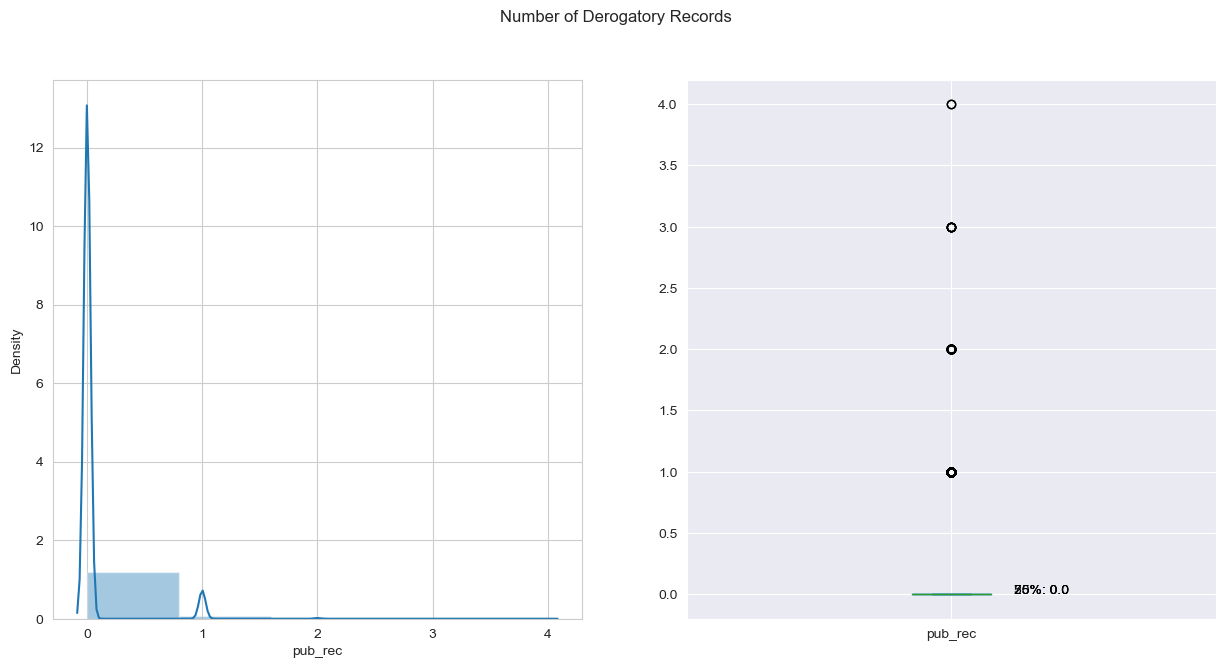

In [66]:
# analysis of pub_rec
plot_histogram_boxplot('pub_rec', 5, 'Number of Derogatory Records', [0.25, 0.5, 0.75, 0.95], True, 95)

Except a very few borrowers, most did not have any derogatory public records.

Summary metrics: 
count   38577.000
mean        0.043
std         0.203
min         0.000
25%         0.000
50%         0.000
75%         0.000
95%         0.000
max         2.000
Name: pub_rec_bankruptcies, dtype: float64
Outliers:  1642


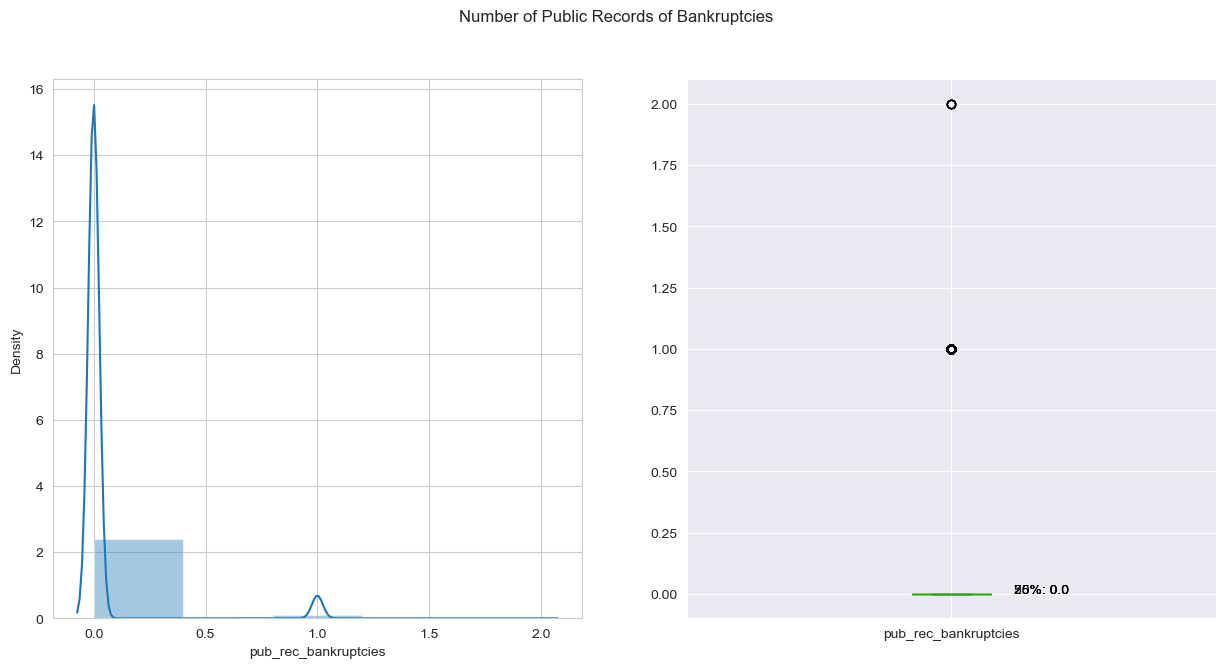

In [67]:
# analysis of pub_rec_bankruptcies
plot_histogram_boxplot('pub_rec_bankruptcies', 5, 'Number of Public Records of Bankruptcies', [0.25, 0.5, 0.75, 0.95], True, 95)

Most borrowers had no public record of bankruptcies. Though a few borrowers had either 1 or 2 bankruptcies.

Summary metrics: 
count    38577.000
mean     13289.490
std      15866.492
min          0.000
25%       3650.000
50%       8762.000
75%      16912.000
95%      41356.200
max     149588.000
Name: revol_bal, dtype: float64
Outliers:  1929
Threshold:  41356.199999999866


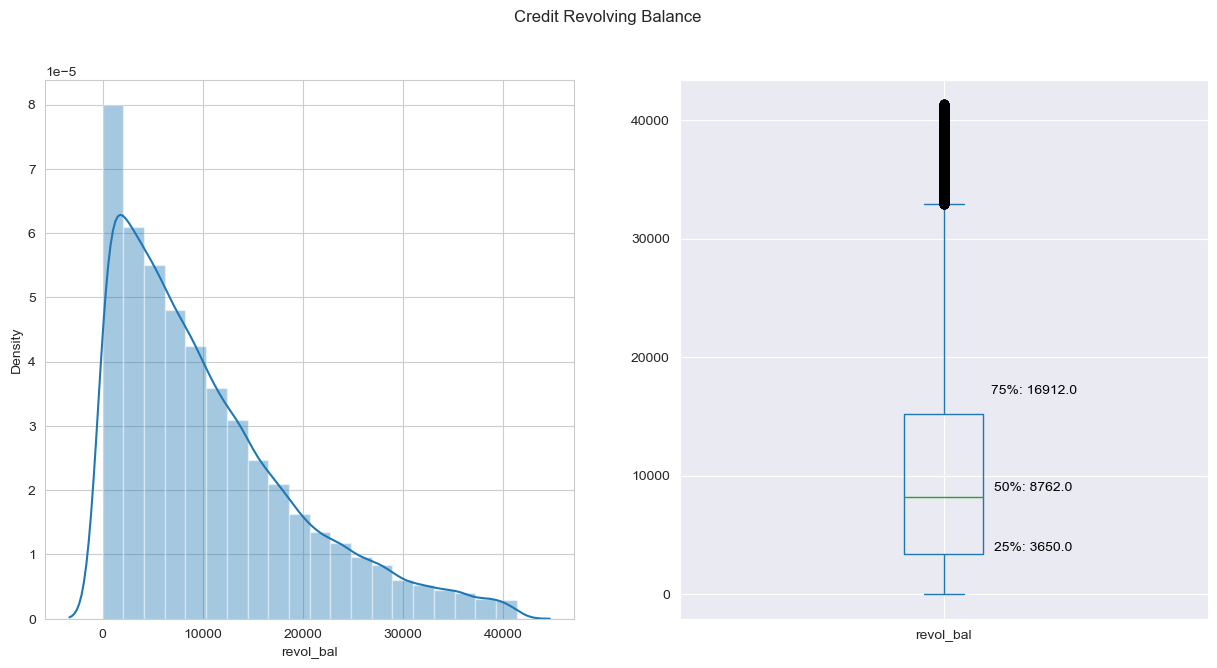

In [68]:
# analysis of revol_bal
# outliers (95 percentile above) are removed from visualization as visualization was not proper

plot_histogram_boxplot('revol_bal', 20, 'Credit Revolving Balance', [0.25, 0.5, 0.75, 0.95], True, 95, True)

- Most borrowers had a revolving balance between 3650 and 16912.
- There are also some cases where borrowers had a revolving balance of more than a lakh.

Summary metrics: 
count   38577.000
mean        1.369
std         7.316
min         0.000
25%         0.000
50%         0.000
75%         0.000
90%         0.000
95%        14.930
max       180.200
Name: total_rec_late_fee, dtype: float64
Outliers:  1929


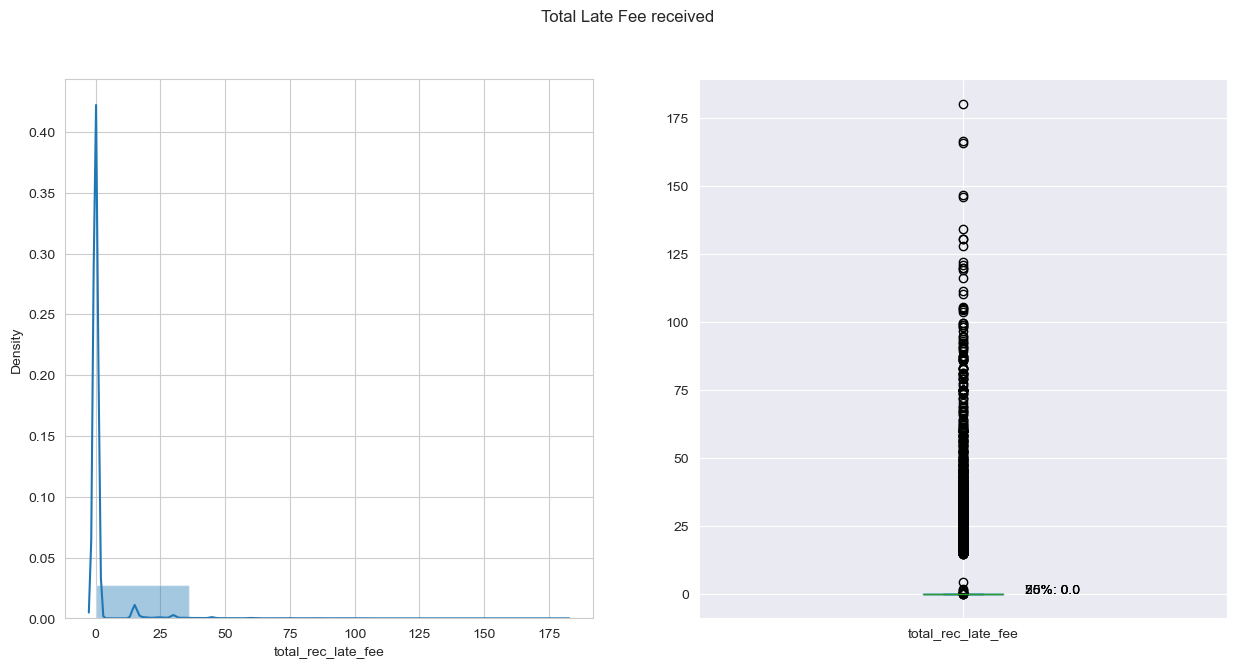

In [69]:
# analysis of total_rec_late_fee
plot_histogram_boxplot('total_rec_late_fee', 5, 'Total Late Fee received', [0.25, 0.5, 0.75, 0.90, 0.95], True, 95)

90% of the borrowers had not paid any late fee.

Summary metrics: 
count   38577.000
mean          inf
std         3.689
min         5.422
25%         8.938
50%        11.711
75%        14.383
95%        18.309
max        24.406
Name: derived_int_rate_pct, dtype: float64
Outliers:  1929


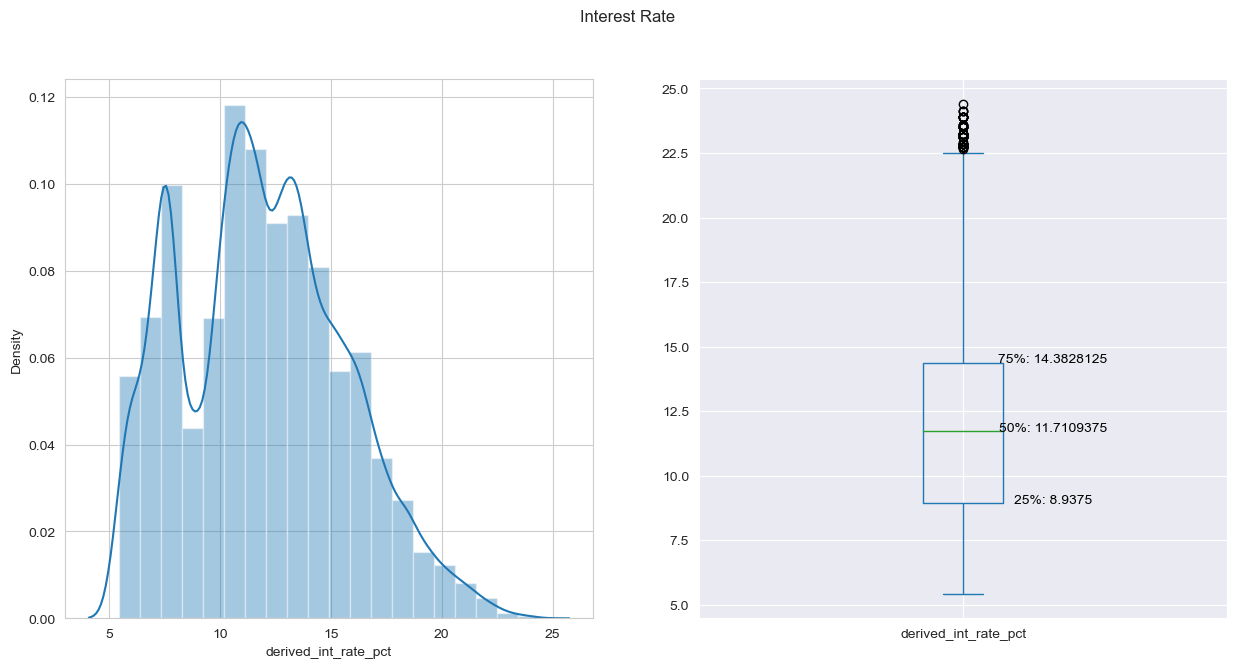

In [70]:
# analysis of derived_int_rate_pct
plot_histogram_boxplot('derived_int_rate_pct', 20, 'Interest Rate', [0.25, 0.5, 0.75, 0.95], True, 95)

Most loan interest rates were between ~9% and 14%.

Summary metrics: 
count   38577.000
mean          inf
std        28.406
min         0.000
25%        25.094
50%        49.000
75%        72.188
95%        93.500
max        99.875
Name: derived_revol_util_pct, dtype: float64
Outliers:  1927


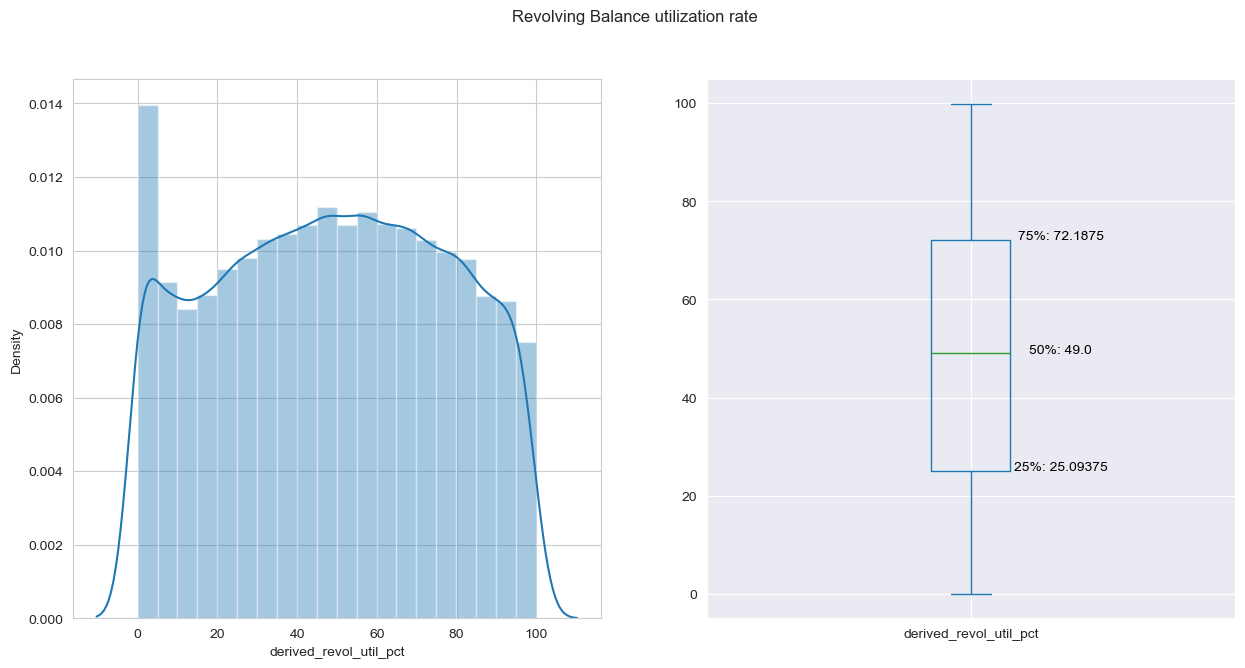

In [71]:
# analysis of derived_revol_util_pct
plot_histogram_boxplot('derived_revol_util_pct', 20, 'Revolving Balance utilization rate', [0.25, 0.5, 0.75, 0.95], True, 95)

Most people have a utilization rate between 25% and 72%.

# Segmented Univariate Analysis

In [72]:
# method to display boxplot
def plot_segmented_boxplot(segment_col, metric_col, title, figsize=(6, 6), plot_order=None, xtick_rot=0, show_stats=True, remove_outliers=False, outlier_threshold=0.95):
  
  temp_loan = loan
  if remove_outliers:
    temp_loan = loan[loan[metric_col] < loan[metric_col].quantile(outlier_threshold)]

  plt.figure(figsize=figsize)
  groupby = temp_loan.groupby(segment_col)[metric_col]
  segmented_summary = groupby.describe()

  ax = sns.boxplot(data=temp_loan, x=segment_col, y=metric_col, order=plot_order)
  plt.title(title)
  plt.xticks(rotation=xtick_rot)
  plt.show()

  if show_stats:
    return segmented_summary

In [73]:
# method to display countplot

def add_countplot_annots(ax):
  all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
  for bars in ax.containers:
    for i, p in enumerate(bars):
      total = sum(xgroup[i] for xgroup in all_heights)
      percentage = f'{round(100 * p.get_height() / total, 2)}%'
      ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

def segmented_countplot(data, x, hue, title, figsize=(7, 5), annot=True, scale=False, xtick_rot=0):
  plt.figure(figsize=figsize)
  ax = sns.countplot(data=data, x=x, hue=hue, palette=sns.color_palette('pastel'), log=scale)
  
  if annot:
    add_countplot_annots(ax)
  plt.title(title)
  plt.xticks(rotation=xtick_rot)
  plt.legend(loc='upper right')
  plt.show()

### Loan Amount

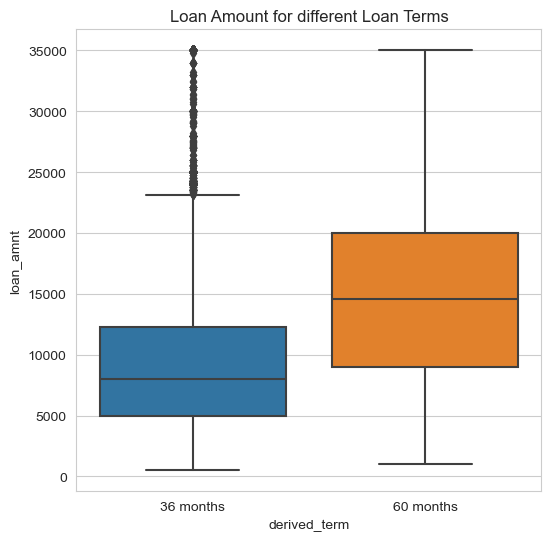

count      mean      std      min      25%       50%  \
derived_term                                                            
36 months    29096.000  9592.936 6323.250  500.000 5000.000  8000.000   
60 months     9481.000 15509.443 8403.411 1000.000 9000.000 14600.000   

                   75%       max  
derived_term                      
36 months    12250.000 35000.000  
60 months    20000.000 35000.000

In [74]:
# loan amount for different terms

plot_segmented_boxplot('derived_term', 'loan_amnt', 'Loan Amount for different Loan Terms')

Higher loan amounts tend to have a higher term.

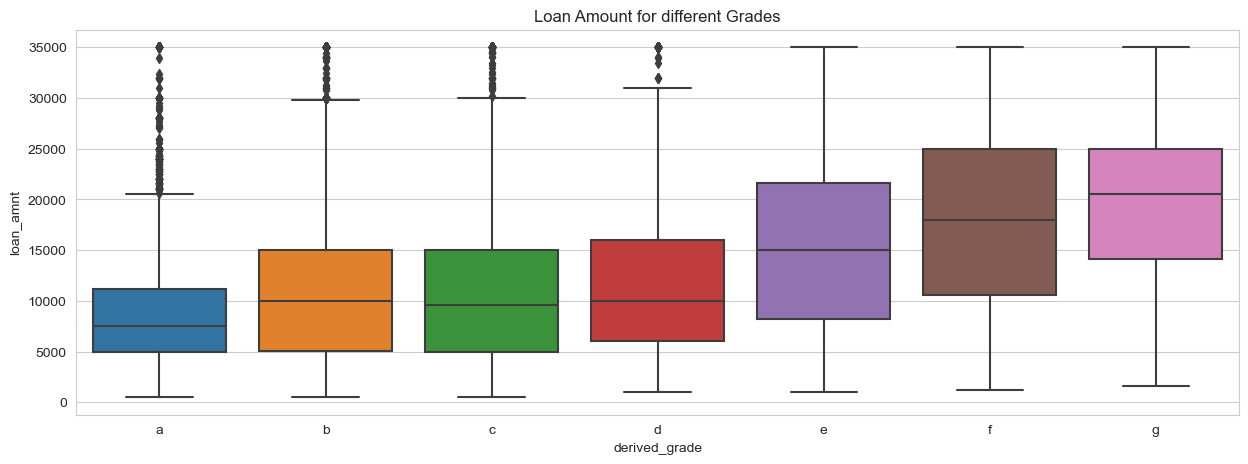

count      mean      std      min       25%       50%  \
derived_grade                                                             
a             10045.000  8618.758 5335.958  500.000  5000.000  7500.000   
b             11675.000 10934.784 7078.703  500.000  5100.000 10000.000   
c              7834.000 10815.519 7210.001  500.000  5000.000  9600.000   
d              5085.000 12137.768 7599.706 1000.000  6000.000 10000.000   
e              2663.000 15680.116 8956.354 1000.000  8200.000 15000.000   
f               976.000 18095.236 9018.769 1200.000 10625.000 18000.000   
g               299.000 20253.010 8524.322 1600.000 14100.000 20500.000   

                    75%       max  
derived_grade                      
a             11200.000 35000.000  
b             15000.000 35000.000  
c             15000.000 35000.000  
d             16000.000 35000.000  
e             21600.000 35000.000  
f             25000.000 35000.000  
g             25000.000 35000.000

In [75]:
# loan amount for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'loan_amnt', 'Loan Amount for different Grades', (15, 5), order)

Loans with a grade G seems to have the highest the loan amounts.

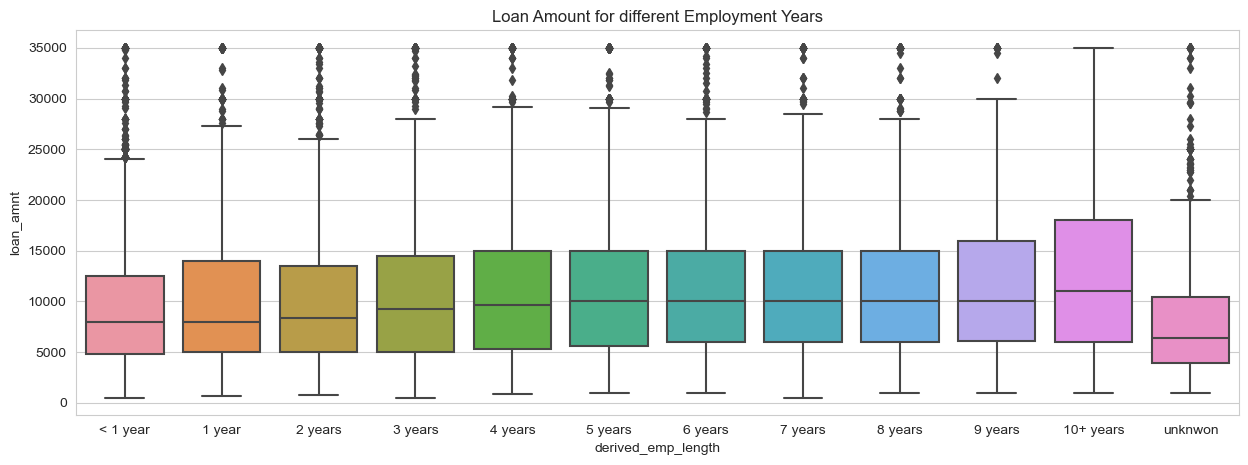

count      mean      std      min      25%       50%  \
derived_emp_length                                                           
1 year             3169.000 10056.824 6723.385  725.000 5000.000  8000.000   
10+ years          8488.000 12808.100 8125.607 1000.000 6000.000 11000.000   
2 years            4291.000 10124.557 6834.672  800.000 5000.000  8400.000   
3 years            4012.000 10636.746 6966.994  500.000 5000.000  9225.000   
4 years            3342.000 10839.333 7072.245  900.000 5300.000  9600.000   
5 years            3194.000 11114.081 7180.907 1000.000 5600.000 10000.000   
6 years            2168.000 11372.498 7311.910 1000.000 6000.000 10000.000   
7 years            1711.000 11565.108 7300.855  500.000 6000.000 10000.000   
8 years            1435.000 11741.551 7619.149 1000.000 6000.000 10000.000   
9 years            1226.000 11903.303 7094.149 1000.000 6106.250 10000.000   
< 1 year           4508.000  9571.944 6699.912  500.000 4800.000  8000.000   
unknwon            1033.000  8419.143 6627.473 1000.000 3900.000  6400.000   

                         75%       max  
derived_emp_length                      
1 year             14000.000 35000.000  
10+ years          18000.000 35000.000  
2 years            13500.000 35000.000  
3 years            14481.250 35000.000  
4 years            15000.000 35000.000  
5 years            15000.000 35000.000  
6 years            15000.000 35000.000  
7 years            15000.000 35000.000  
8 years            15000.000 35000.000  
9 years            16000.000 35000.000  
< 1 year           12525.000 35000.000  
unknwon            10400.000 35000.000

In [76]:
# loan amount for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'loan_amnt', 'Loan Amount for different Employment Years', (15, 5), order)

The loan amounts are almost similar for borrowers with less than 1 year of employment to 9 years of employment. Borrowers with 10+ years of employment have a higher loan amount.

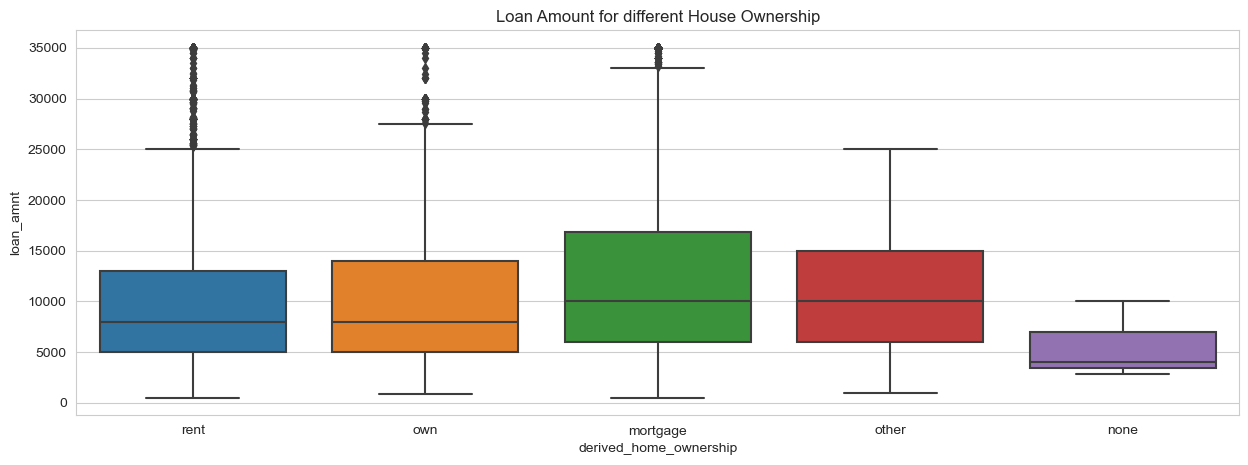

count      mean      std      min      25%  \
derived_home_ownership                                                  
mortgage               17021.000 12468.974 7924.881  500.000 6000.000   
none                       3.000  5600.000 3857.460 2800.000 3400.000   
other                     98.000 10663.010 5883.245 1000.000 6000.000   
own                     2975.000 10138.101 6974.605  900.000 5000.000   
rent                   18480.000  9886.584 6597.144  500.000 5000.000   

                             50%       75%       max  
derived_home_ownership                                
mortgage               10000.000 16800.000 35000.000  
none                    4000.000  7000.000 10000.000  
other                  10000.000 15000.000 25000.000  
own                     8000.000 14000.000 35000.000  
rent                    8000.000 13000.000 35000.000

In [77]:
# loan amount for different house ownership
plot_segmented_boxplot('derived_home_ownership', 'loan_amnt', 'Loan Amount for different House Ownership', (15, 5))

Borrowers with a mortgage have a slightly higher loan amount than others.

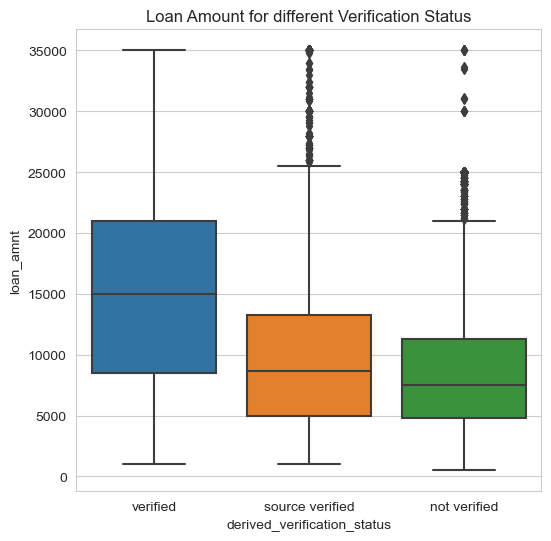

count      mean      std      min      25%  \
derived_verification_status                                                  
not verified                16694.000  8386.955 5062.405  500.000 4800.000   
source verified              9677.000  9970.644 6489.140 1000.000 5000.000   
verified                    12206.000 15538.534 8453.828 1000.000 8500.000   

                                  50%       75%       max  
derived_verification_status                                
not verified                 7500.000 11300.000 35000.000  
source verified              8675.000 13250.000 35000.000  
verified                    15000.000 21000.000 35000.000

In [78]:
# loan amount for verification status
plot_segmented_boxplot('derived_verification_status', 'loan_amnt', 'Loan Amount for different Verification Status')

- Loans with a higher loan amount are verified.
- Source verified loans and not verified loans have lesser loan amounts.

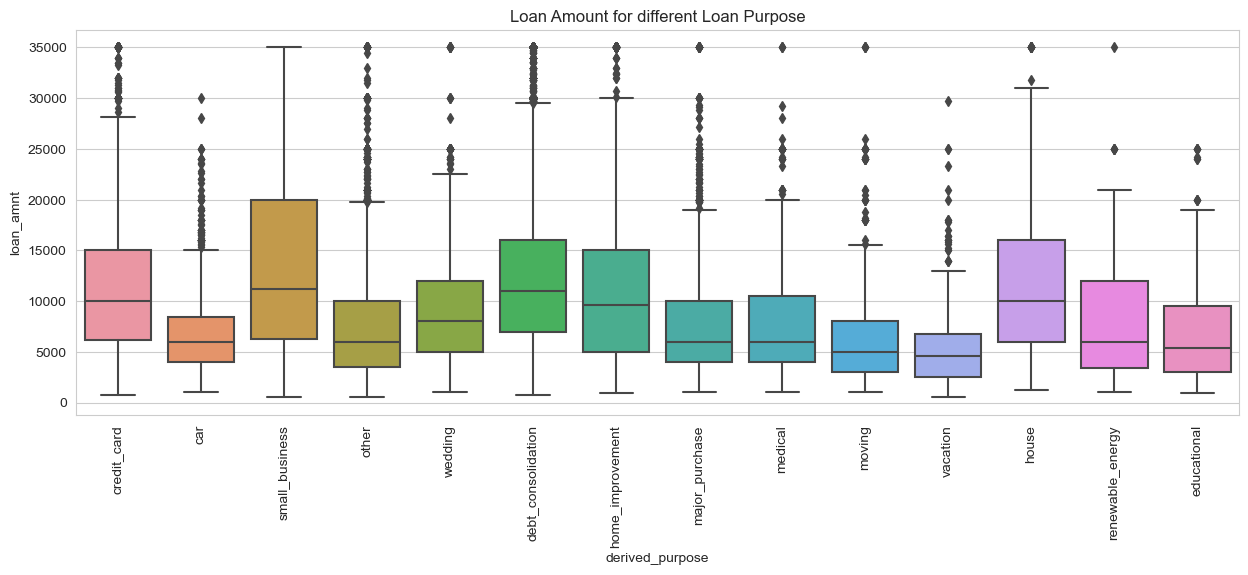

count      mean      std      min      25%       50%  \
derived_purpose                                                               
car                 1499.000  6746.731 4063.469 1000.000 4000.000  6000.000   
credit_card         5027.000 11571.414 6887.574  725.000 6200.000 10000.000   
debt_consolidation 18055.000 12503.457 7371.913  700.000 7000.000 11000.000   
educational          325.000  6810.462 5141.443  900.000 3000.000  5400.000   
home_improvement    2875.000 11308.000 7984.760  900.000 5000.000  9600.000   
house                367.000 12753.406 8141.101 1200.000 6000.000 10000.000   
major_purchase      2150.000  8072.605 6068.126 1000.000 4000.000  6000.000   
medical              681.000  8122.761 6009.960 1000.000 4000.000  6000.000   
moving               576.000  6568.012 5720.312 1000.000 3000.000  5000.000   
other               3865.000  7936.417 6316.552  500.000 3500.000  6000.000   
renewable_energy     102.000  8537.990 6866.828 1000.000 3387.500  6000.000   
small_business      1754.000 13365.108 8550.843  500.000 6250.000 11200.000   
vacation             375.000  5417.600 4329.085  500.000 2500.000  4550.000   
wedding              926.000  9755.859 6090.242 1000.000 5000.000  8000.000   

                         75%       max  
derived_purpose                         
car                 8400.000 30000.000  
credit_card        15000.000 35000.000  
debt_consolidation 16000.000 35000.000  
educational         9500.000 25000.000  
home_improvement   15000.000 35000.000  
house              16000.000 35000.000  
major_purchase     10000.000 35000.000  
medical            10500.000 35000.000  
moving              8000.000 35000.000  
other              10000.000 35000.000  
renewable_energy   12000.000 35000.000  
small_business     20000.000 35000.000  
vacation            6762.500 29700.000  
wedding            12000.000 35000.000

In [79]:
# loan amount for different loan purpose
plot_segmented_boxplot('derived_purpose', 'loan_amnt', 'Loan Amount for different Loan Purpose', (15, 5), None, 90)

Loan amount for small business tend to be higher than the others and loan amount for vacation is the least.

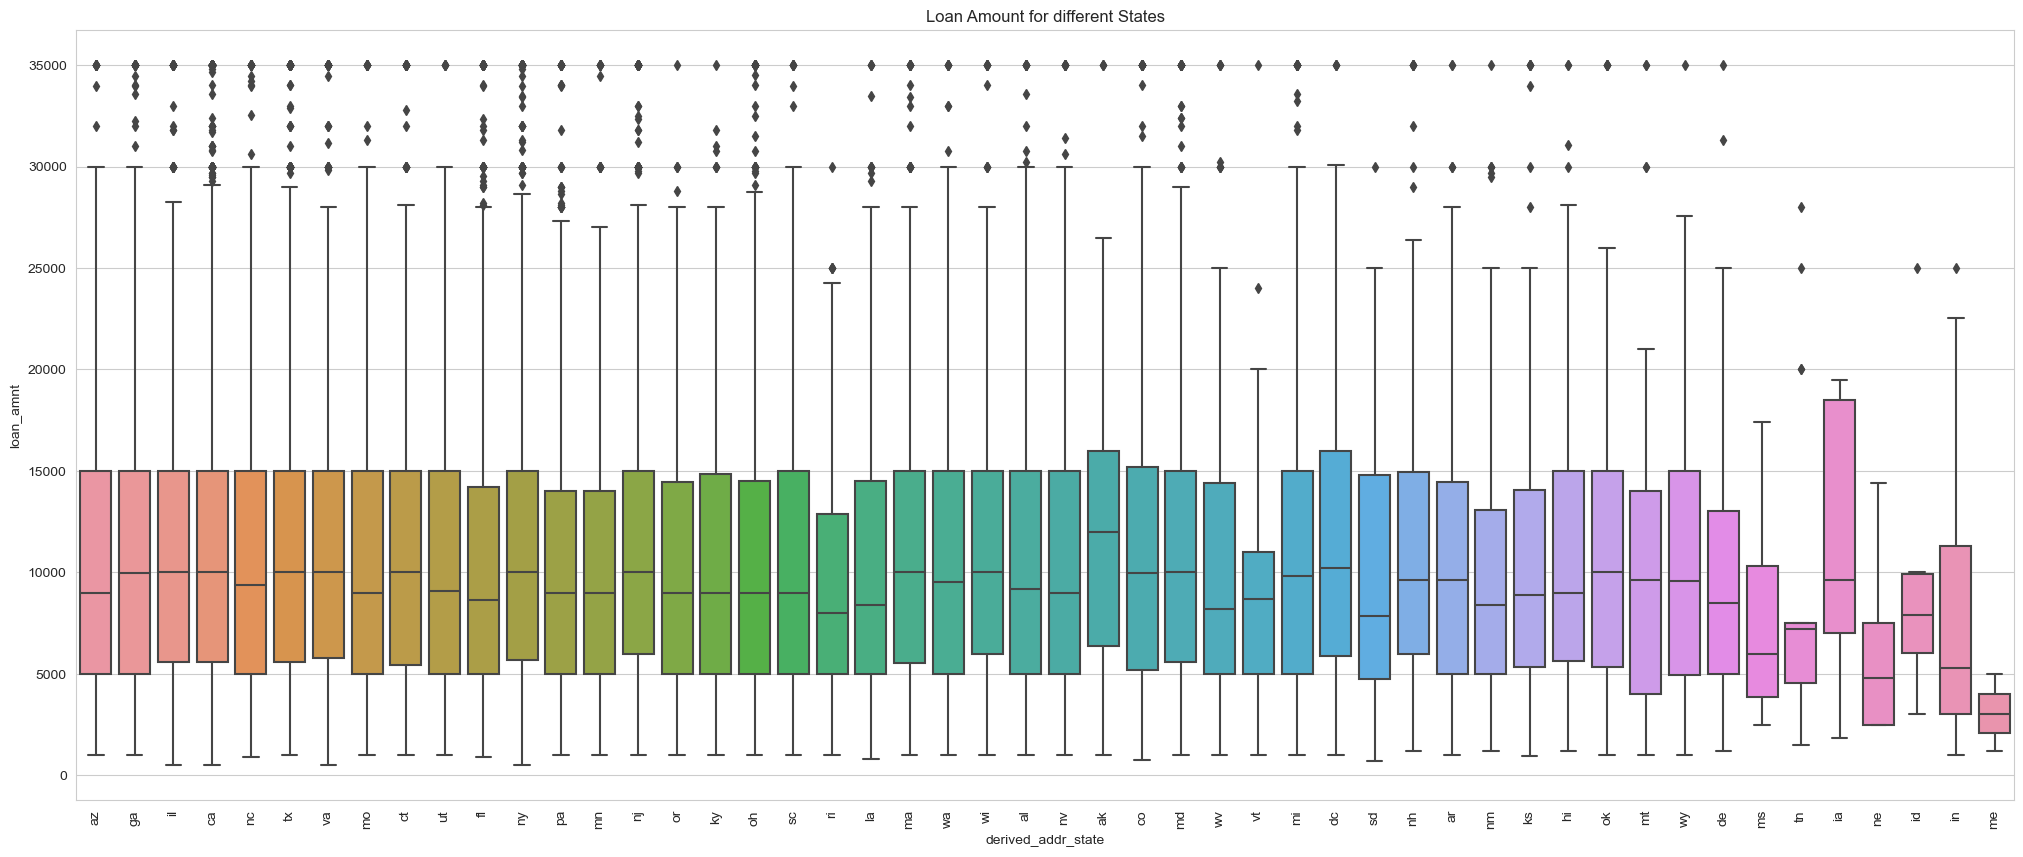

In [80]:
# loan amount for different states
plot_segmented_boxplot('derived_addr_state', 'loan_amnt', 'Loan Amount for different States', (25, 10), None, 90, False)

- Loan amounts in Iowa (IA) tend to be higher than others.
- Maine (ME) has the lowest loan amounts.
- Apart from a few states, all other states have almost similar loan amounts.

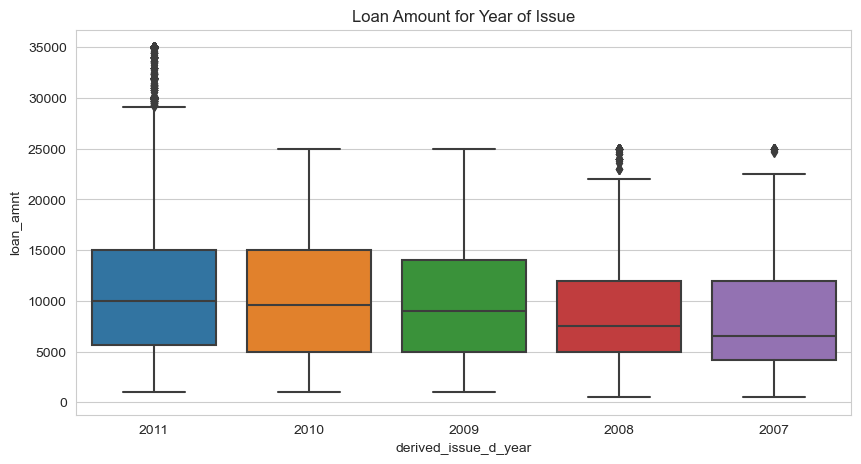

count      mean      std      min      25%       50%  \
derived_issue_d_year                                                            
2007                   251.000  8841.733 6447.772  500.000 4137.500  6500.000   
2008                  1562.000  9212.724 5774.294  500.000 5000.000  7500.000   
2009                  4716.000  9846.549 5934.104 1000.000 5000.000  9000.000   
2010                 11532.000 10583.611 6602.360 1000.000 5000.000  9600.000   
2011                 20516.000 11750.099 8039.856 1000.000 5600.000 10000.000   

                           75%       max  
derived_issue_d_year                      
2007                 12000.000 25000.000  
2008                 12000.000 25000.000  
2009                 14000.000 25000.000  
2010                 15000.000 25000.000  
2011                 15000.000 35000.000

In [81]:
# loan amount for Year of Loan issue
plot_segmented_boxplot('derived_issue_d_year', 'loan_amnt', 'Loan Amount for Year of Issue', (10, 5))

- Loan amounts in 2010 and 2011 are very similar and are higher compared to loan amounts for other years.

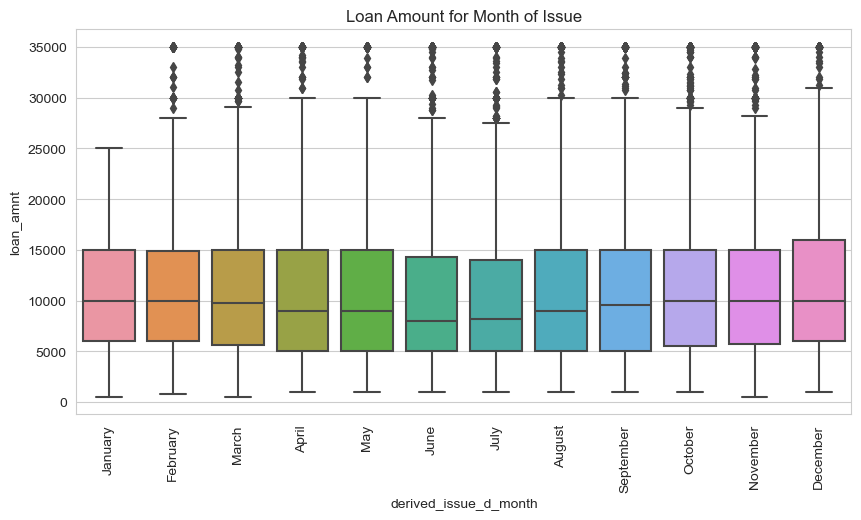

count      mean      std      min      25%       50%  \
derived_issue_d_month                                                           
April                 2831.000 10730.855 7316.612 1000.000 5000.000  9000.000   
August                3388.000 10905.254 7505.662 1000.000 5000.000  9000.000   
December              4215.000 12102.420 7432.063 1000.000 6000.000 10000.000   
February              2358.000 10767.791 6647.171  750.000 6000.000 10000.000   
January               2379.000 10656.400 6279.330  500.000 6000.000 10000.000   
July                  3351.000 10326.201 7134.396 1000.000 5000.000  8200.000   
June                  3180.000 10465.865 7486.969 1000.000 5000.000  8000.000   
March                 2691.000 10954.952 7157.670  500.000 5600.000  9800.000   
May                   2919.000 10783.539 7299.768 1000.000 5000.000  9000.000   
November              4006.000 11462.126 7554.527  500.000 5700.000 10000.000   
October               3761.000 11456.680 7717.185 1000.000 5500.000 10000.000   
September             3498.000 11216.123 7666.667 1000.000 5000.000  9600.000   

                            75%       max  
derived_issue_d_month                      
April                 15000.000 35000.000  
August                15000.000 35000.000  
December              16000.000 35000.000  
February              14862.500 35000.000  
January               15000.000 25000.000  
July                  14037.500 35000.000  
June                  14300.000 35000.000  
March                 15000.000 35000.000  
May                   15000.000 35000.000  
November              15000.000 35000.000  
October               15000.000 35000.000  
September             15000.000 35000.000

In [82]:
# loan amount for Month of Loan issue
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plot_segmented_boxplot('derived_issue_d_month', 'loan_amnt', 'Loan Amount for Month of Issue', (10, 5), order, 90)

- Loan amount for December is a bit higher than other months.
- Looking at the 75th percentile, loan amount for June and July are a bit lower than others.

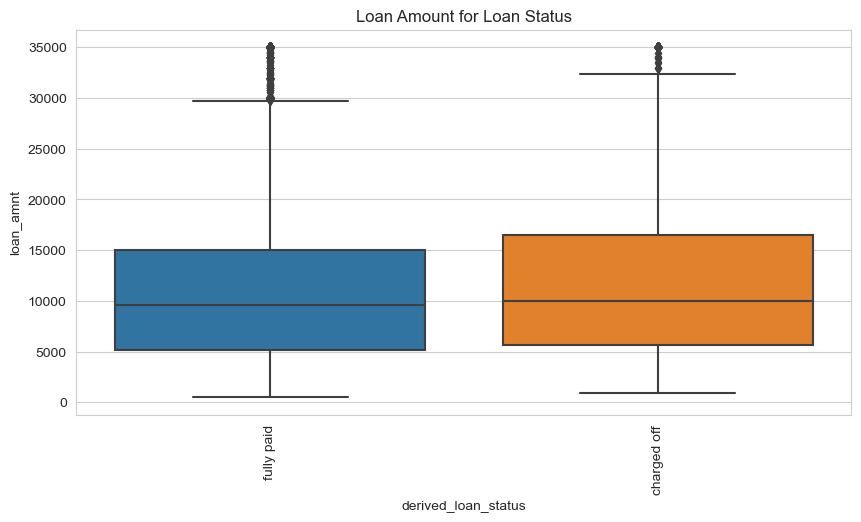

count      mean      std     min      25%       50%  \
derived_loan_status                                                           
charged off          5627.000 12104.385 8085.732 900.000 5600.000 10000.000   
fully paid          32950.000 10866.456 7199.629 500.000 5200.000  9600.000   

                          75%       max  
derived_loan_status                      
charged off         16500.000 35000.000  
fully paid          15000.000 35000.000

In [83]:
# Loan amount for Loan Status

plot_segmented_boxplot('derived_loan_status', 'loan_amnt', 'Loan Amount for Loan Status', (10, 5), None, 90)

Loan amount of fully paid loans seems to be a bit lower than charged off loans.

### Installment

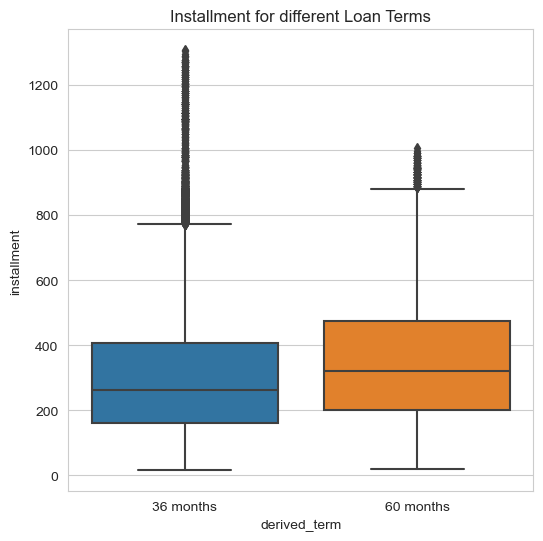

count    mean     std    min     25%     50%     75%      max
derived_term                                                                  
36 months    29096.000 311.693 209.513 15.690 160.450 261.880 405.475 1305.190
60 months     9481.000 355.527 202.395 19.870 200.940 322.070 474.860 1005.060

In [84]:
# installment for different terms

plot_segmented_boxplot('derived_term', 'installment', 'Installment for different Loan Terms')

Loans with 60 month term has a higher monthly installment.

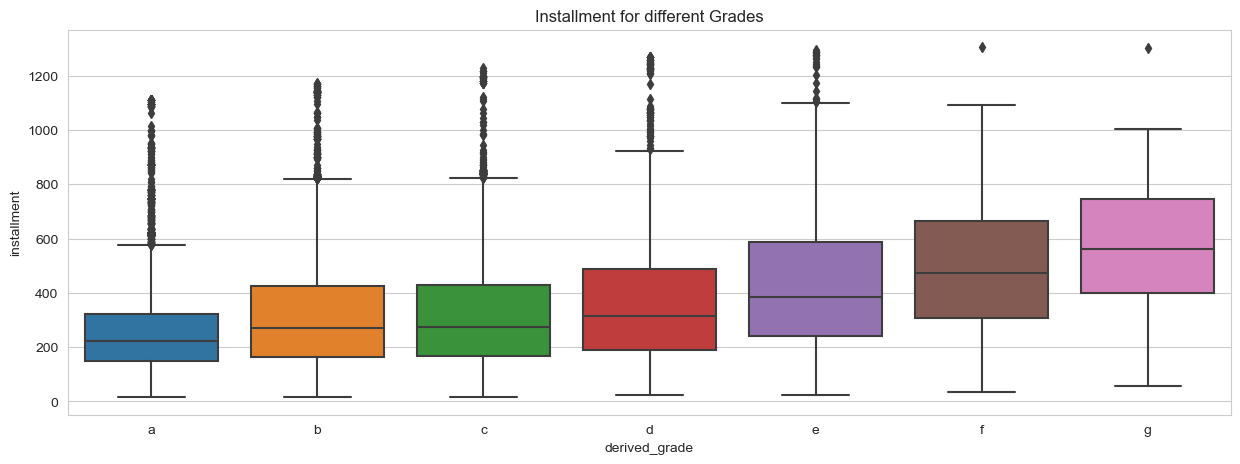

count    mean     std    min     25%     50%     75%  \
derived_grade                                                            
a             10045.000 256.950 160.118 15.690 150.800 222.280 320.950   
b             11675.000 319.611 203.241 16.080 163.860 271.880 426.400   
c              7834.000 317.682 198.716 16.470 168.090 276.060 430.400   
d              5085.000 363.333 229.380 23.510 191.500 316.280 486.580   
e              2663.000 426.915 241.595 24.730 242.920 383.920 586.590   
f               976.000 493.664 248.901 35.970 305.855 472.125 663.705   
g               299.000 576.278 246.560 58.780 398.330 561.060 744.890   

                   max  
derived_grade           
a             1111.370  
b             1174.070  
c             1229.810  
d             1269.730  
e             1295.210  
f             1305.190  
g             1302.690

In [85]:
# installment for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'installment', 'Installment for different Grades', (15, 5), order)

Loans with a grade ```g``` seems to have the highest the installment and this keeps decreasing from ```f``` to ```a```. 

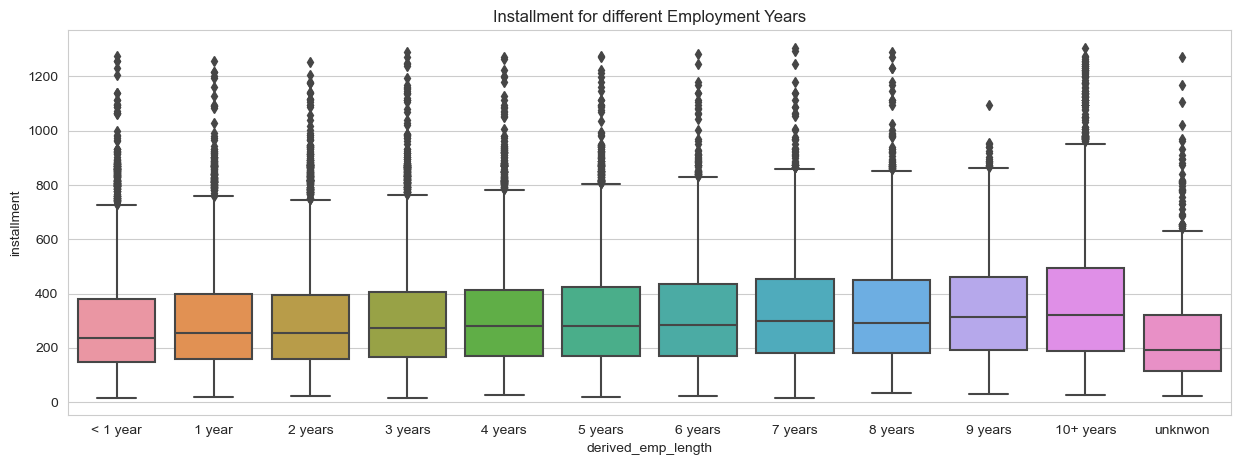

count    mean     std    min     25%     50%     75%  \
derived_emp_length                                                           
1 year             3169.000 302.298 198.332 19.870 157.130 255.660 397.750   
10+ years          8488.000 363.297 225.529 24.320 187.290 319.715 493.670   
2 years            4291.000 302.465 199.664 21.810 159.740 255.330 393.575   
3 years            4012.000 313.030 199.327 16.250 164.860 272.935 404.635   
4 years            3342.000 319.701 202.682 24.730 168.647 279.760 414.565   
5 years            3194.000 323.980 204.905 20.220 169.102 278.595 423.610   
6 years            2168.000 327.113 204.498 23.260 171.407 284.360 435.595   
7 years            1711.000 337.322 208.964 16.080 181.970 298.580 453.040   
8 years            1435.000 339.850 217.861 33.470 180.365 291.180 449.800   
9 years            1226.000 346.644 202.085 28.920 193.093 313.520 461.653   
< 1 year           4508.000 286.385 195.459 15.690 146.660 237.850 378.920   
unknwon            1033.000 243.095 181.978 23.010 114.230 193.580 322.250   

                        max  
derived_emp_length           
1 year             1256.400  
10+ years          1302.690  
2 years            1252.560  
3 years            1288.100  
4 years            1272.200  
5 years            1276.600  
6 years            1283.500  
7 years            1305.190  
8 years            1288.100  
9 years            1095.160  
< 1 year           1276.600  
unknwon            1269.730

In [86]:
# installment for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'installment', 'Installment for different Employment Years', (15, 5), order)

There is a slight increase in the installment with increase in the years of employment.

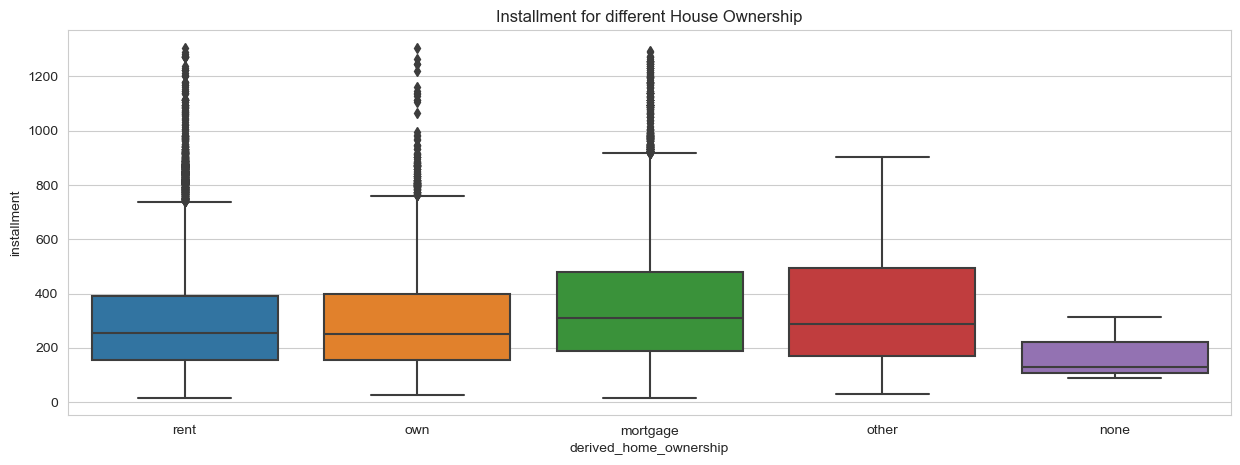

count    mean     std    min     25%     50%  \
derived_home_ownership                                                    
mortgage               17021.000 354.416 221.211 16.080 186.450 311.020   
none                       3.000 176.427 119.269 88.650 108.530 128.410   
other                     98.000 338.746 197.230 31.200 168.825 288.190   
own                     2975.000 298.637 201.580 27.680 154.970 250.250   
rent                   18480.000 296.813 193.290 15.690 156.100 255.575   

                           75%      max  
derived_home_ownership                   
mortgage               478.220 1295.210  
none                   220.315  312.220  
other                  494.135  902.500  
own                    397.380 1302.690  
rent                   389.442 1305.190

In [87]:
# installment for different house ownership

plot_segmented_boxplot('derived_home_ownership', 'installment', 'Installment for different House Ownership', (15, 5))

Looking at the 75th percentile, borrowers with a ```other``` as the home ownership have a higher loan amount than others, followed very closely by mortgage.

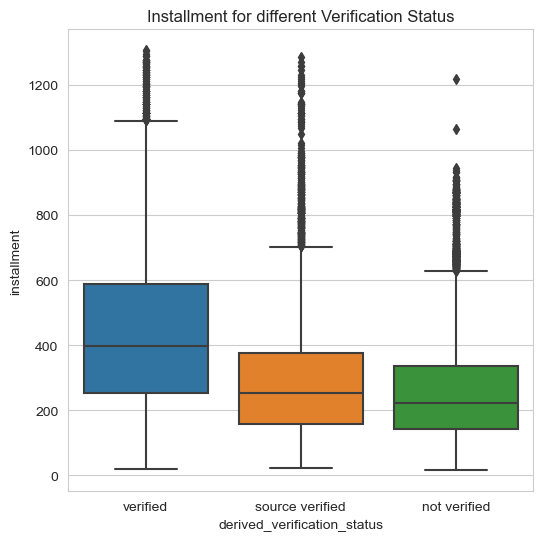

count    mean     std    min     25%     50%  \
derived_verification_status                                                    
not verified                16694.000 258.804 161.464 15.690 142.465 223.940   
source verified              9677.000 288.561 181.572 22.940 157.400 253.290   
verified                    12206.000 436.417 237.381 20.220 252.928 398.865   

                                75%      max  
derived_verification_status                   
not verified                336.340 1217.240  
source verified             375.380 1283.500  
verified                    587.185 1305.190

In [88]:
# installment for verification status

plot_segmented_boxplot('derived_verification_status', 'installment', 'Installment for different Verification Status')

- Loans with a higher installment are verified.
- Source verified loans and not verified loans have lesser installments.

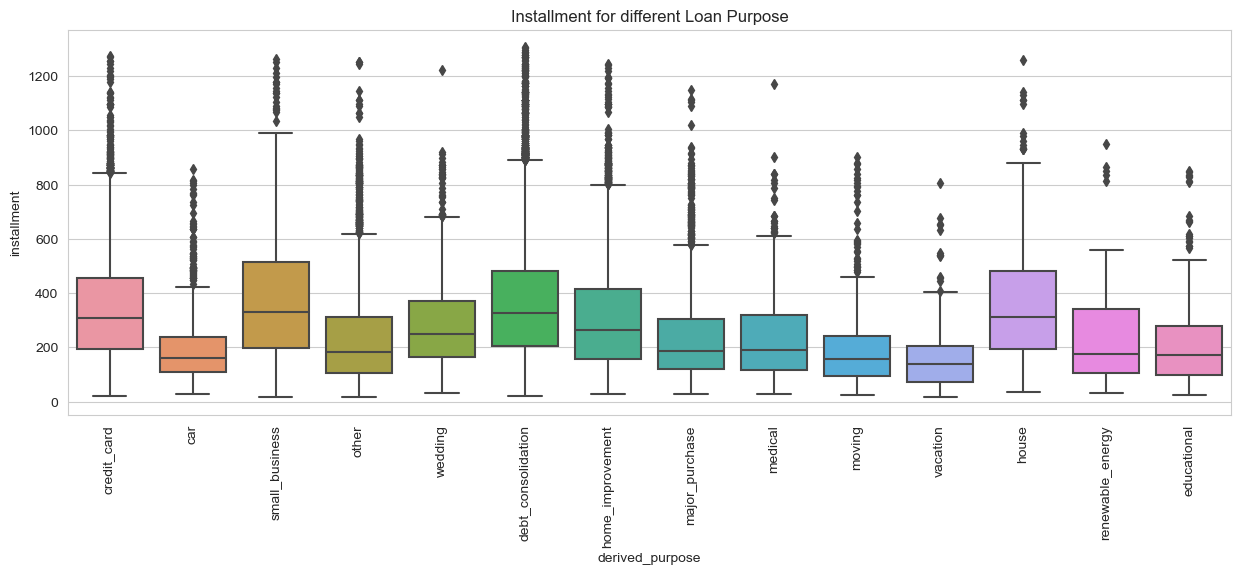

count    mean     std    min     25%     50%     75%  \
derived_purpose                                                               
car                 1499.000 190.575 119.465 28.010 111.095 162.730 238.220   
credit_card         5027.000 345.932 202.725 22.510 194.690 309.320 454.300   
debt_consolidation 18055.000 364.115 208.601 20.220 206.295 326.230 480.310   
educational          325.000 218.110 167.157 24.160  98.240 171.530 280.620   
home_improvement    2875.000 319.339 218.673 28.470 159.105 263.750 416.030   
house                367.000 367.046 230.856 37.220 192.670 312.910 481.235   
major_purchase      2150.000 235.374 169.307 28.690 121.385 186.970 303.960   
medical              681.000 234.798 160.629 28.500 118.450 190.470 318.640   
moving               576.000 194.422 155.595 23.170  93.333 156.030 242.653   
other               3865.000 235.471 179.619 15.690 105.460 184.070 311.110   
renewable_energy     102.000 246.505 199.429 32.440 104.340 175.205 343.288   
small_business      1754.000 383.857 239.844 16.250 197.500 329.185 516.517   
vacation             375.000 161.850 118.630 16.310  74.455 138.930 206.400   
wedding              926.000 291.760 178.273 31.050 164.852 248.020 372.120   

                        max  
derived_purpose              
car                 857.340  
credit_card        1272.200  
debt_consolidation 1305.190  
educational         849.220  
home_improvement   1243.850  
house              1257.980  
major_purchase     1147.680  
medical            1169.540  
moving              902.940  
other              1252.560  
renewable_energy    950.120  
small_business     1263.230  
vacation            805.630  
wedding            1223.950

In [89]:
# installment for different loan purpose

plot_segmented_boxplot('derived_purpose', 'installment', 'Installment for different Loan Purpose', (15, 5), None, 90)

Installments for small business tend to be higher than the others and installments for vacation is the least.

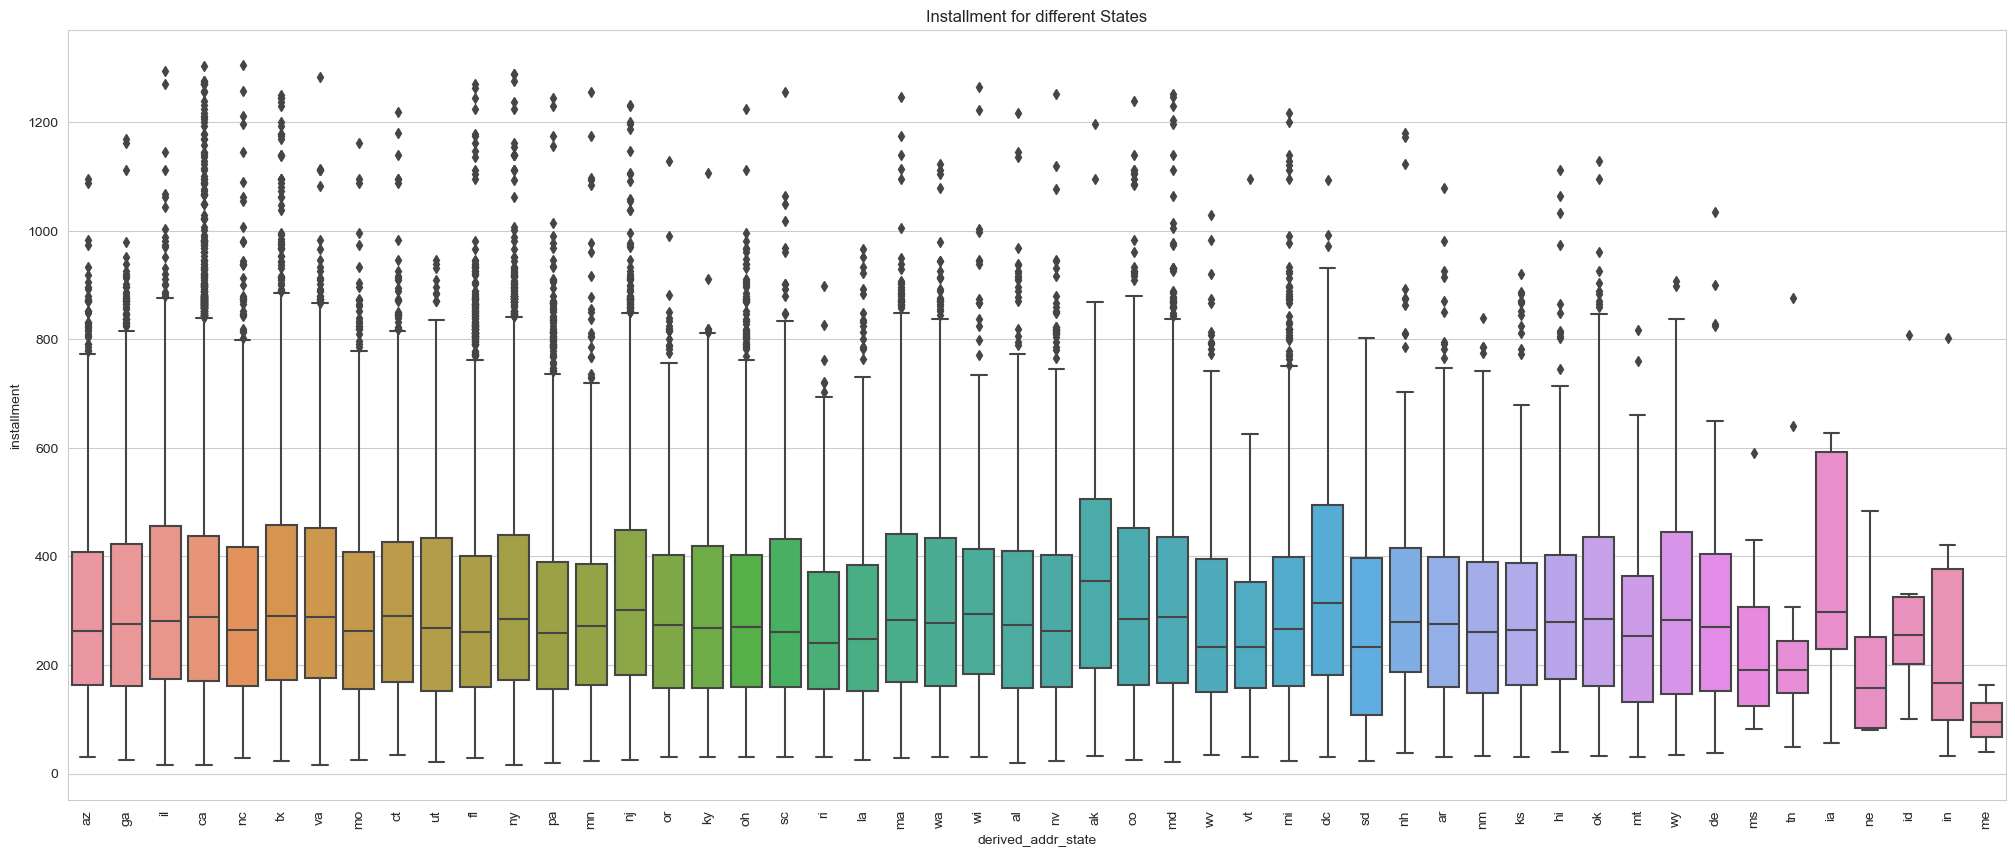

In [90]:
# installment for different states

plot_segmented_boxplot('derived_addr_state', 'installment', 'Installment for different States', (25, 10), None, 90, False)

- Installments in Iowa (IA) tend to be higher than others.
- Maine (ME) has the lowest installments.

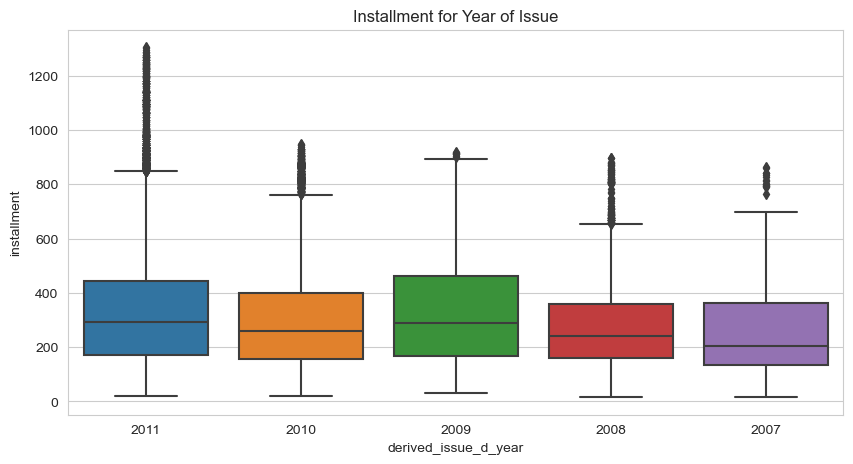

count    mean     std    min     25%     50%     75%  \
derived_issue_d_year                                                            
2007                   251.000 279.704 207.890 15.690 135.430 205.400 364.230   
2008                  1562.000 284.313 186.296 16.080 159.732 239.980 357.392   
2009                  4716.000 329.141 202.611 31.060 168.860 287.850 460.930   
2010                 11532.000 303.544 194.295 19.870 158.270 260.210 399.900   
2011                 20516.000 334.996 218.016 21.250 171.550 292.370 442.142   

                          max  
derived_issue_d_year           
2007                  862.970  
2008                  897.060  
2009                  918.020  
2010                  950.120  
2011                 1305.190

In [91]:
# installment for Year of Loan issue
plot_segmented_boxplot('derived_issue_d_year', 'installment', 'Installment for Year of Issue', (10, 5))

- Installments in 2009 and 2011 are very similar and are higher compared to installments for other years.

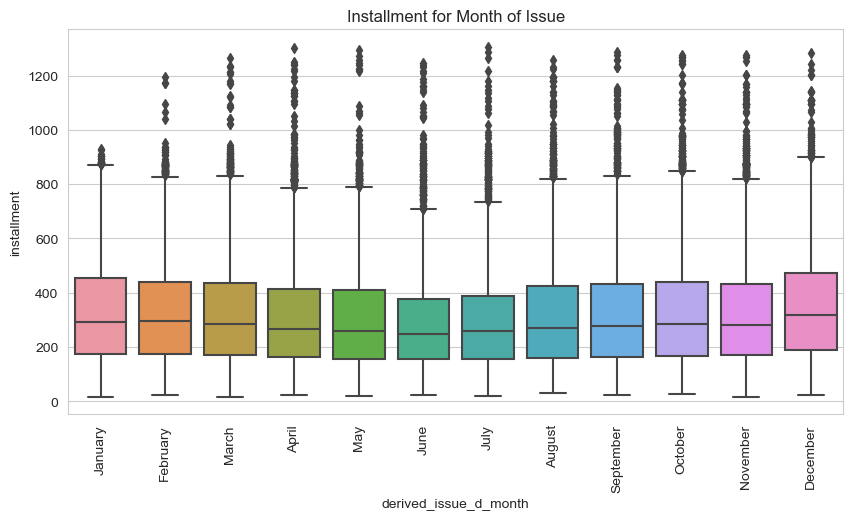

count    mean     std    min     25%     50%     75%  \
derived_issue_d_month                                                           
April                 2831.000 317.280 212.354 22.590 161.900 264.940 411.840   
August                3388.000 319.062 212.484 28.920 160.838 271.600 424.732   
December              4215.000 352.817 212.181 22.940 187.750 317.540 472.140   
February              2358.000 330.158 203.636 21.250 174.517 294.830 438.282   
January               2379.000 329.381 201.635 16.250 174.080 291.780 453.425   
July                  3351.000 297.833 193.833 20.220 156.680 258.100 388.095   
June                  3180.000 291.023 192.298 23.910 154.588 248.855 375.540   
March                 2691.000 330.948 212.620 16.080 171.820 283.280 436.520   
May                   2919.000 307.358 201.516 19.870 155.645 260.480 409.700   
November              4006.000 328.822 213.703 15.690 169.660 281.150 430.087   
October               3761.000 333.631 219.295 26.510 167.400 285.950 439.760   
September             3498.000 322.482 211.470 23.260 162.870 278.435 430.597   

                           max  
derived_issue_d_month           
April                 1302.690  
August                1256.400  
December              1283.500  
February              1192.830  
January                930.500  
July                  1305.190  
June                  1245.940  
March                 1263.230  
May                   1295.210  
November              1276.600  
October               1276.600  
September             1288.100

In [92]:
# installment for Month of Loan issue
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plot_segmented_boxplot('derived_issue_d_month', 'installment', 'Installment for Month of Issue', (10, 5), order, 90)

- Installments for December is a bit higher than other months.
- Looking at the 75th percentile, installment for June and July are a bit lower than others.

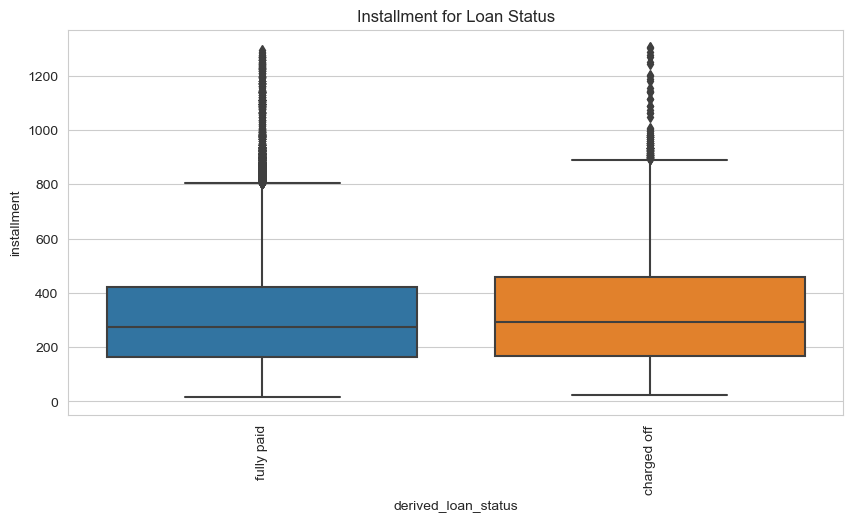

count    mean     std    min     25%     50%     75%  \
derived_loan_status                                                            
charged off          5627.000 336.175 217.052 22.790 168.555 293.870 457.840   
fully paid          32950.000 320.125 207.081 15.690 165.282 275.650 420.735   

                         max  
derived_loan_status           
charged off         1305.190  
fully paid          1295.210

In [93]:
# installment for Loan Status

plot_segmented_boxplot('derived_loan_status', 'installment', 'Installment for Loan Status', (10, 5), None, 90)

Fully paid loans have lower monthly installments compared to charged off loans.

### Annual Income

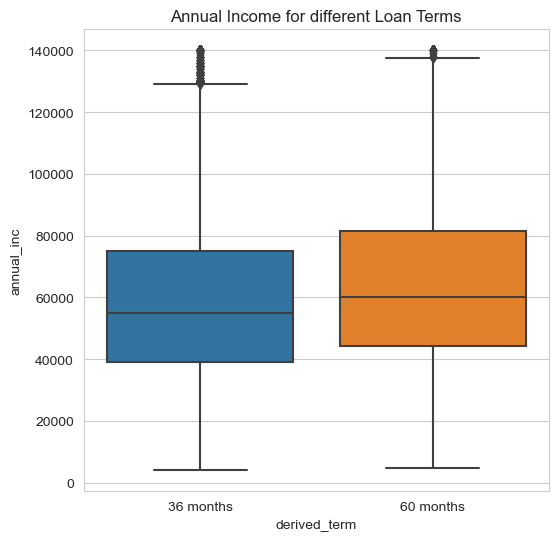

count      mean       std      min       25%       50%  \
derived_term                                                              
36 months    27714.000 59571.877 27690.535 4000.000 39000.000 55000.000   
60 months     8928.000 64734.729 27438.965 4800.000 44104.500 60000.000   

                   75%        max  
derived_term                       
36 months    75000.000 140000.000  
60 months    81528.000 140000.000

In [94]:
# annual_inc for different terms

plot_segmented_boxplot('derived_term', 'annual_inc', 'Annual Income for different Loan Terms', remove_outliers=True)

Borrowers with a higher annual income prefer 60 month term more.

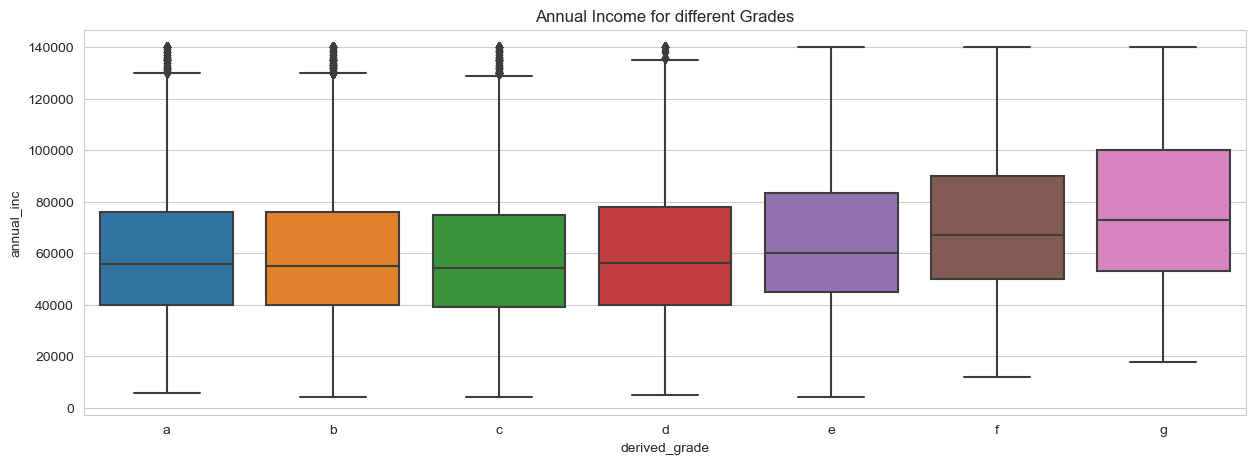

count      mean       std       min       25%       50%  \
derived_grade                                                               
a              9643.000 60462.977 27447.849  5500.000 40000.000 55782.000   
b             11096.000 59935.806 27329.322  4080.000 39996.000 55000.000   
c              7477.000 59283.270 27510.335  4000.000 39000.000 54200.000   
d              4834.000 60846.864 27884.769  4800.000 40000.000 56000.000   
e              2445.000 65755.171 28541.540  4200.000 45000.000 60000.000   
f               886.000 70920.778 28450.359 12000.000 50000.000 67200.000   
g               261.000 75986.672 30309.065 17652.000 53000.000 72800.000   

                     75%        max  
derived_grade                        
a              76000.000 140000.000  
b              75996.000 140000.000  
c              75000.000 140000.000  
d              78000.000 140000.000  
e              83400.000 140000.000  
f              90000.000 140000.000  
g             100000.000 140000.000

In [95]:
# annual_inc for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'annual_inc', 'Annual Income for different Grades', (15, 5), order, remove_outliers=True)

Loans with a grade ```g``` seems to have the highest the annual income and this keeps decreasing from ```f``` to ```a```. 

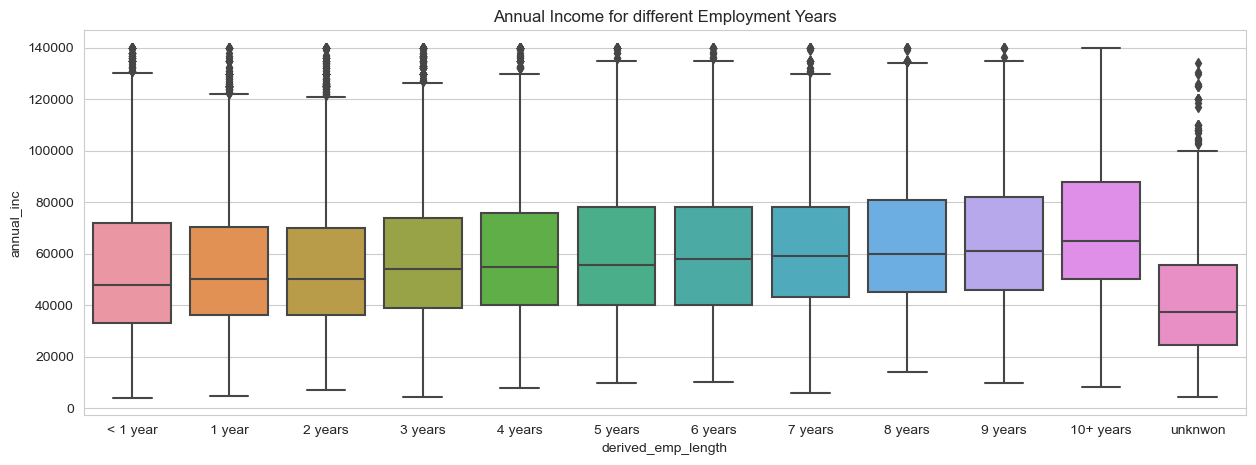

count      mean       std       min       25%       50%  \
derived_emp_length                                                              
1 year             3043.000 55963.297 27082.601  4800.000 36000.000 50000.000   
10+ years          7884.000 70136.695 27063.046  8088.000 50000.000 65044.500   
2 years            4101.000 55912.531 26634.503  7000.000 36000.000 50000.000   
3 years            3823.000 59019.124 27159.404  4200.000 39000.000 54000.000   
4 years            3197.000 60306.280 26896.683  8004.000 40000.000 55000.000   
5 years            3044.000 60736.266 26610.192  9600.000 40000.000 55530.000   
6 years            2073.000 61792.044 26862.727 10000.000 40000.000 57772.000   
7 years            1643.000 62683.750 25964.126  6000.000 43154.000 59000.000   
8 years            1341.000 64432.060 26968.477 14000.000 45000.000 60000.000   
9 years            1152.000 65797.927 26259.443  9732.000 46000.000 61000.000   
< 1 year           4327.000 54713.866 28762.985  4000.000 33000.000 48000.000   
unknwon            1014.000 42436.957 23844.385  4200.000 24468.000 37302.000   

                         75%        max  
derived_emp_length                       
1 year             70473.100 140000.000  
10+ years          88000.000 140000.000  
2 years            70000.000 140000.000  
3 years            74000.000 140000.000  
4 years            76000.000 140000.000  
5 years            78000.000 140000.000  
6 years            78000.000 140000.000  
7 years            78000.000 140000.000  
8 years            80690.000 140000.000  
9 years            82000.000 140000.000  
< 1 year           72000.000 140000.000  
unknwon            55470.000 134000.000

In [96]:
# annual_inc for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'annual_inc', 'Annual Income for different Employment Years', (15, 5), order, remove_outliers=True)

There is a slight increase in the Annual Income with increase in the years of employment.

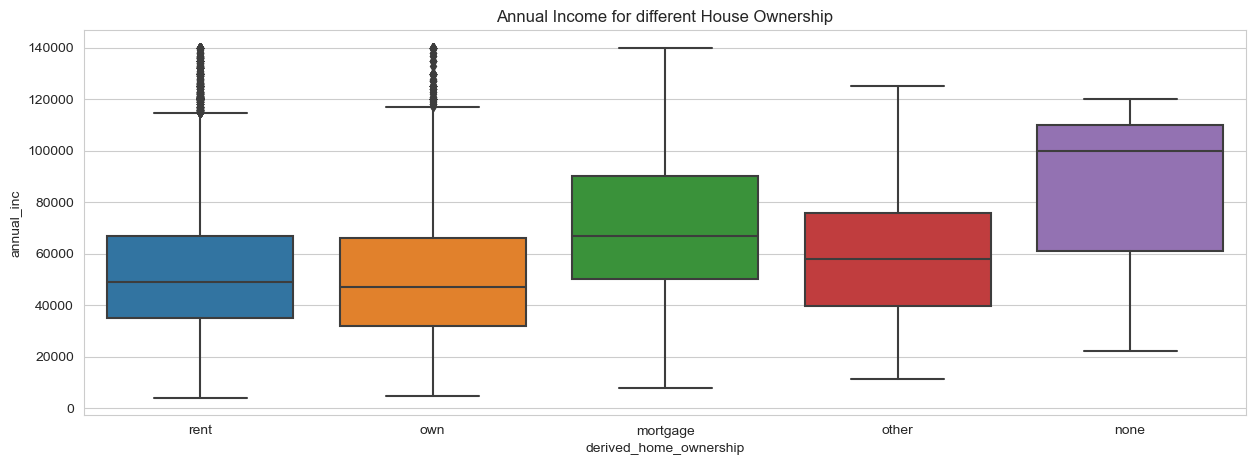

count      mean       std       min       25%  \
derived_home_ownership                                                     
mortgage               15666.000 71169.088 27590.346  7904.040 50000.000   
none                       3.000 80733.333 51668.301 22200.000 61100.000   
other                     92.000 59416.826 25780.914 11389.000 39597.000   
own                     2852.000 52084.255 27090.464  4800.000 32000.000   
rent                   18029.000 53233.063 24850.370  4000.000 35004.000   

                              50%        75%        max  
derived_home_ownership                                   
mortgage                67000.000  90000.000 140000.000  
none                   100000.000 110000.000 120000.000  
other                   58000.000  75750.000 125004.000  
own                     47000.000  66000.000 140000.000  
rent                    49000.000  66996.000 140000.000

In [97]:
# annual_inc for different house ownership

plot_segmented_boxplot('derived_home_ownership', 'annual_inc', 'Annual Income for different House Ownership', (15, 5), remove_outliers=True)

Without considering ```none``` category, borrowers with mortgage have a higher loan amount than others.

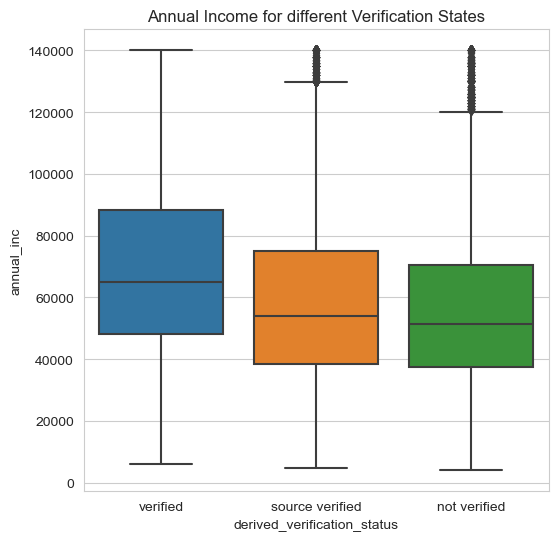

count      mean       std      min       25%  \
derived_verification_status                                                    
not verified                16278.000 56373.068 25821.047 4000.000 37440.000   
source verified              9150.000 58698.364 27402.043 4800.000 38400.000   
verified                    11214.000 69038.330 28811.528 6000.000 48000.000   

                                  50%       75%        max  
derived_verification_status                                 
not verified                51496.000 70550.565 140000.000  
source verified             54000.000 75000.000 140000.000  
verified                    65000.000 88251.000 140000.000

In [98]:
# annual_inc for verification status

plot_segmented_boxplot('derived_verification_status', 'annual_inc', 'Annual Income for different Verification States', remove_outliers=True)

- Loans with a higher annual income are verified.
- Source verified loans and not verified loans have lesser annual income.

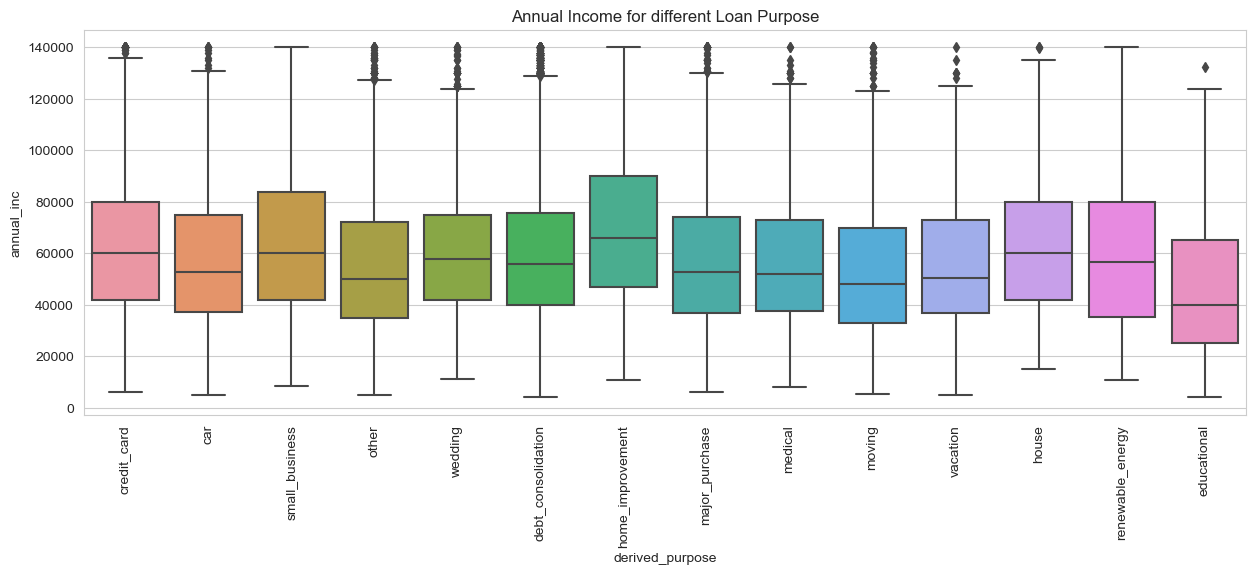

count      mean       std       min       25%  \
derived_purpose                                                        
car                 1448.000 57722.039 27449.257  4800.000 37037.500   
credit_card         4782.000 63491.475 27843.043  6000.000 42000.000   
debt_consolidation 17301.000 60674.344 26787.506  4080.000 40000.000   
educational          312.000 47501.297 28837.887  4000.000 25200.000   
home_improvement    2555.000 69759.334 29478.616 10800.000 46900.000   
house                338.000 62994.225 27697.069 15000.000 42000.000   
major_purchase      2045.000 57751.449 28047.404  6000.000 36672.000   
medical              640.000 57883.462 27186.975  8088.000 37650.000   
moving               550.000 54347.160 30018.414  5500.000 33000.000   
other               3696.000 55870.416 27540.280  4800.000 35004.000   
renewable_energy      95.000 61004.954 31738.638 10980.000 35387.815   
small_business      1623.000 64464.638 28799.207  8400.000 42000.000   
vacation             365.000 56121.659 27178.578  4888.000 37000.000   
wedding              892.000 61898.483 26768.587 11029.000 42000.000   

                         50%       75%        max  
derived_purpose                                    
car                52800.000 74790.000 140000.000  
credit_card        60000.000 80000.000 140000.000  
debt_consolidation 56000.000 75600.000 140000.000  
educational        40000.000 65000.000 132444.000  
home_improvement   66000.000 90000.000 140000.000  
house              60000.000 80000.000 140000.000  
major_purchase     52800.000 74076.000 140000.000  
medical            52000.000 73000.000 140000.000  
moving             48000.000 69783.000 140000.000  
other              50004.000 72000.000 140000.000  
renewable_energy   56532.000 80000.000 140000.000  
small_business     60000.000 84000.000 140000.000  
vacation           50400.000 73000.000 140000.000  
wedding            58000.000 75000.000 140000.000

In [99]:
# annual_inc for different loan purpose

plot_segmented_boxplot('derived_purpose', 'annual_inc', 'Annual Income for different Loan Purpose', (15, 5), None, 90, remove_outliers=True)

- Annual income of people who get loan for home improvement are higher compared to others.
- Annual income of those who avail educational loans are lower than others.

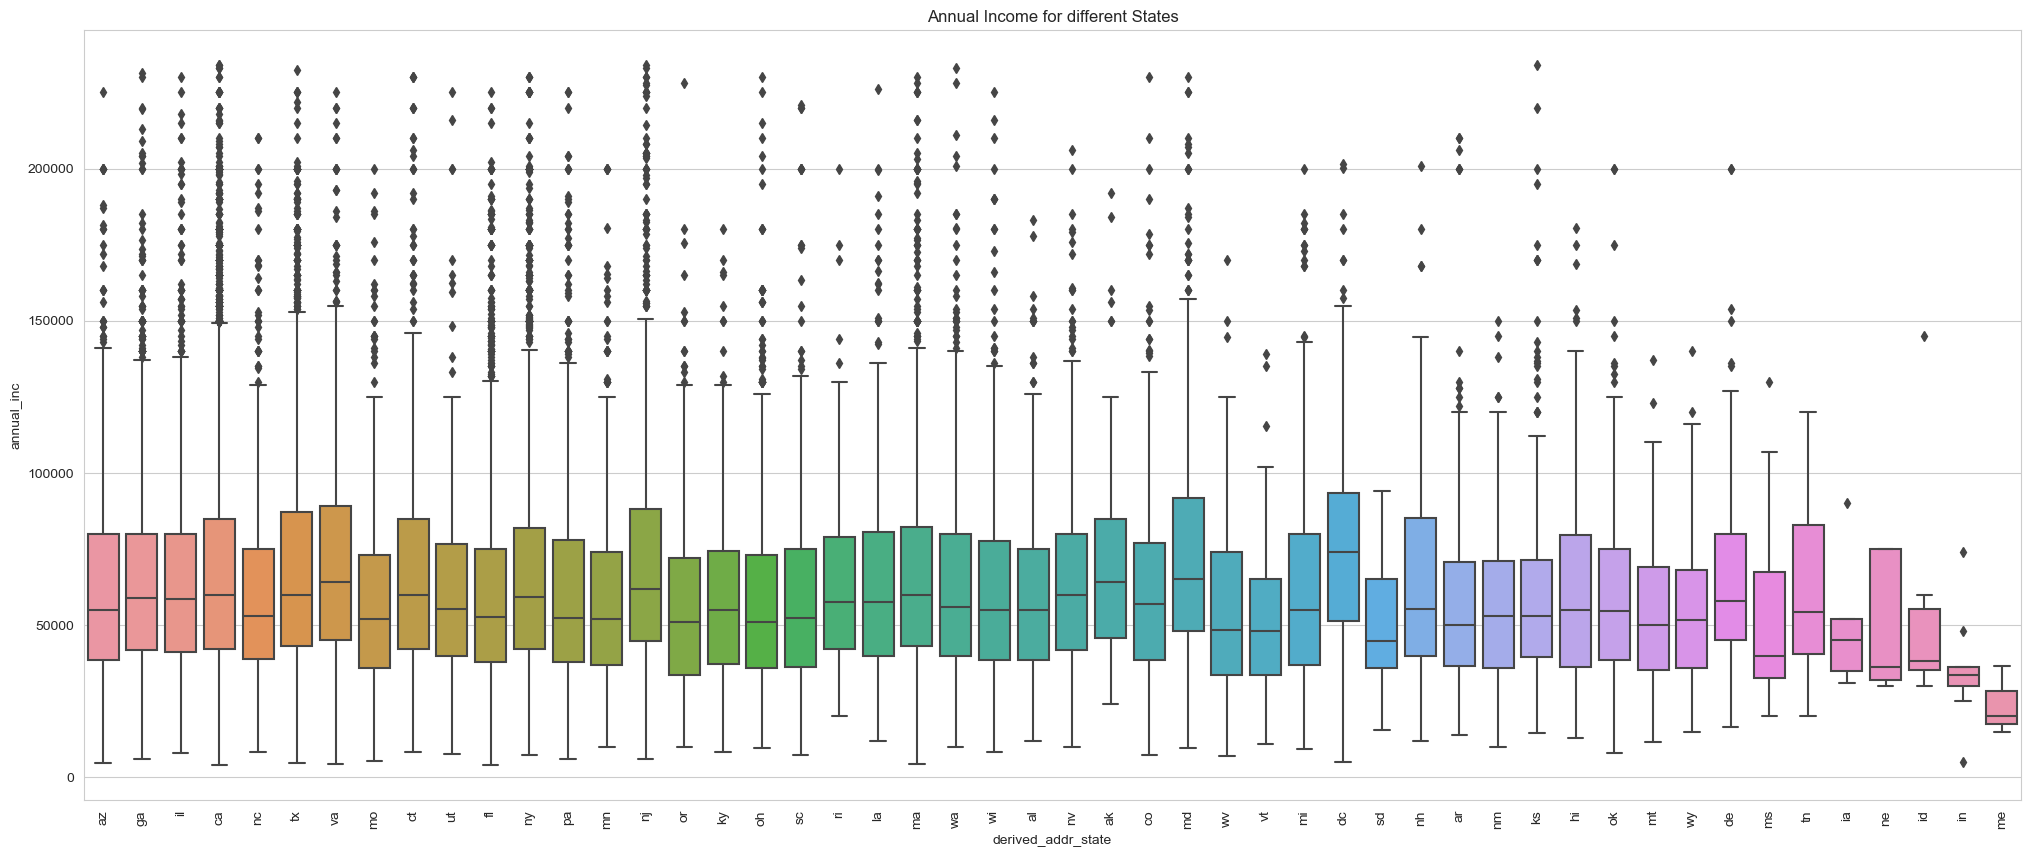

In [100]:
# annual_inc for different states

plot_segmented_boxplot('derived_addr_state', 'annual_inc', 'Annual Income for different States', (25, 10), None, 90, False, remove_outliers=True, outlier_threshold=0.99)

- Annual Income in District of Columbia (DC) tend to be higher than others.
- Maine (ME) has the lowest annual income.

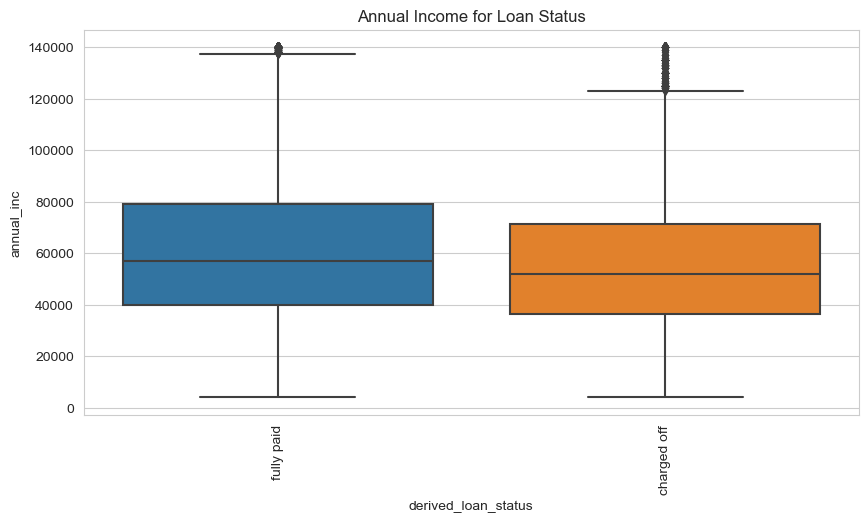

count      mean       std      min       25%  \
derived_loan_status                                                    
charged off          5416.000 56410.901 26538.397 4080.000 36294.750   
fully paid          31226.000 61596.273 27846.467 4000.000 40000.000   

                          50%       75%        max  
derived_loan_status                                 
charged off         51962.000 71175.250 140000.000  
fully paid          57000.000 79000.000 140000.000

In [101]:
# annual_inc for Loan Status

plot_segmented_boxplot('derived_loan_status', 'annual_inc', 'Annual Income for Loan Status', (10, 5), None, 90, remove_outliers=True)

Annual income of borrowers who have fully paid the loans seems to be higher than borrowers whose loans charged off.

### DTI (Debts to Income Ratio)

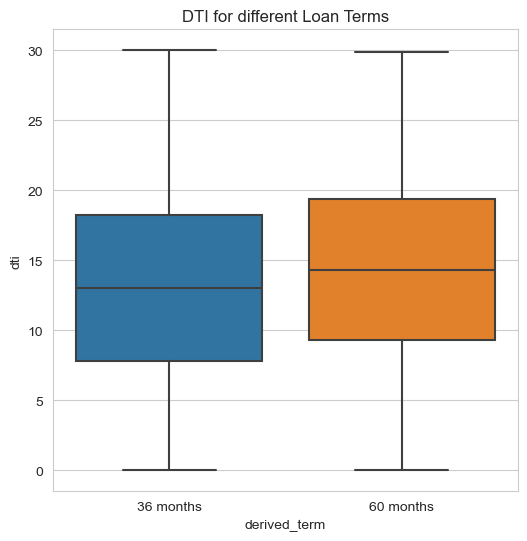

count   mean   std   min   25%    50%    75%    max
derived_term                                                        
36 months    29096.000 12.983 6.681 0.000 7.800 13.000 18.240 29.990
60 months     9481.000 14.163 6.568 0.000 9.300 14.340 19.350 29.890

In [102]:
# dti for different terms

plot_segmented_boxplot('derived_term', 'dti', 'DTI for different Loan Terms')

Loans with 60 month term have a higher DTI.

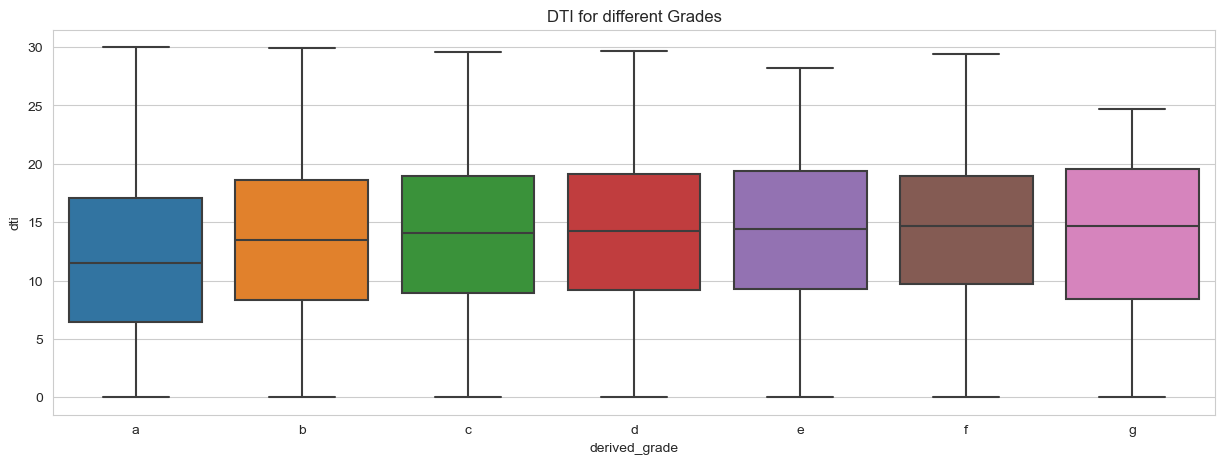

count   mean   std   min   25%    50%    75%    max
derived_grade                                                        
a             10045.000 12.045 6.990 0.000 6.470 11.500 17.070 29.990
b             11675.000 13.385 6.627 0.000 8.310 13.500 18.615 29.930
c              7834.000 13.853 6.487 0.000 8.970 14.060 18.990 29.560
d              5085.000 13.924 6.357 0.000 9.170 14.230 19.110 29.630
e              2663.000 14.035 6.381 0.000 9.305 14.410 19.355 28.190
f               976.000 14.208 6.120 0.000 9.715 14.700 18.968 29.420
g               299.000 14.035 6.257 0.000 8.380 14.630 19.575 24.690

In [103]:
# dti for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'dti', 'DTI for different Grades', (15, 5), order)

Loans with a grade A seems to have the lowest DTI.

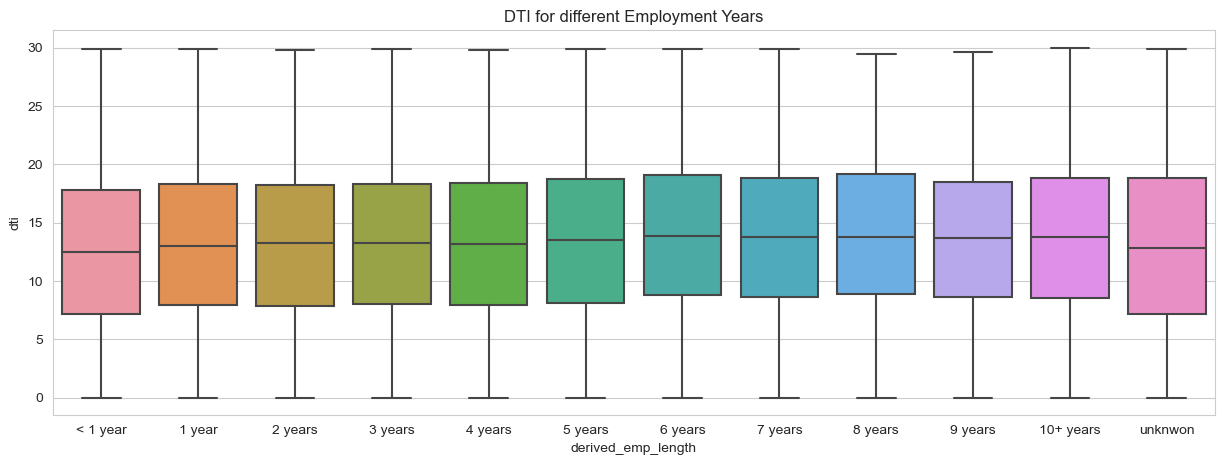

count   mean   std   min   25%    50%    75%    max
derived_emp_length                                                       
1 year             3169.000 13.040 6.668 0.000 7.920 13.040 18.350 29.930
10+ years          8488.000 13.636 6.701 0.000 8.590 13.770 18.870 29.990
2 years            4291.000 13.058 6.611 0.000 7.880 13.240 18.235 29.770
3 years            4012.000 13.152 6.609 0.000 8.000 13.235 18.300 29.930
4 years            3342.000 13.163 6.697 0.000 7.965 13.195 18.398 29.820
5 years            3194.000 13.386 6.692 0.000 8.130 13.500 18.758 29.880
6 years            2168.000 13.811 6.608 0.000 8.768 13.890 19.090 29.920
7 years            1711.000 13.653 6.528 0.000 8.675 13.810 18.810 29.890
8 years            1435.000 13.764 6.525 0.000 8.880 13.790 19.205 29.440
9 years            1226.000 13.500 6.515 0.000 8.630 13.715 18.527 29.650
< 1 year           4508.000 12.540 6.696 0.000 7.180 12.500 17.832 29.930
unknwon            1033.000 12.856 7.103 0.000 7.150 12.800 18.800 29.860

In [104]:
# dti for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'dti', 'DTI for different Employment Years', (15, 5), order)

DTI is almost very similar for all years of employment.

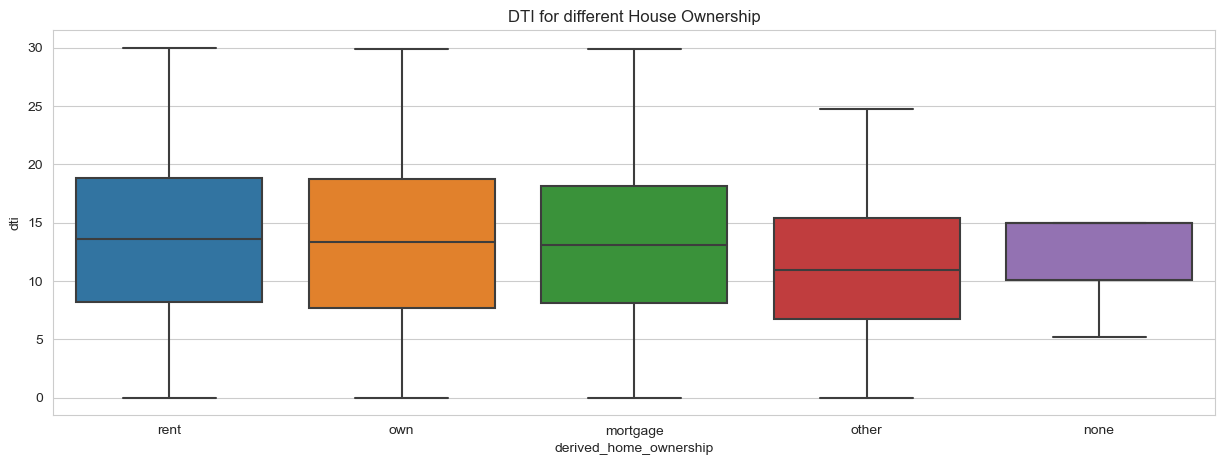

count   mean   std   min    25%    50%    75%  \
derived_home_ownership                                                     
mortgage               17021.000 13.110 6.582 0.000  8.110 13.120 18.160   
none                       3.000 11.747 5.635 5.240 10.120 15.000 15.000   
other                     98.000 11.252 6.247 0.000  6.765 10.990 15.425   
own                     2975.000 13.182 7.060 0.000  7.710 13.370 18.760   
rent                   18480.000 13.448 6.689 0.000  8.240 13.620 18.830   

                          max  
derived_home_ownership         
mortgage               29.920  
none                   15.000  
other                  24.770  
own                    29.930  
rent                   29.990

In [105]:
# dti for different house ownership

plot_segmented_boxplot('derived_home_ownership', 'dti', 'DTI for different House Ownership', (15, 5))

Borrowers with a ```other``` as the home ownership have a lower DTI than others.

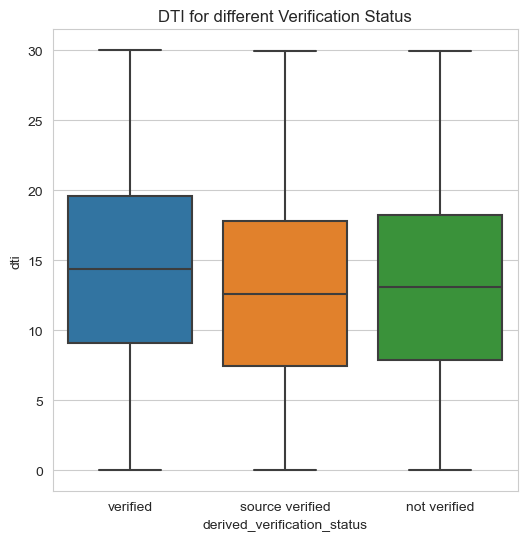

count   mean   std   min   25%    50%    75%  \
derived_verification_status                                                    
not verified                16694.000 12.994 6.608 0.000 7.890 13.100 18.200   
source verified              9677.000 12.605 6.570 0.000 7.440 12.610 17.770   
verified                    12206.000 14.183 6.746 0.000 9.112 14.380 19.610   

                               max  
derived_verification_status         
not verified                29.930  
source verified             29.930  
verified                    29.990

In [106]:
# dti for verification status

plot_segmented_boxplot('derived_verification_status', 'dti', 'DTI for different Verification Status')

Verified loans seems to have higher DTI than others.

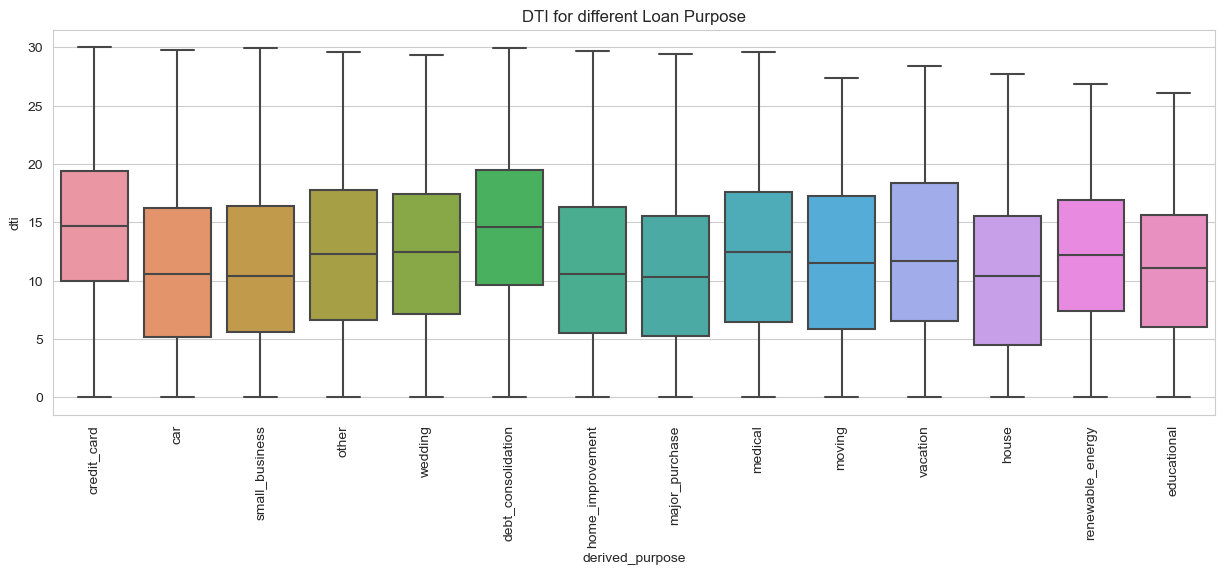

count   mean   std   min    25%    50%    75%    max
derived_purpose                                                            
car                 1499.000 11.084 6.926 0.000  5.200 10.620 16.245 29.790
credit_card         5027.000 14.565 6.163 0.000 10.000 14.700 19.400 29.990
debt_consolidation 18055.000 14.428 6.291 0.000  9.650 14.570 19.455 29.930
educational          325.000 11.206 6.460 0.000  6.000 11.110 15.640 26.050
home_improvement    2875.000 11.119 6.816 0.000  5.550 10.560 16.305 29.650
house                367.000 10.575 6.960 0.000  4.475 10.380 15.515 27.730
major_purchase      2150.000 10.770 6.751 0.000  5.250 10.360 15.532 29.450
medical              681.000 12.197 6.829 0.080  6.450 12.450 17.640 29.620
moving               576.000 11.666 6.858 0.000  5.860 11.560 17.297 27.350
other               3865.000 12.239 6.888 0.000  6.620 12.290 17.750 29.560
renewable_energy     102.000 12.104 6.798 0.000  7.370 12.230 16.890 26.890
small_business      1754.000 11.096 6.903 0.000  5.600 10.425 16.448 29.920
vacation             375.000 12.245 7.114 0.000  6.590 11.690 18.380 28.370
wedding              926.000 12.335 6.737 0.000  7.135 12.465 17.410 29.380

In [107]:
# dti for different loan purpose

plot_segmented_boxplot('derived_purpose', 'dti', 'DTI for different Loan Purpose', (15, 5), None, 90)

DTI of loans for credit card and debt consolidation are higher compared to other purposes.

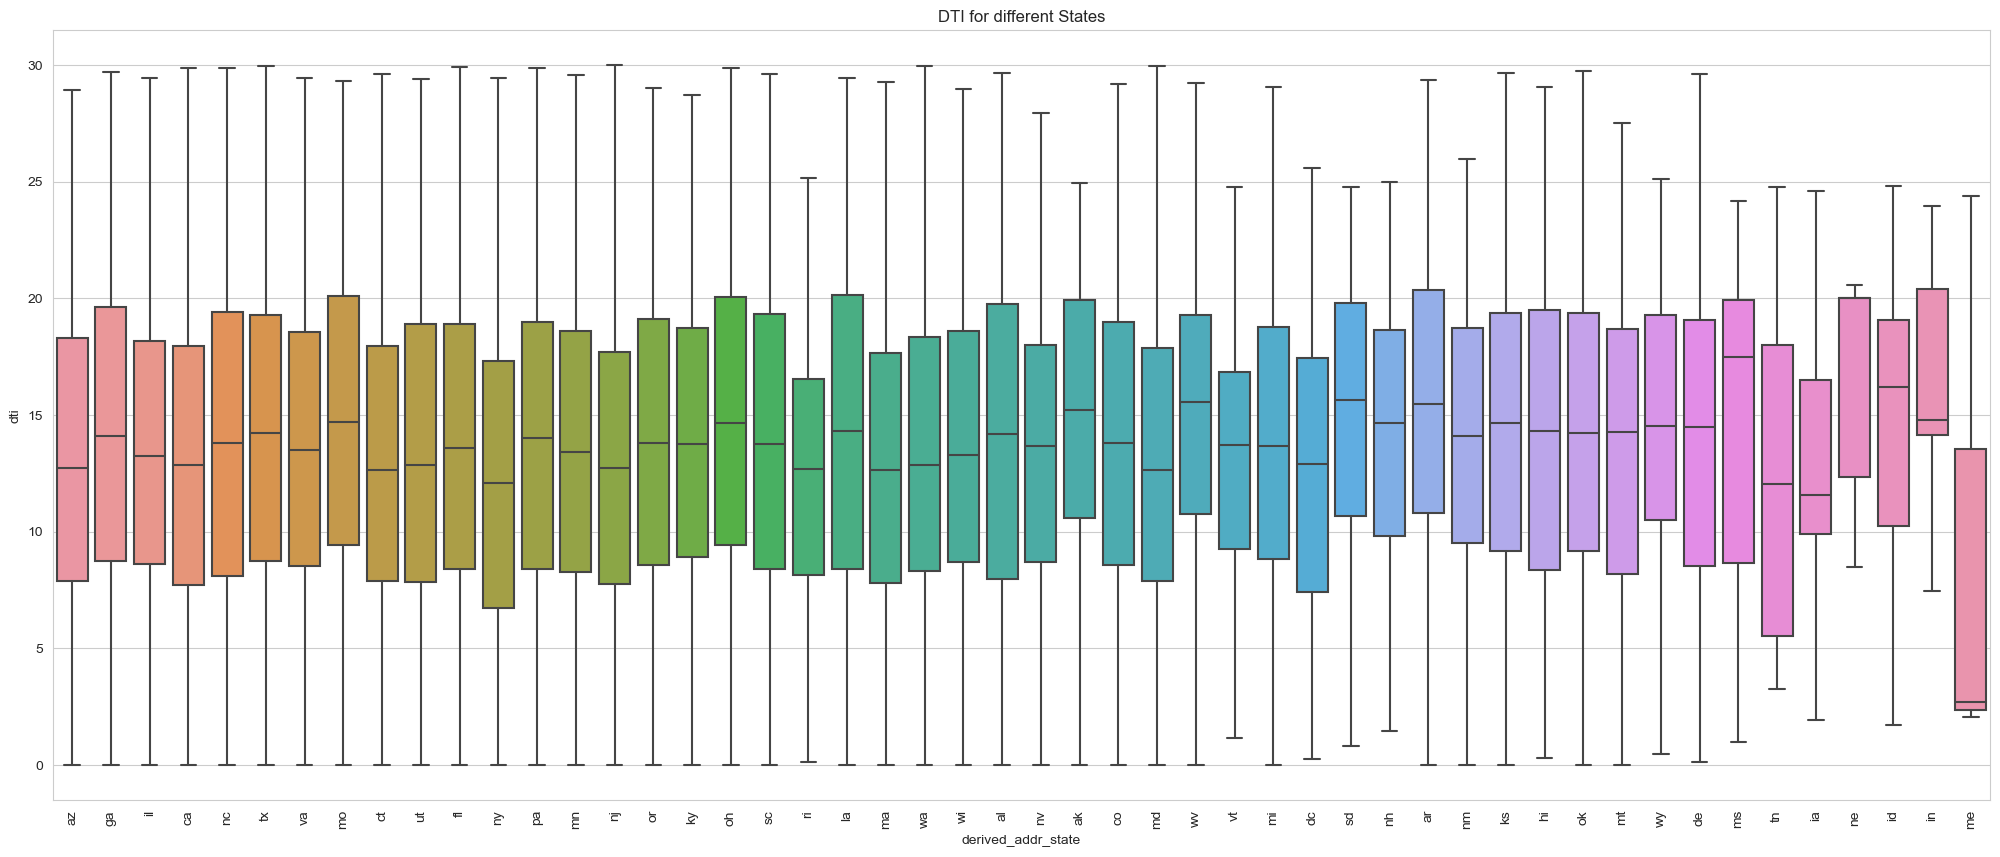

In [108]:
# dti for different states

plot_segmented_boxplot('derived_addr_state', 'dti', 'DTI for different States', (25, 10), None, 90, False)

Maine (ME) has the lowest DTI.

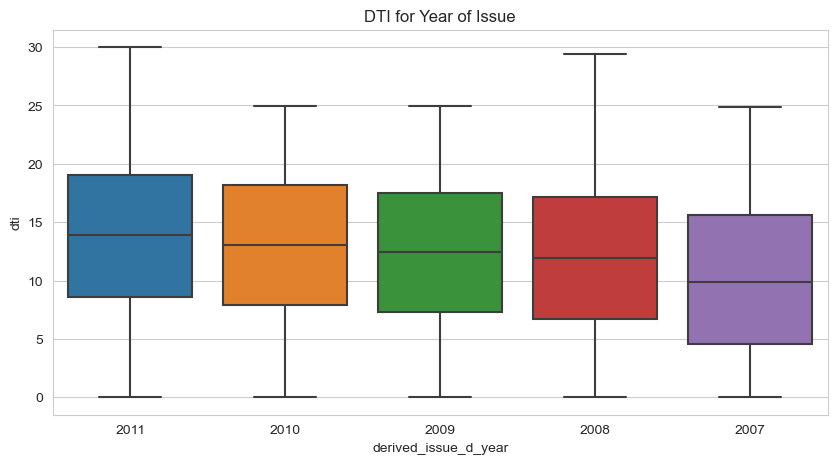

count   mean   std   min   25%    50%    75%    max
derived_issue_d_year                                                        
2007                   251.000 10.311 6.645 0.000 4.600  9.890 15.645 24.850
2008                  1562.000 12.013 6.663 0.000 6.742 11.965 17.195 29.420
2009                  4716.000 12.373 6.585 0.000 7.287 12.480 17.513 24.990
2010                 11532.000 12.949 6.545 0.000 7.940 13.080 18.203 24.990
2011                 20516.000 13.794 6.710 0.000 8.600 13.870 19.050 29.990

In [109]:
# dti for Year of Loan issue
plot_segmented_boxplot('derived_issue_d_year', 'dti', 'DTI for Year of Issue', (10, 5))

Loan issued in 2007 have lower DTI compared to other years and the DTI seems to increase every year.

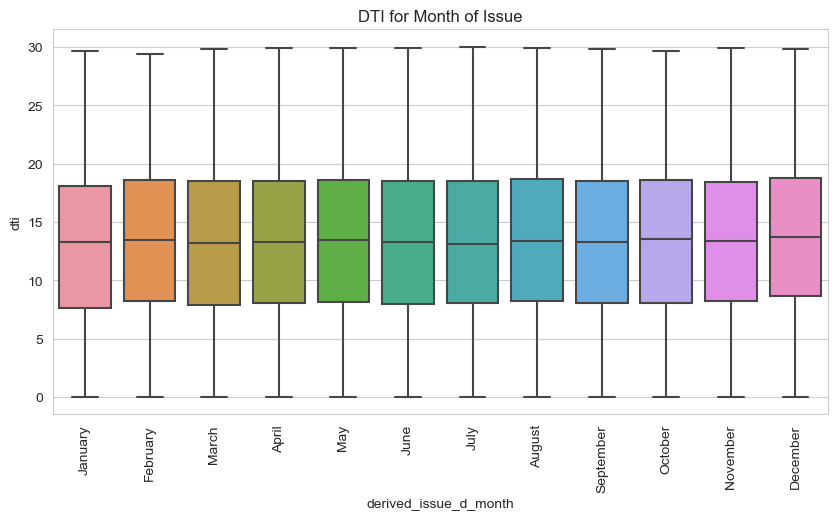

count   mean   std   min   25%    50%    75%    max
derived_issue_d_month                                                       
April                 2831.000 13.178 6.811 0.000 8.010 13.250 18.510 29.930
August                3388.000 13.335 6.690 0.000 8.228 13.375 18.690 29.930
December              4215.000 13.582 6.531 0.000 8.680 13.680 18.755 29.850
February              2358.000 13.392 6.669 0.000 8.252 13.425 18.617 29.350
January               2379.000 12.900 6.654 0.000 7.660 13.300 18.105 29.630
July                  3351.000 13.218 6.740 0.000 8.080 13.100 18.515 29.990
June                  3180.000 13.190 6.746 0.000 7.995 13.250 18.473 29.860
March                 2691.000 13.195 6.737 0.000 7.875 13.200 18.540 29.820
May                   2919.000 13.289 6.618 0.000 8.170 13.440 18.580 29.890
November              4006.000 13.254 6.540 0.000 8.203 13.375 18.450 29.920
October               3761.000 13.325 6.776 0.000 8.090 13.540 18.600 29.640
September             3498.000 13.231 6.624 0.000 8.050 13.255 18.495 29.790

In [110]:
# dti for Month of Loan issue
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plot_segmented_boxplot('derived_issue_d_month', 'dti', 'DTI for Month of Issue', (10, 5), order, 90)

DTI for all the months seems fairly similar with December having a slightly higher DTI and January having a slightly lower DTI.

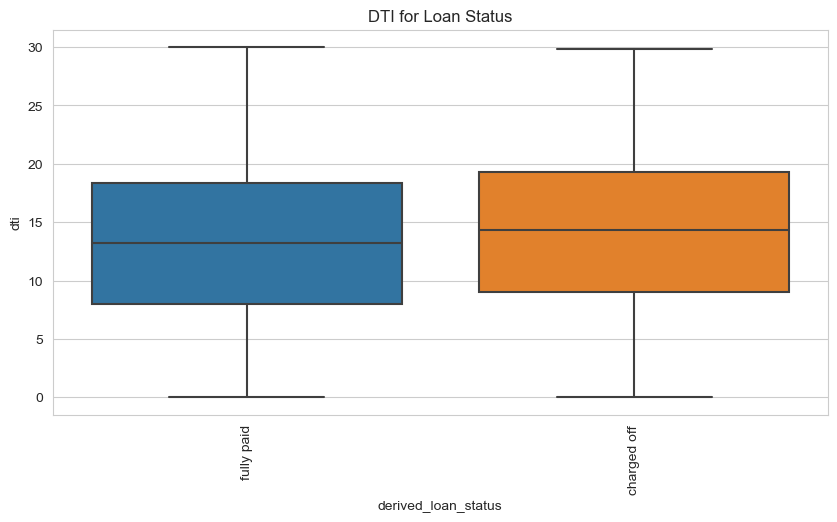

count   mean   std   min   25%    50%    75%    max
derived_loan_status                                                        
charged off          5627.000 14.001 6.586 0.000 9.050 14.290 19.290 29.850
fully paid          32950.000 13.148 6.680 0.000 7.980 13.200 18.390 29.990

In [111]:
# dti for Loan Status

plot_segmented_boxplot('derived_loan_status', 'dti', 'DTI for Loan Status', (10, 5), None, 90)

Loans that have been fully paid seems to have a lower DTI compared to loans that were charged off.

### Interest Rate (int_rate)

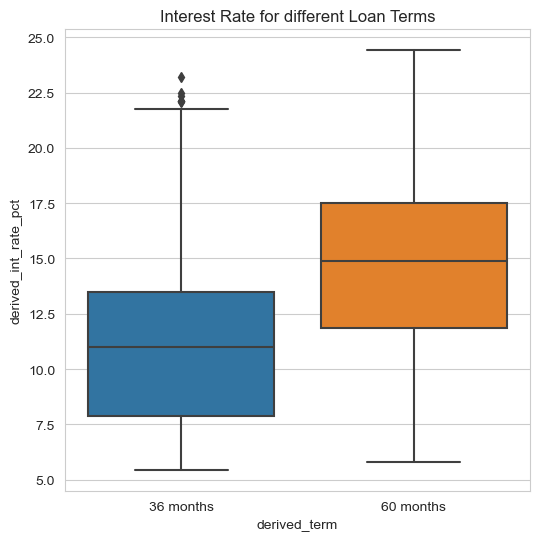

count  mean   std   min    25%    50%    75%    max
derived_term                                                        
36 months    29096.000   inf 3.234 5.422  7.898 10.992 13.469 23.219
60 months     9481.000   inf 3.551 5.789 11.859 14.906 17.484 24.406

In [112]:
# interest rate for different terms

plot_segmented_boxplot('derived_term', 'derived_int_rate_pct', 'Interest Rate for different Loan Terms')

Loans with 60 month term have a higher interest rate.

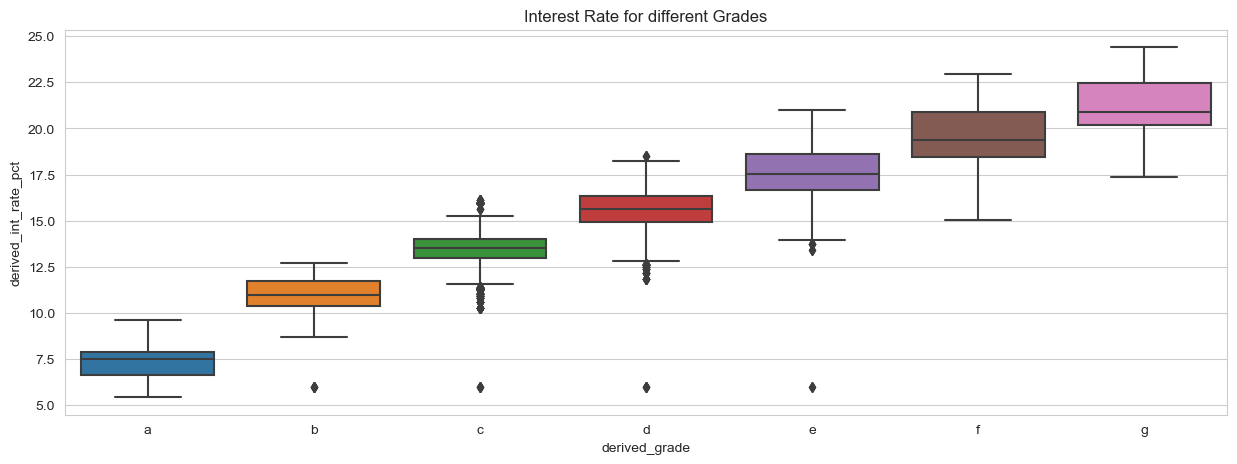

count   mean   std    min    25%    50%    75%    max
derived_grade                                                          
a             10045.000    inf 1.031  5.422  6.621  7.488  7.898  9.633
b             11675.000    inf 0.899  6.000 10.367 10.992 11.711 12.688
c              7834.000    inf 0.937  6.000 12.992 13.492 13.992 16.109
d              5085.000    inf 1.160  6.000 14.906 15.617 16.312 18.484
e              2663.000 17.625 1.354  6.000 16.688 17.516 18.641 20.984
f               976.000 19.641 1.473 15.008 18.438 19.359 20.891 22.938
g               299.000 21.312 1.308 17.344 20.164 20.906 22.484 24.406

In [113]:
# interest rate for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'derived_int_rate_pct', 'Interest Rate for different Grades', (15, 5), order)

Loans with a grade G has the highest interest rate and it decreases for every grade from ```f``` to ```a```.

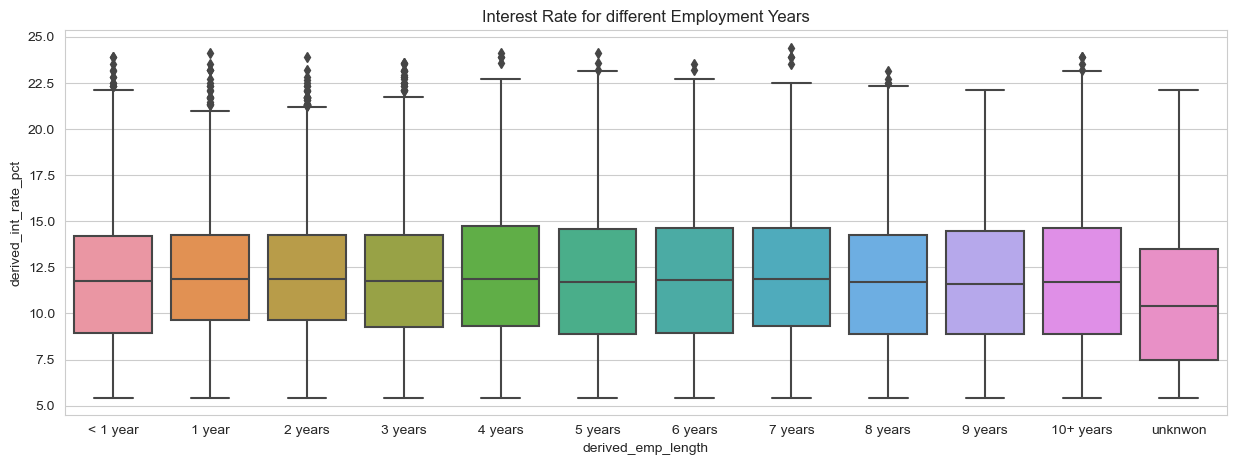

count   mean   std   min   25%    50%    75%    max
derived_emp_length                                                       
1 year             3169.000 12.000 3.461 5.422 9.633 11.891 14.273 24.109
10+ years          8488.000    inf 3.883 5.422 8.883 11.711 14.609 23.906
2 years            4291.000 12.000 3.512 5.422 9.633 11.859 14.273 23.906
3 years            4012.000 11.953 3.609 5.422 9.250 11.781 14.273 23.594
4 years            3342.000 12.086 3.701 5.422 9.320 11.891 14.719 24.109
5 years            3194.000 11.961 3.736 5.422 8.898 11.711 14.594 24.109
6 years            2168.000 11.961 3.756 5.422 8.928 11.828 14.619 23.516
7 years            1711.000 12.094 3.789 5.422 9.320 11.859 14.648 24.406
8 years            1435.000 11.805 3.754 5.422 8.883 11.711 14.273 23.125
9 years            1226.000 11.836 3.689 5.422 8.883 11.578 14.461 22.109
< 1 year           4508.000 11.852 3.516 5.422 8.938 11.750 14.219 23.906
unknwon            1033.000 10.805 3.814 5.422 7.488 10.383 13.492 22.109

In [114]:
# interest rate for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'derived_int_rate_pct', 'Interest Rate for different Employment Years', (15, 5), order)

Interest rate is almost very similar for all years of employment.

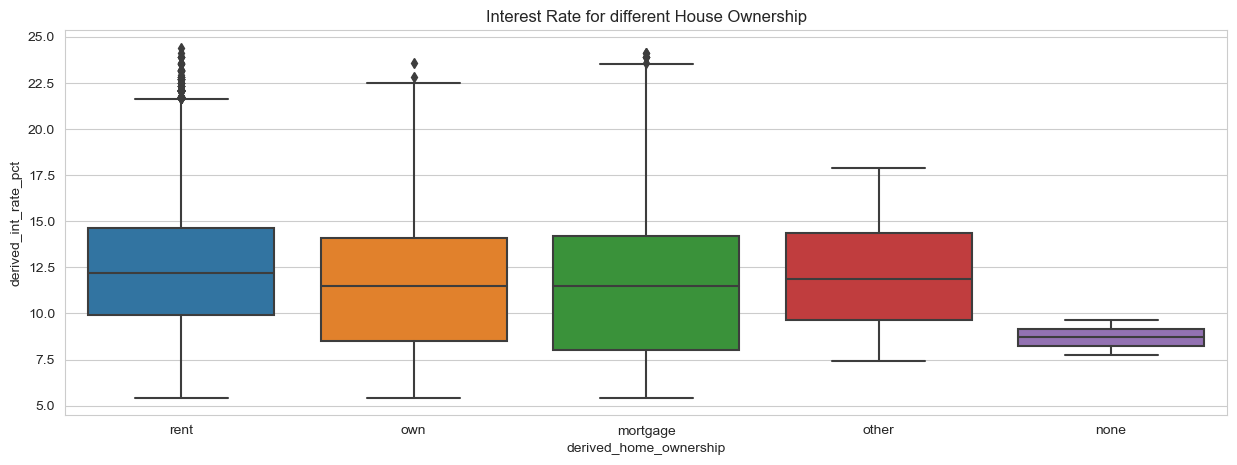

count   mean   std   min   25%    50%    75%    max
derived_home_ownership                                                        
mortgage               17021.000    inf 3.844 5.422 8.000 11.492 14.219 24.109
none                       3.000  8.695 0.945 7.750 8.227  8.703  9.172  9.641
other                     98.000 12.039 2.652 7.398 9.650 11.859 14.381 17.906
own                     2975.000 11.688 3.691 5.422 8.492 11.492 14.109 23.594
rent                   18480.000    inf 3.527 5.422 9.906 12.180 14.609 24.406

In [115]:
# interest rate for different house ownership

plot_segmented_boxplot('derived_home_ownership', 'derived_int_rate_pct', 'Interest Rate for different House Ownership', (15, 5))

Interest Rate for any type of home ownership is almost similar.

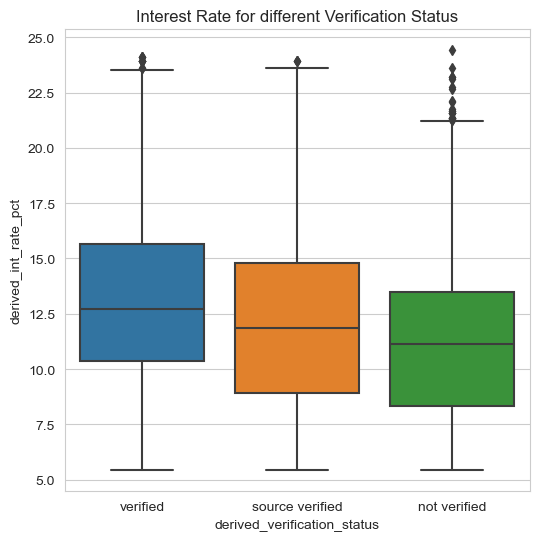

count  mean   std   min    25%    50%    75%  \
derived_verification_status                                                    
not verified                16694.000   inf 3.238 5.422  8.320 11.117 13.492   
source verified              9677.000   inf 3.842 5.422  8.898 11.859 14.789   
verified                    12206.000   inf 3.906 5.422 10.359 12.719 15.648   

                               max  
derived_verification_status         
not verified                24.406  
source verified             23.906  
verified                    24.109

In [116]:
# interest rate for verification status

plot_segmented_boxplot('derived_verification_status', 'derived_int_rate_pct', 'Interest Rate for different Verification Status')

Verified loans seems to have higher interest rates than others.

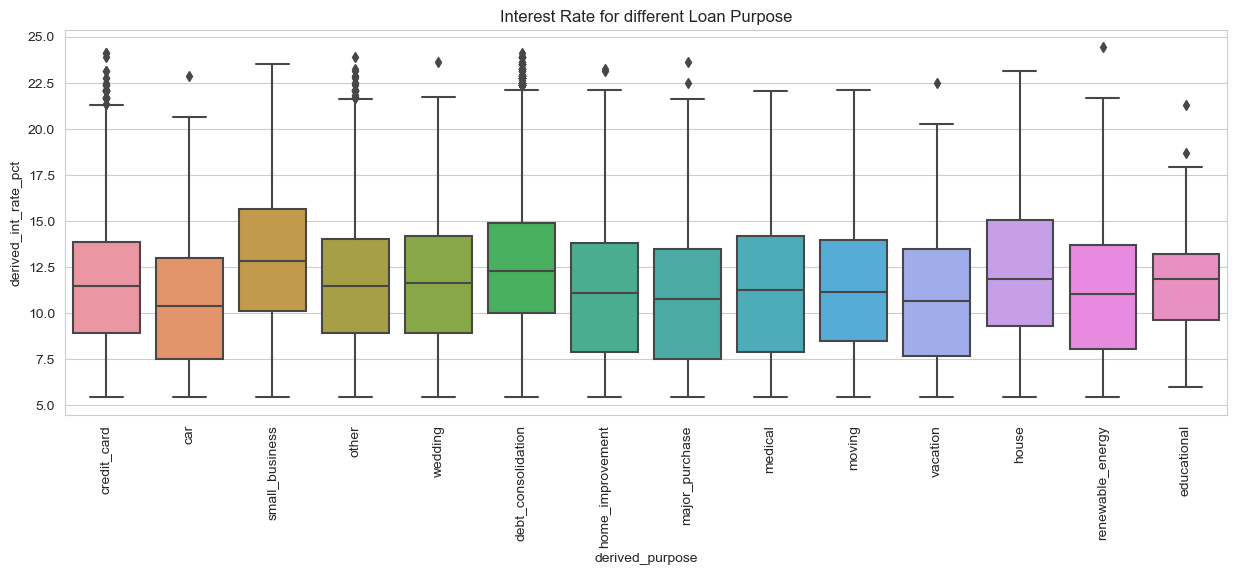

count   mean   std   min    25%    50%    75%    max
derived_purpose                                                            
car                 1499.000 10.461 3.385 5.422  7.512 10.367 12.992 22.844
credit_card         5027.000 11.625 3.518 5.422  8.898 11.492 13.852 24.109
debt_consolidation 18055.000    inf 3.705 5.422  9.992 12.289 14.906 24.109
educational          325.000 11.648 2.545 6.000  9.633 11.828 13.219 21.266
home_improvement    2875.000 11.281 3.738 5.422  7.879 11.109 13.797 23.219
house                367.000 12.164 3.965 5.422  9.285 11.828 15.047 23.125
major_purchase      2150.000 10.797 3.592 5.422  7.512 10.742 13.492 23.594
medical              681.000 11.430 3.650 5.422  7.898 11.258 14.172 22.062
moving               576.000 11.531 3.527 5.422  8.492 11.117 13.977 22.109
other               3865.000 11.719 3.518 5.422  8.898 11.492 13.992 23.906
renewable_energy     102.000 11.438 3.854 5.422  8.047 11.051 13.691 24.406
small_business      1754.000 12.898 3.914 5.422 10.109 12.844 15.648 23.516
vacation             375.000 10.828 3.500 5.422  7.660 10.648 13.449 22.484
wedding              926.000 11.781 3.512 5.422  8.938 11.617 14.172 23.594

In [117]:
# interest rate for different loan purpose

plot_segmented_boxplot('derived_purpose', 'derived_int_rate_pct', 'Interest Rate for different Loan Purpose', (15, 5), None, 90)

Interest Rate of loans for small business, debt consolidation and house seems to be higher compared to other purposes.

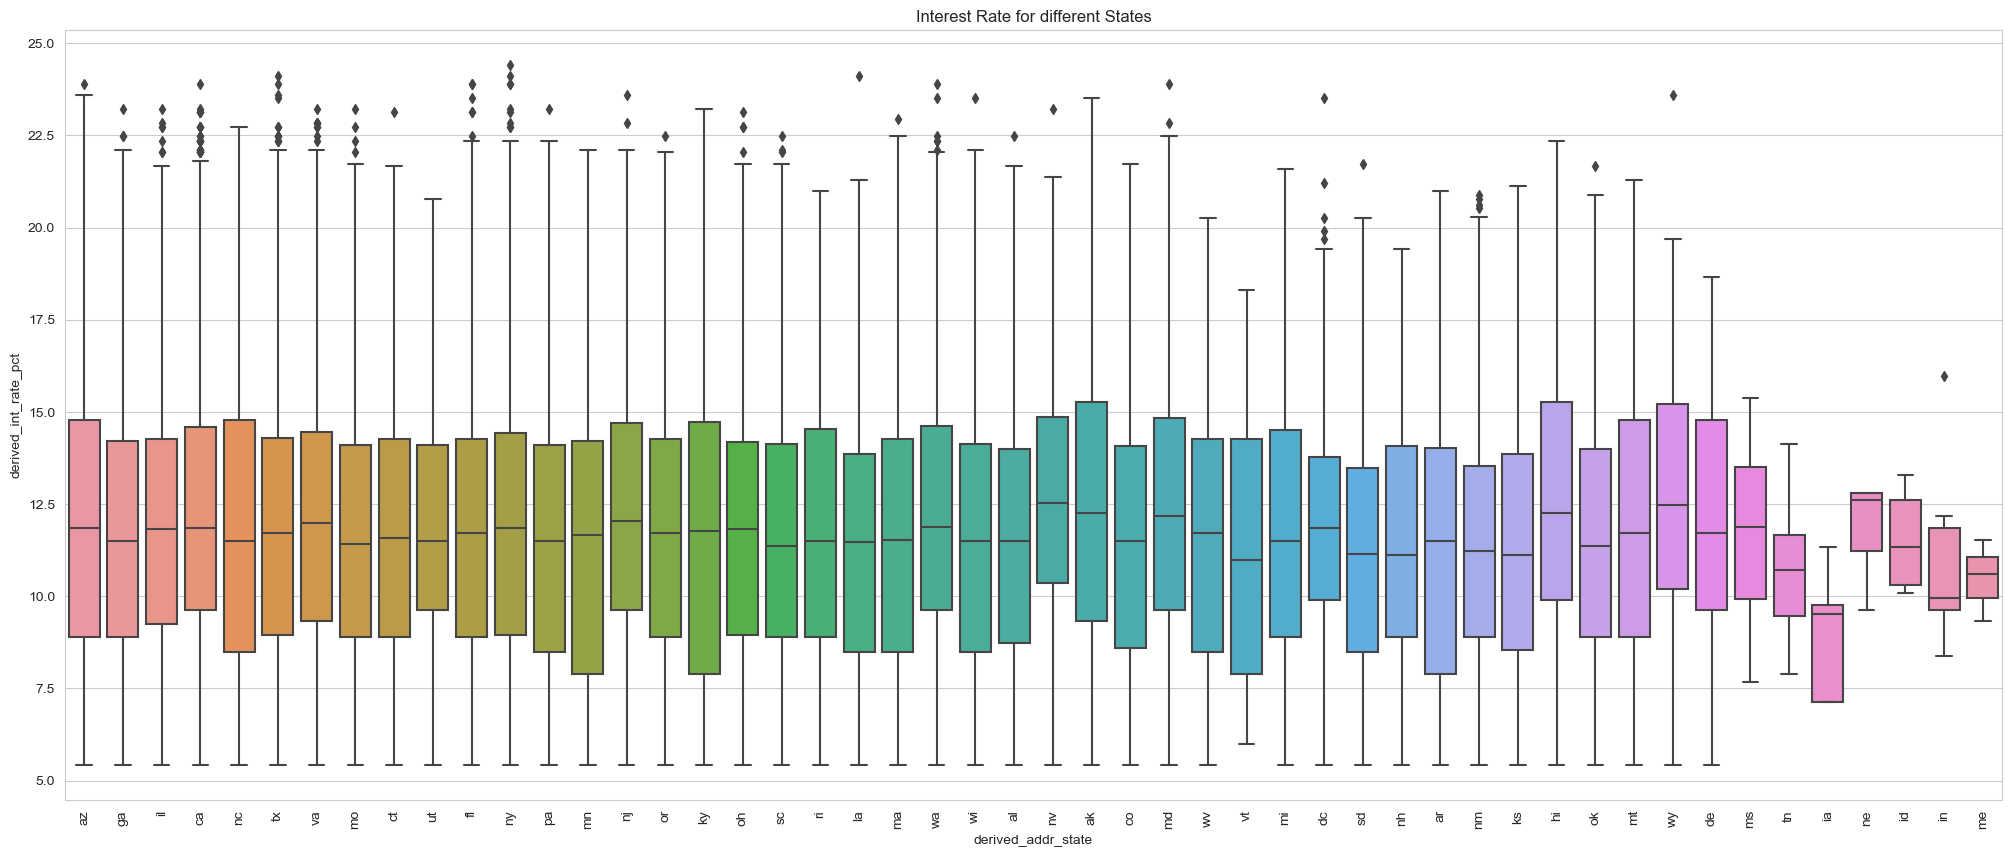

In [118]:
# interest rate for different states

plot_segmented_boxplot('derived_addr_state', 'derived_int_rate_pct', 'Interest Rate for different States', (25, 10), None, 90, False)

- Interest rates in Alaska (AK), Hawaii (HI) and Wyoming (WY) are the highest.
- Interest rates seems to be lowest in Iowa (IA).

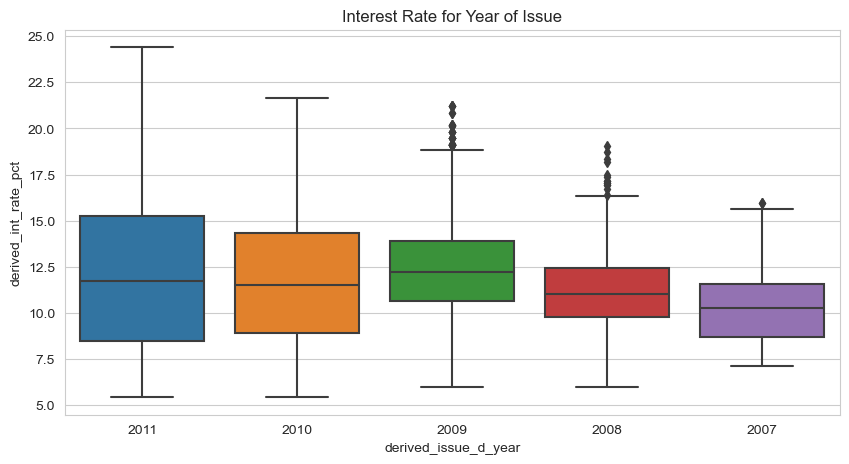

count   mean   std   min    25%    50%    75%    max
derived_issue_d_year                                                         
2007                   251.000 10.320 2.043 7.121  8.703 10.281 11.539 15.961
2008                  1562.000 11.156 2.059 6.000  9.758 11.031 12.406 19.047
2009                  4716.000 12.188 2.576 6.000 10.623 12.211 13.922 21.203
2010                 11532.000    inf 3.434 5.422  8.883 11.492 14.352 21.641
2011                 20516.000    inf 4.121 5.422  8.492 11.711 15.227 24.406

In [119]:
# interest rate for Year of Loan issue
plot_segmented_boxplot('derived_issue_d_year', 'derived_int_rate_pct', 'Interest Rate for Year of Issue', (10, 5))

The interest rates have increased consistently throughout the years.

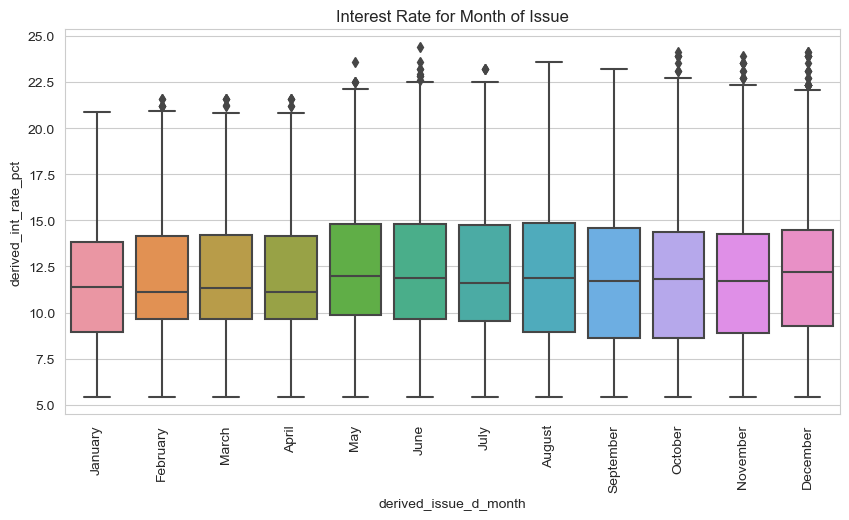

count   mean   std   min   25%    50%    75%    max
derived_issue_d_month                                                       
April                 2831.000 11.703 3.289 5.422 9.633 11.109 14.172 21.594
August                3388.000 12.188 3.752 5.422 8.938 11.859 14.844 23.594
December              4215.000 12.125 3.871 5.422 9.250 12.227 14.461 24.109
February              2358.000 11.688 3.465 5.422 9.633 11.109 14.172 21.594
January               2379.000 11.430 3.361 5.422 8.938 11.406 13.852 20.859
July                  3351.000 12.078 3.666 5.422 9.543 11.578 14.742 23.219
June                  3180.000 12.164 3.783 5.422 9.633 11.859 14.789 24.406
March                 2691.000 11.828 3.453 5.422 9.633 11.344 14.219 21.594
May                   2919.000 12.188 3.654 5.422 9.883 11.992 14.789 23.594
November              4006.000 11.781 3.857 5.422 8.883 11.711 14.273 23.906
October               3761.000 11.867 3.895 5.422 8.594 11.828 14.352 24.109
September             3498.000 11.891 3.738 5.422 8.594 11.711 14.609 23.219

In [120]:
# interest rate for Month of Loan issue
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plot_segmented_boxplot('derived_issue_d_month', 'derived_int_rate_pct', 'Interest Rate for Month of Issue', (10, 5), order, 90)

Interest Rate for all the months seems nearly similar.

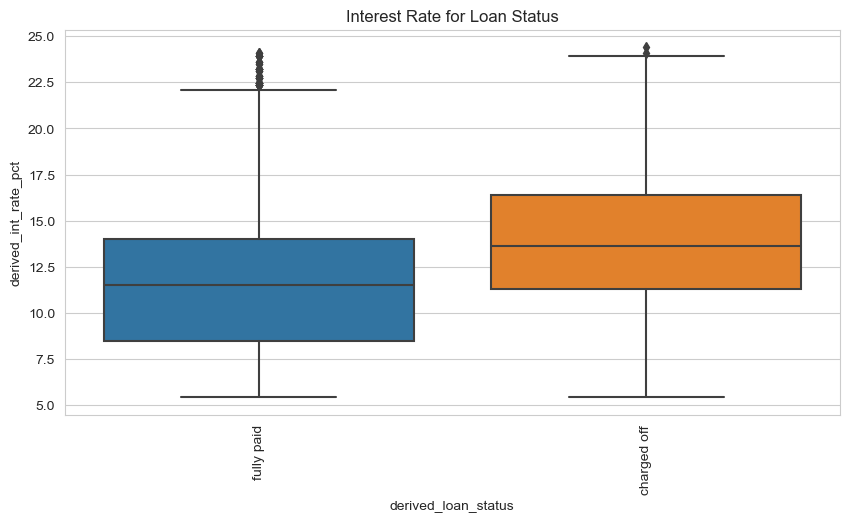

count  mean   std   min    25%    50%    75%    max
derived_loan_status                                                        
charged off          5627.000   inf 3.654 5.422 11.312 13.609 16.406 24.406
fully paid          32950.000   inf 3.600 5.422  8.492 11.492 13.992 24.109

In [121]:
# Interest rate for Loan Status

plot_segmented_boxplot('derived_loan_status', 'derived_int_rate_pct', 'Interest Rate for Loan Status', (10, 5), None, 90)

Loans that have been fully paid seems to have a lower interest rate compared to loans that were charged off.

### Revolving line utilization rate (revol_util)

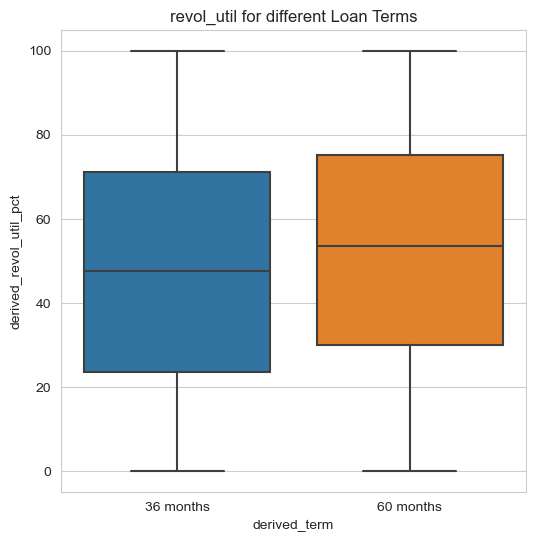

count  mean    std   min    25%    50%    75%    max
derived_term                                                         
36 months    29096.000   inf 28.547 0.000 23.703 47.594 71.188 99.875
60 months     9481.000   inf 27.688 0.000 30.094 53.688 75.188 99.875

In [122]:
# revol_util rate for different terms

plot_segmented_boxplot('derived_term', 'derived_revol_util_pct', 'revol_util for different Loan Terms')

Loans with 60 month term have a higher revolving utilization rate.

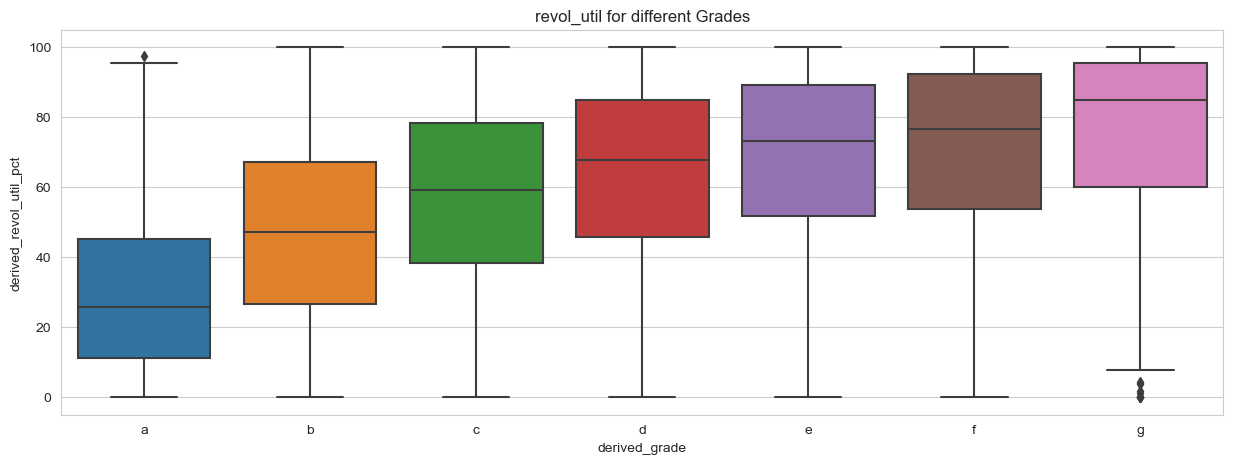

count   mean    std   min    25%    50%    75%    max
derived_grade                                                          
a             10045.000    inf 22.234 0.000 11.203 25.797 45.188 97.500
b             11675.000    inf 25.891 0.000 26.500 47.188 67.000 99.875
c              7834.000    inf 26.281 0.000 38.188 59.188 78.312 99.875
d              5085.000    inf 26.516 0.000 45.594 67.625 84.812 99.875
e              2663.000    inf 25.688 0.000 51.594 73.000 89.125 99.875
f               976.000    inf 26.891 0.000 53.570 76.438 92.375 99.875
g               299.000 74.750 25.828 0.000 60.000 84.688 95.312 99.875

In [123]:
# revol_util rate for different grades
order = sorted(loan['derived_grade'].unique())
plot_segmented_boxplot('derived_grade', 'derived_revol_util_pct', 'revol_util for different Grades', (15, 5), order)

Loans with a grade G has the highest revolving utilization rate and it decreases for every grade from ```f``` to ```a```.

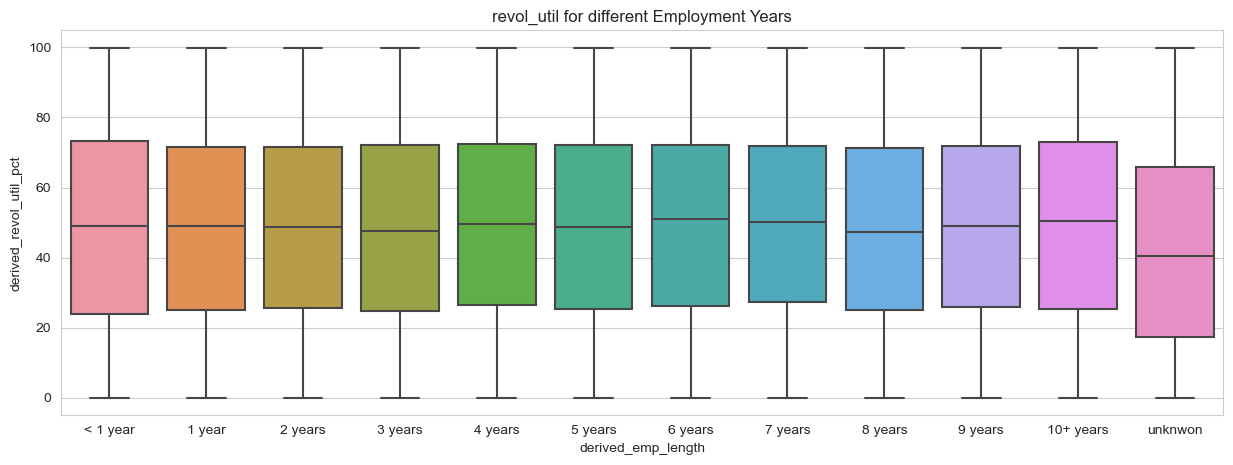

count   mean    std   min    25%    50%    75%    max
derived_emp_length                                                         
1 year             3169.000    inf 28.344 0.000 25.000 49.000 71.688 99.875
10+ years          8488.000    inf 28.516 0.000 25.273 50.406 73.141 99.875
2 years            4291.000    inf 28.250 0.000 25.500 48.812 71.500 99.875
3 years            4012.000    inf 28.516 0.000 24.797 47.688 72.125 99.875
4 years            3342.000    inf 28.344 0.000 26.406 49.500 72.500 99.875
5 years            3194.000    inf 28.031 0.000 25.203 48.688 72.125 99.875
6 years            2168.000    inf 27.938 0.000 26.273 51.047 72.141 99.875
7 years            1711.000    inf 27.594 0.000 27.297 50.094 72.000 99.812
8 years            1435.000    inf 27.969 0.000 25.148 47.406 71.312 99.875
9 years            1226.000 48.656 28.094 0.000 26.000 48.906 72.000 99.875
< 1 year           4508.000    inf 29.062 0.000 23.906 48.906 73.219 99.875
unknwon            1033.000 42.781 28.672 0.000 17.406 40.500 65.875 99.875

In [124]:
# revol_util rate for years of employment
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years', 'unknwon']
plot_segmented_boxplot('derived_emp_length', 'derived_revol_util_pct', 'revol_util for different Employment Years', (15, 5), order)

Revolving utilization rates are almost very similar for all years of employment.

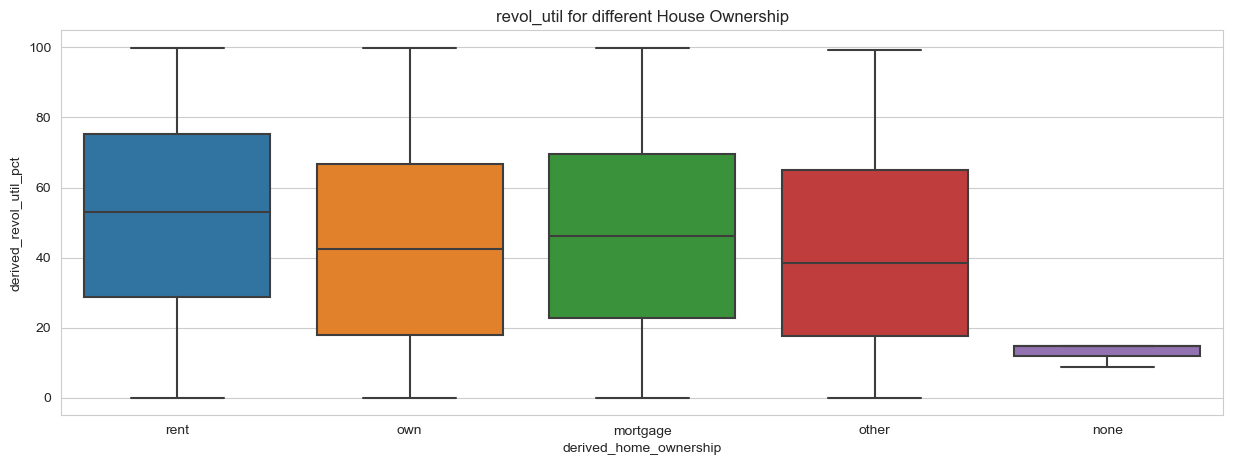

count   mean    std   min    25%    50%    75%  \
derived_home_ownership                                                      
mortgage               17021.000    inf 28.172 0.000 22.703 46.188 69.625   
none                       3.000 12.836  3.578 8.703 11.801 14.898 14.898   
other                     98.000 42.406 30.391 0.000 17.504 38.500 64.867   
own                     2975.000    inf 28.953 0.000 17.906 42.594 66.688   
rent                   18480.000    inf 28.203 0.000 28.797 53.094 75.219   

                          max  
derived_home_ownership         
mortgage               99.875  
none                   14.898  
other                  99.125  
own                    99.875  
rent                   99.875

In [125]:
# revol_util rate for different house ownership

plot_segmented_boxplot('derived_home_ownership', 'derived_revol_util_pct', 'revol_util for different House Ownership', (15, 5))

Revolving utilization rate for borrowers with a rented house is higher than others.

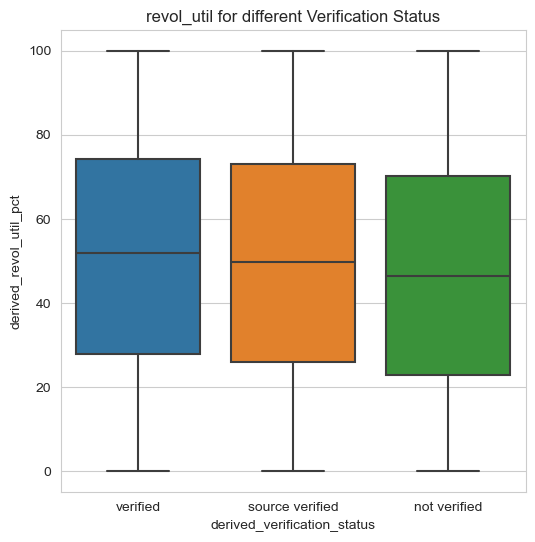

count  mean    std   min    25%    50%    75%  \
derived_verification_status                                                     
not verified                16694.000   inf 28.484 0.000 22.797 46.500 70.125   
source verified              9677.000   inf 28.438 0.000 26.094 49.812 73.188   
verified                    12206.000   inf 28.078 0.000 28.000 52.000 74.375   

                               max  
derived_verification_status         
not verified                99.875  
source verified             99.875  
verified                    99.875

In [126]:
# revol_util for verification status

plot_segmented_boxplot('derived_verification_status', 'derived_revol_util_pct', 'revol_util for different Verification Status')

Verified loans seems to have higher revolving utilization rates than others.

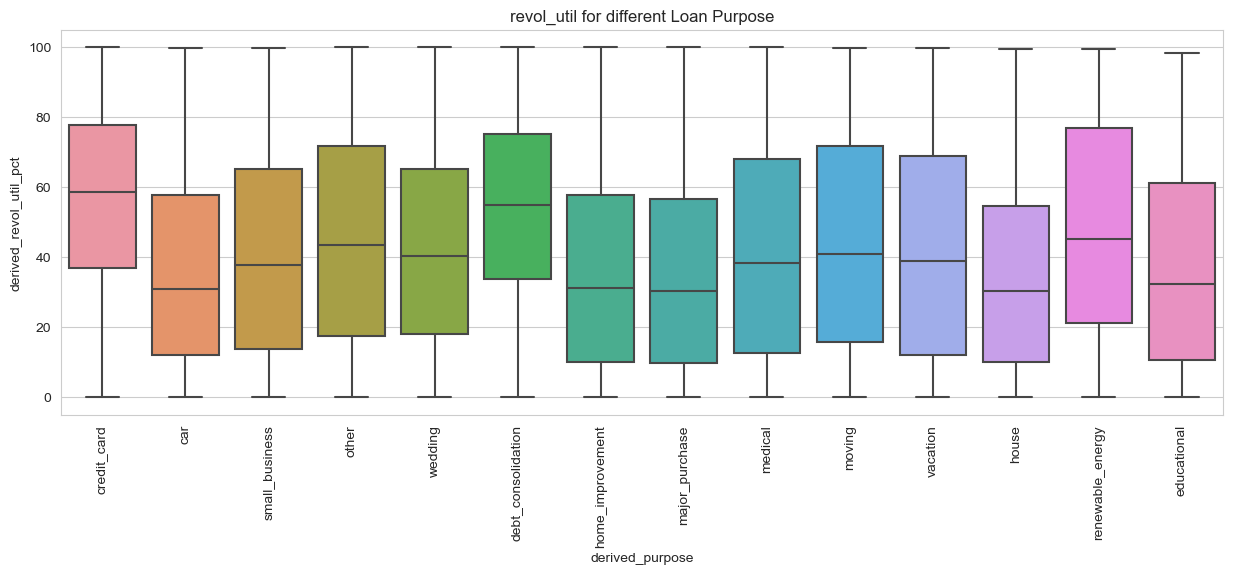

count   mean    std   min    25%    50%    75%    max
derived_purpose                                                             
car                 1499.000 36.344 27.531 0.000 12.000 30.906 57.906 99.688
credit_card         5027.000    inf 25.609 0.000 36.812 58.500 77.625 99.875
debt_consolidation 18055.000    inf 26.141 0.000 33.688 55.000 75.312 99.875
educational          325.000 38.312 30.062 0.000 10.703 32.312 61.312 98.375
home_improvement    2875.000    inf 28.516 0.000 10.152 31.203 57.688 99.875
house                367.000 35.125 28.031 0.000 10.152 30.500 54.641 99.375
major_purchase      2150.000    inf 28.422 0.000  9.898 30.500 56.500 99.875
medical              681.000 42.000 30.859 0.000 12.797 38.406 68.188 99.875
moving               576.000 44.406 31.344 0.000 15.873 41.047 71.812 99.812
other               3865.000    inf 30.344 0.000 17.594 43.500 71.688 99.875
renewable_energy     102.000 47.125 30.641 0.000 21.277 45.297 76.859 99.312
small_business      1754.000    inf 29.594 0.000 13.752 37.906 65.281 99.812
vacation             375.000 41.938 30.891 0.000 12.250 38.812 68.875 99.812
wedding              926.000 42.406 28.344 0.000 18.227 40.453 65.281 99.875

In [127]:
# revol_util for different loan purpose

plot_segmented_boxplot('derived_purpose', 'derived_revol_util_pct', 'revol_util for different Loan Purpose', (15, 5), None, 90)

- Revolving utilization rate of loans for credit card and renewable energy seems to be higher compared to other purposes.
- Loans on house have a lower revolving utilization rate.

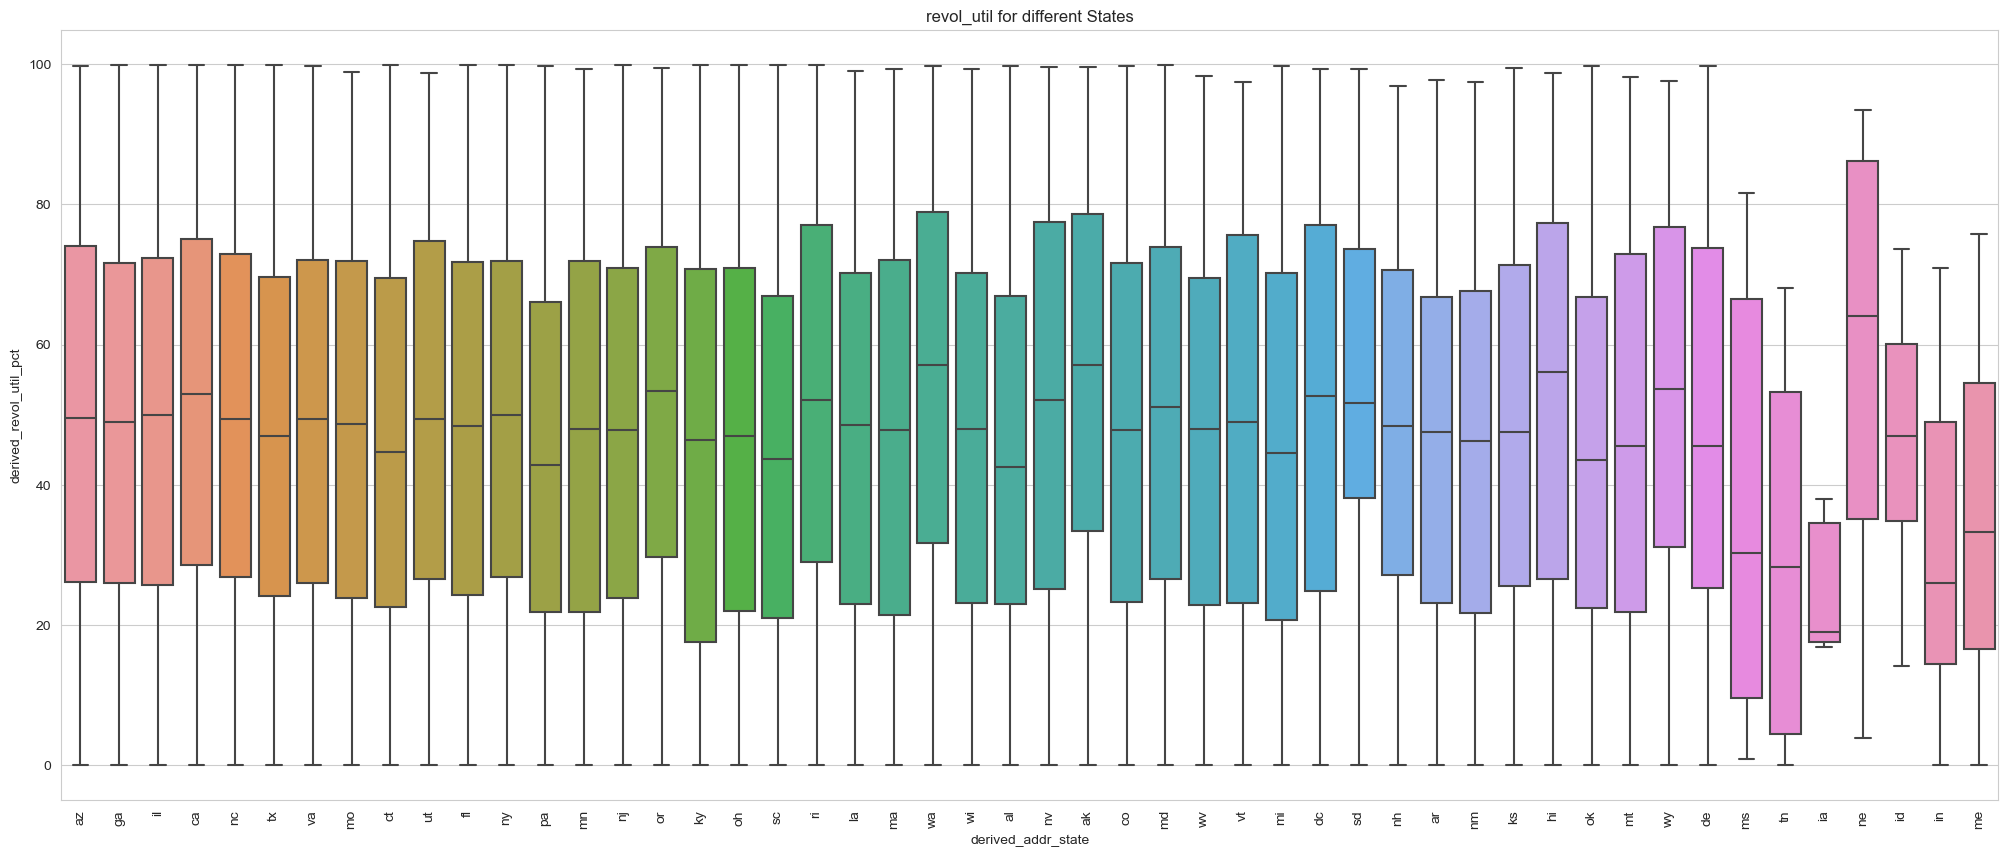

In [128]:
# revol_util for different states

plot_segmented_boxplot('derived_addr_state', 'derived_revol_util_pct', 'revol_util for different States', (25, 10), None, 90, False)

- Revolving utilization rate are the highest in Nebraska (NE).
- Revolving utilization rate seems to be lowest in Iowa (IA).

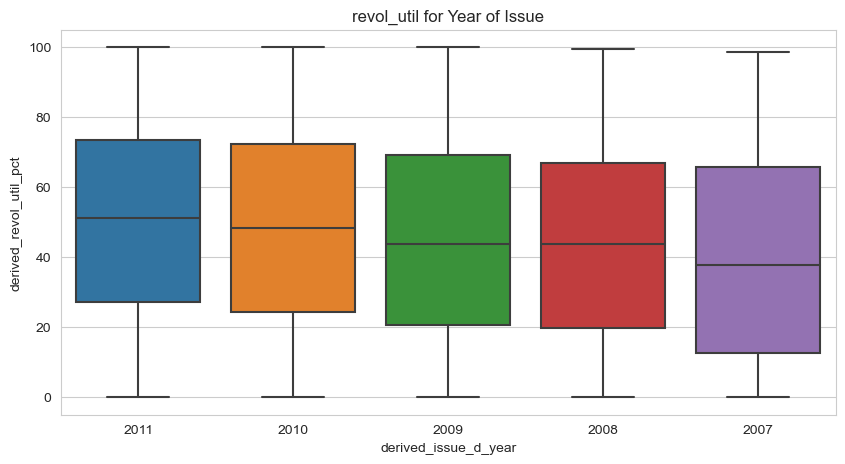

count   mean    std   min    25%    50%    75%    max
derived_issue_d_year                                                          
2007                   251.000 40.000 29.797 0.000 12.652 37.594 65.750 98.625
2008                  1562.000    inf 28.859 0.000 19.824 43.594 66.781 99.375
2009                  4716.000    inf 29.031 0.000 20.594 43.812 69.141 99.812
2010                 11532.000    inf 28.469 0.000 24.297 48.406 72.125 99.875
2011                 20516.000    inf 28.031 0.000 27.203 51.188 73.312 99.875

In [129]:
# revol_util for Year of Loan issue
plot_segmented_boxplot('derived_issue_d_year', 'derived_revol_util_pct', 'revol_util for Year of Issue', (10, 5))

The revolving utilization rates have increased consistently throughout the years from 2007 to 2011.

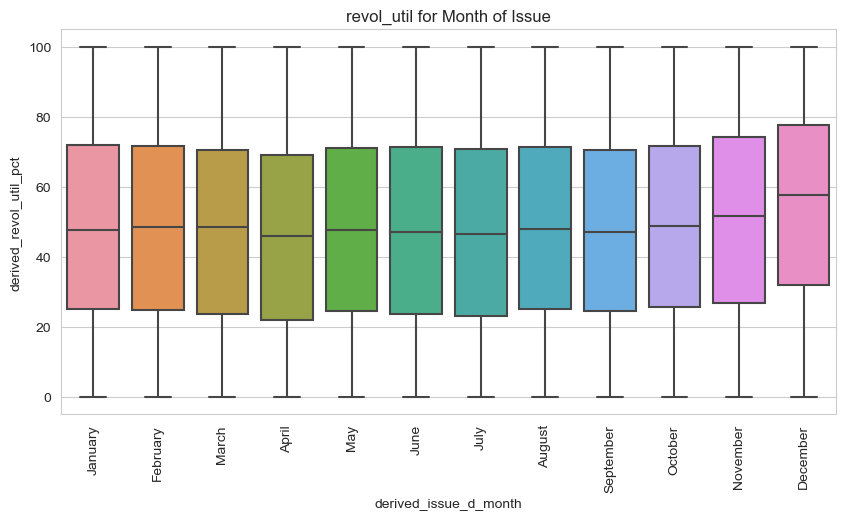

count  mean    std   min    25%    50%    75%    max
derived_issue_d_month                                                        
April                 2831.000   inf 28.484 0.000 21.914 45.812 69.188 99.812
August                3388.000   inf 28.281 0.000 25.000 47.953 71.312 99.875
December              4215.000   inf 28.156 0.000 31.852 57.500 77.688 99.875
February              2358.000   inf 28.047 0.000 24.703 48.453 71.625 99.875
January               2379.000   inf 28.531 0.000 25.000 47.594 71.875 99.875
July                  3351.000   inf 28.562 0.000 23.000 46.500 70.688 99.875
June                  3180.000   inf 28.656 0.000 23.570 47.188 71.219 99.875
March                 2691.000   inf 28.516 0.000 23.750 48.500 70.375 99.875
May                   2919.000   inf 28.234 0.000 24.500 47.688 71.125 99.875
November              4006.000   inf 28.500 0.000 26.703 51.547 74.125 99.875
October               3761.000   inf 28.031 0.000 25.703 48.688 71.688 99.875
September             3498.000   inf 28.000 0.000 24.406 47.047 70.500 99.875

In [130]:
# revol_util rate for Month of Loan issue
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

plot_segmented_boxplot('derived_issue_d_month', 'derived_revol_util_pct', 'revol_util for Month of Issue', (10, 5), order, 90)

Revolving utilization rate for all the months seems fairly similar but increases for December.

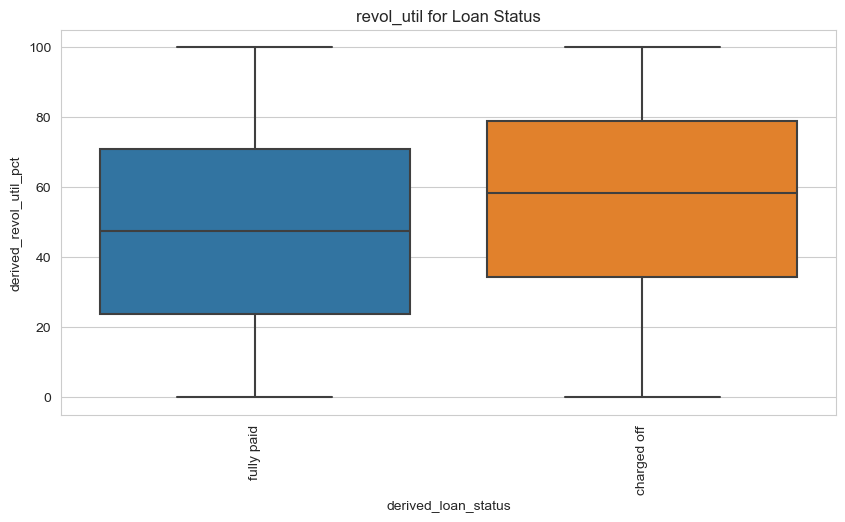

count  mean    std   min    25%    50%    75%    max
derived_loan_status                                                         
charged off          5627.000   inf 28.016 0.000 34.312 58.188 78.938 99.875
fully paid          32950.000   inf 28.297 0.000 23.797 47.500 70.812 99.875

In [131]:
# revol_util for Loan Status

plot_segmented_boxplot('derived_loan_status', 'derived_revol_util_pct', 'revol_util for Loan Status', (10, 5), None, 90)

Borrowers with a lower revolving utilization rates have fully paid the loans compared to borrowers with higher revolving utilization rates.

### Loan Status

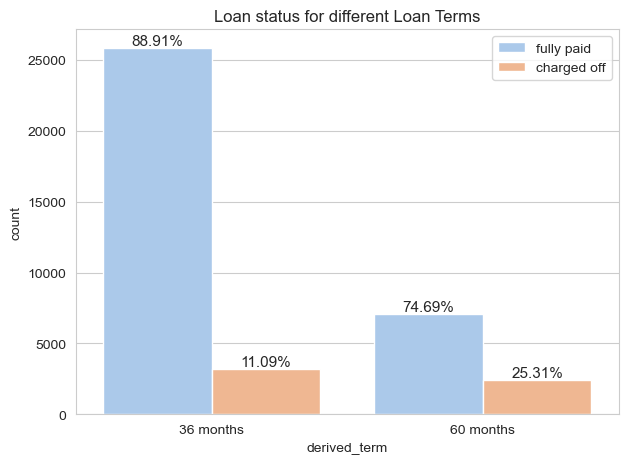

In [132]:
# loan_status for loan term
segmented_countplot(loan, 'derived_term', 'derived_loan_status', 'Loan status for different Loan Terms')

Borrowers who had chosen 60 months term tend to be defaulters (25.3%) more compared to borrowers who choose 36 months term (11.1%).

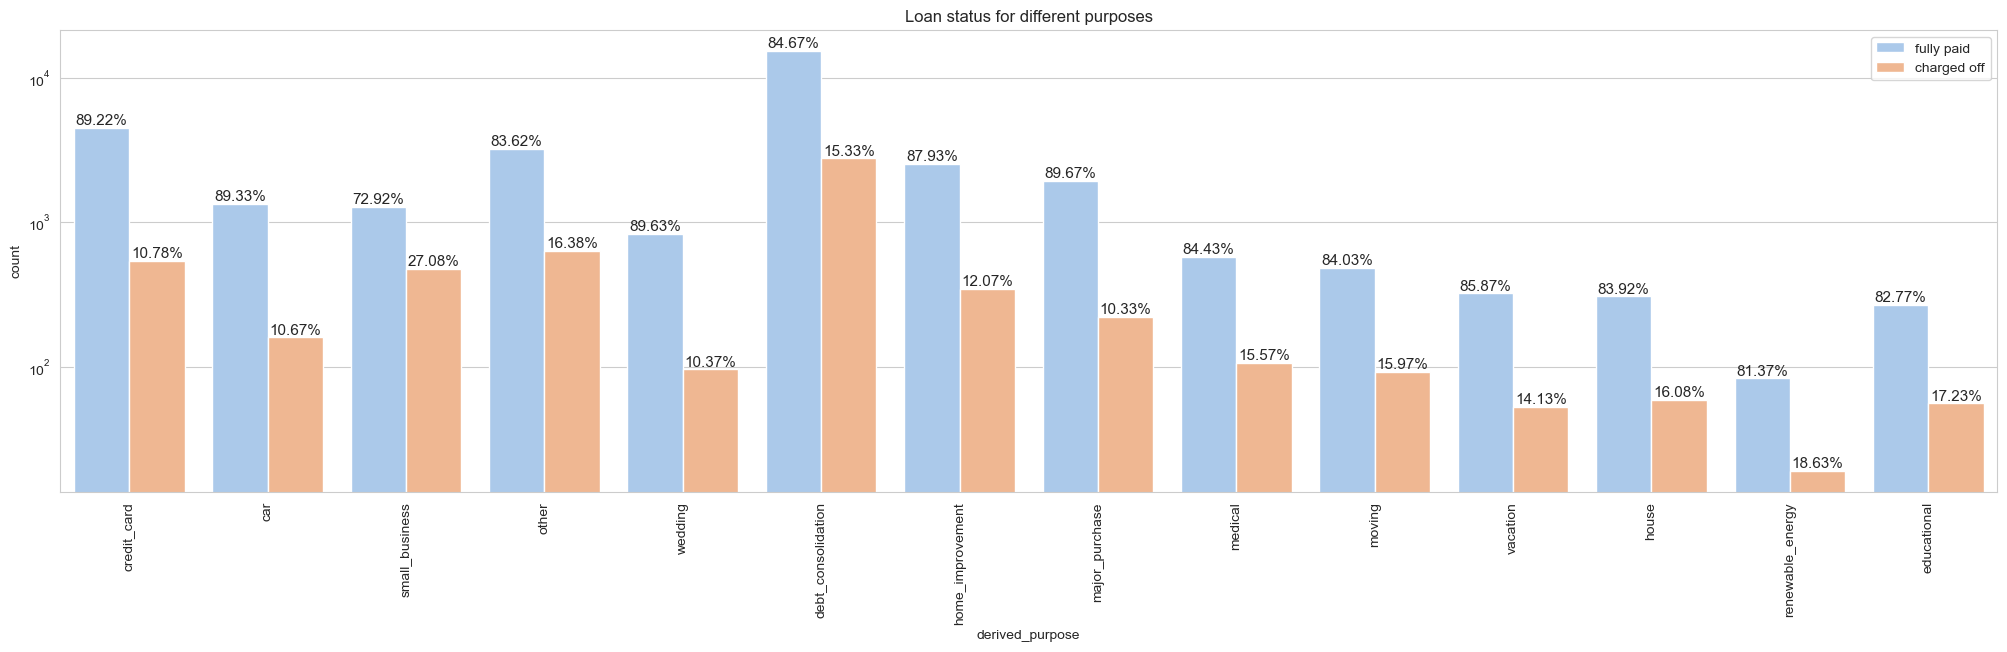

In [133]:
# loan_status for purpose
segmented_countplot(loan, 'derived_purpose', 'derived_loan_status', 'Loan status for different purposes', (25, 6), scale=True, xtick_rot=90)

- Loans for major purchase were mostly paid back, followed very closely by loans for wedding, car and credit card.
- Loans for small business are mostly charged off.

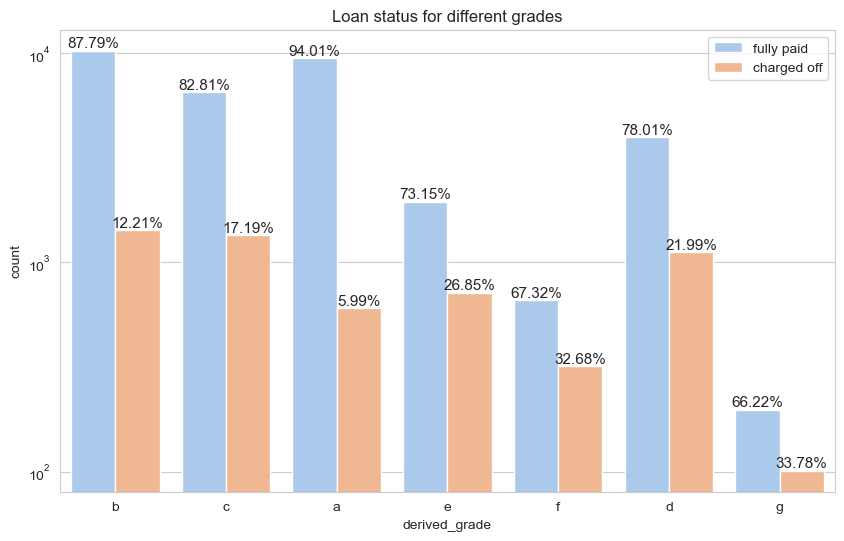

In [134]:
# loan_status for derived_grade
segmented_countplot(loan, 'derived_grade', 'derived_loan_status', 'Loan status for different grades', (10, 6), scale=True)

- Loans with grade ```a``` are the most fully paid loans.
- Almost 33.8% of grade ```g``` loans are charged off (highest), closely followed by grade ```f```.

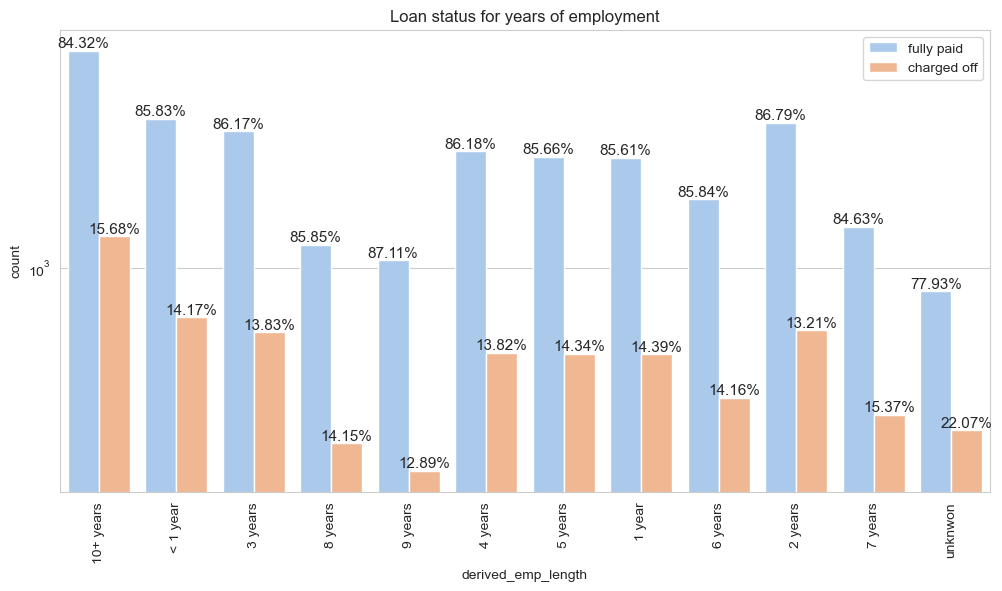

In [135]:
# loan_status for derived_emp_length
segmented_countplot(loan, 'derived_emp_length', 'derived_loan_status', 'Loan status for years of employment', (12, 6), scale=True, xtick_rot=90)

Charged off loans are less for borrowers with 9 years of employment.

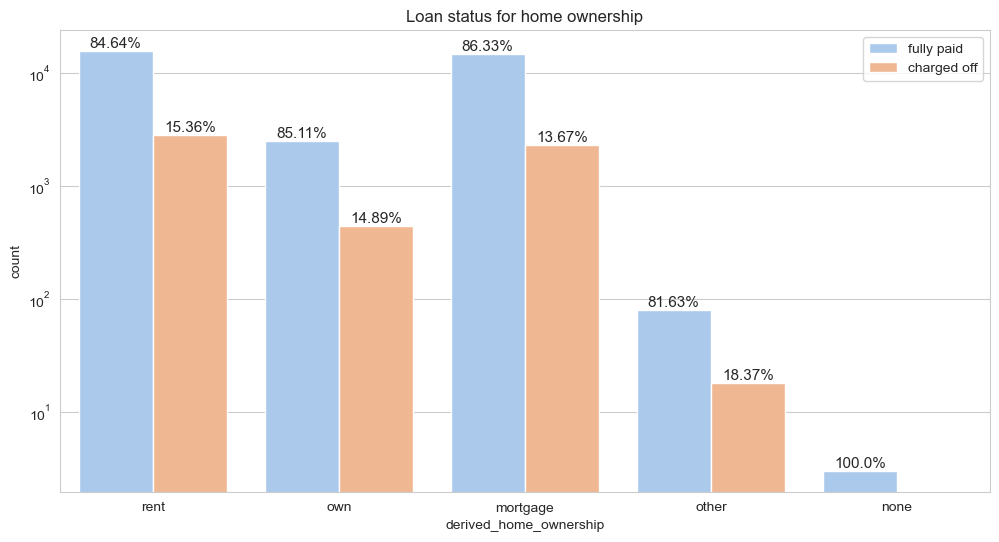

In [136]:
# loan_status for derived_home_ownership
segmented_countplot(loan, 'derived_home_ownership', 'derived_loan_status', 'Loan status for home ownership', (12, 6), scale=True)

- Borrowers with a ```mortgage``` tend to have the lowest charged off loans.

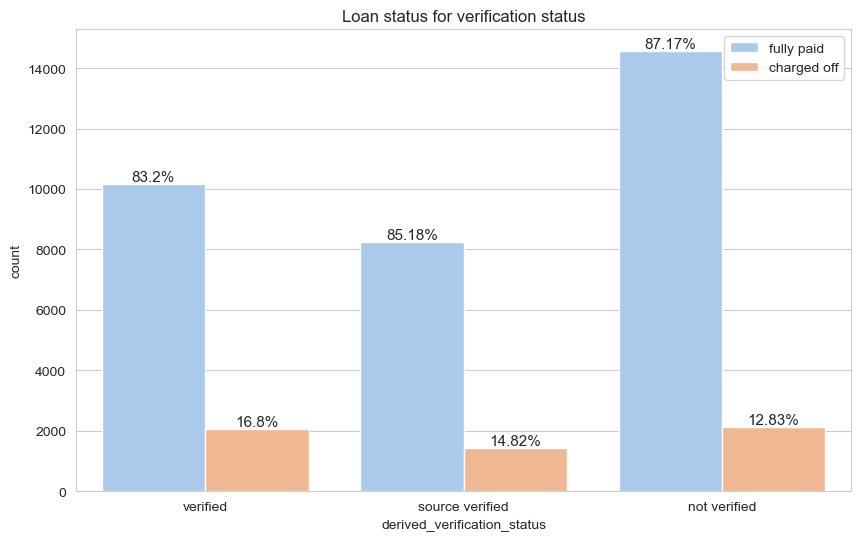

In [137]:
# loan_status for derived_verification_status
segmented_countplot(loan, 'derived_verification_status', 'derived_loan_status', 'Loan status for verification status', (10, 6))

- Loans that were not verified have a higher percent of fully paid loans.

# Bivariate Analysis

## Preps

In [138]:
loan['derived_earliest_cr_line_year'] = loan['derived_earliest_cr_line_year'].astype(str)
loan['derived_issue_d_year'] = loan['derived_issue_d_year'].astype(str)
loan['derived_installment_to_monthly_salary_ratio'] = loan['installment']/(loan['annual_inc']/12)

#target variable used to color the scatterplot
loan['derived_loan_status_bin']= loan['derived_loan_status'].apply(lambda x: 1 if x=='charged off' else 0)

defaulters = loan[loan['derived_loan_status']=='charged off']
non_defaulters = loan[loan['derived_loan_status']=='fully paid']


loan['derived_loan_to_income_ratio'] = loan['loan_amnt']/loan['annual_inc']

#outlier handling
loan = loan[loan["annual_inc"] <= loan["annual_inc"].quantile(0.99)] #4000000]
#loan["annual_inc"].describe()

## Analysis of Continuous Variables

### 1. Correlations

In [139]:
# TODO remove if not required
columnsPostLoanApproval = ['total_rec_prncp', 'total_rec_int',
                          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_amnt','derived_issue_d',
                          'derived_title','derived_zip_code','derived_last_pymnt_d','derived_earliest_cr_line_date','derived_last_pymnt_d_date',
                          'derived_issue_d_date']
loan_corr = loan#.drop(columnsPostLoanApproval, axis=1)

In [140]:
def plot_cluster(columns, df = loan, font_size=2):
    """
        Parameters:
            columns: columns to be considered for crrelation
            df: dataframe, defaulted to loan
            font_size : size defaulted to 2
        Returns:
            None, does a clustermap plot
    """
    dfToCorr = df[columns]
    df_corr = dfToCorr.corr()
    
    sns.set(font_scale=font_size)
    cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
    sns.clustermap(df_corr, annot=True, figsize=(30, 20),cmap="BrBG")

ValueError: The condensed distance matrix must contain only finite values.

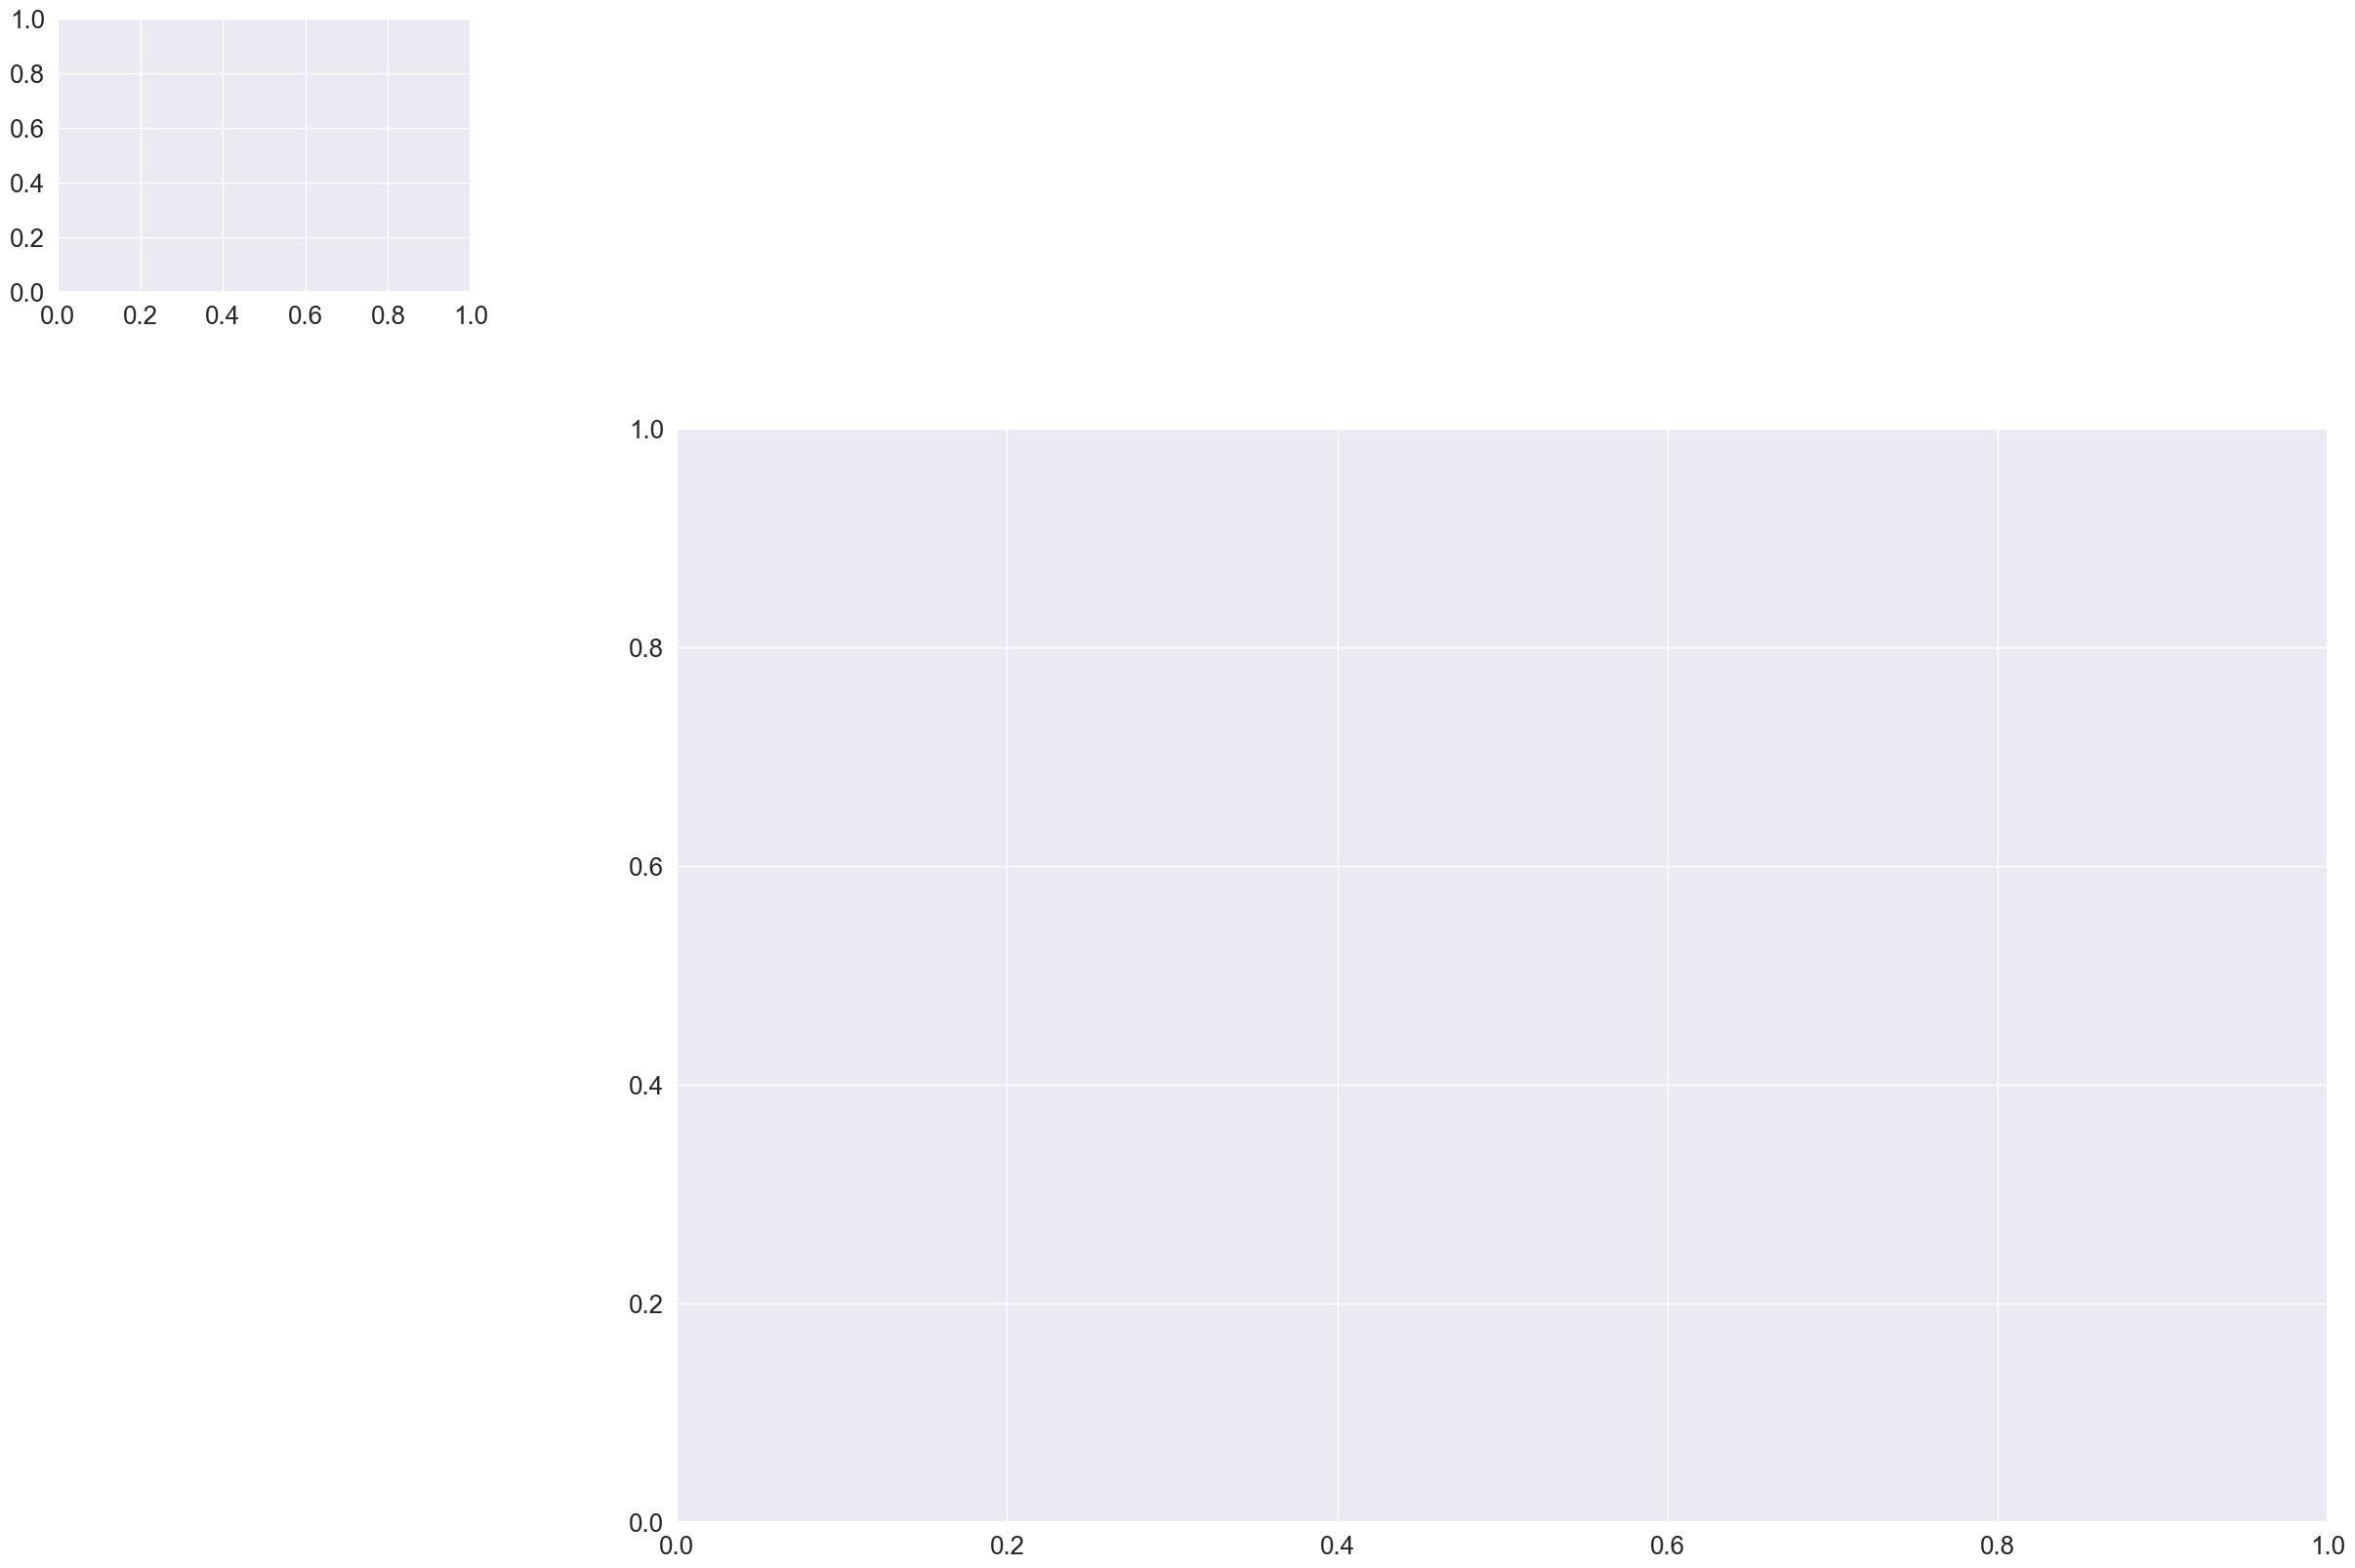

In [141]:
## correlations between continuous variables
#'total_rec_prncp', 'total_rec_int',
columnsToCorr1 = loan.columns.difference({'id','member_id','derived_last_pymnt_d_year','total_rec_late_fee', 'recoveries', 'derived_issue_d_date','collection_recovery_fee','derived_last_pymnt_d_month','derived_title','derived_zip_code','derived_last_pymnt_d','derived_earliest_cr_line_date','derived_last_pymnt_d_date','derived_earliest_cr_line_month','derived_earliest_cr_line_day'}).to_list()
                                         
plot_cluster(columnsToCorr1, loan_corr, 1.7)

Observations :
1. [loan_amount, funded amount, funded amount by investors, total payment to investors, total payment] are highly correlated  and proportional
2. public records and public records of bankruptcies are highly correlated
3. open account and total open account are correlated
4. annual income is 
      A. positively correlated to
          a. revolving credit balance : as income increases higher lesser the use of revol credits causing higher revolving credit balance 
          b. total payments (and other correlated loan payments listed in observation 1) : as income increases, the amount of loan increases which also means higher installament, and it also ensures the timely credit payment causing total_pyment, total investors payment to increase
          c. total accounts & open accounts : as income rises, more accounts can be managed by borrowers
      B. negatively correlates to
          a. dti (slightly 11%) : debt to income ratio tend to reduce as annual income rises
          b. loan status (slightly 6%) : increase in income enables the borrower to pay the credit
          c. pub_rec & pub_rec_bankkruptcies (very less 1-2 %)
5. interest rate is
    A. positively correlated to
        1. total recovered interest [52 %] : obvious relation
        2. revolving utilization of credit [46 %] : as credit utilization increases, possibility of default increases and higher interest rates are charged to compensate the risk involved
        3. loan amount [30 %]: higher amount loans are given with higher interest rates
    B. negatively correlates to
        1. total accounts of the borrower [very less 5%]

6. total recovered principal is
    A. positively correlates to
        a. loan amount (& related features from observation 1)
        b. annual income
        c. revolving balance & total accounts of borrower
    B.  negatively correlates to
        a. public records & public records of bankruptcies
        b. delinq_2yrs
        c. number of credit inquiries made by borrower in last 6 months
Credit history related variables
7. debt to income ratio [dti] is 
    A. positively correlates to 
        1. open accounts
        2. revolving credit utilization %
        3. total accounts
        4. revolving balance
    B. negatively correlates to 
        1. annual income
        2. delinq_2yrs : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

8. delinq_2yrs is
    A. positively correlates to 
        1. interest rate
    B. negatively correlates to
        1. loan amount
        2. revolving credit balance

In [ ]:
#further drilldown on specfic variables
columnsToCorr2 = set(columnsToCorr1).difference({'total_pymnt','total_pymnt_inv','funded_amnt','funded_amnt_inv','total_acc','open_acc','revol_util','derived_disc_length','derived_desc_length','revol_bal'})                                
plot_cluster(columnsToCorr2, loan_corr )

### 2. Common Methods

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) # display property for float

def boxplot_annot(box_plot, summary):
    box_plot.text(box_plot.get_xticks()[0]+0.17, summary['25%'], horizontalalignment='center', s=f'25%: {summary["25%"]}', color='black')
    box_plot.text(box_plot.get_xticks()[0]+0.17, summary['50%'], horizontalalignment='center', s=f'50%: {summary["50%"]}', color='black')
    box_plot.text(box_plot.get_xticks()[0]+0.17, summary['75%'], horizontalalignment='center', s=f'75%: {summary["75%"]}', color='black')

In [ ]:
sns.set()

def remove_outliers_auto(df, column):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    return df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

def handle_outliers(df, col, index, auto_remove_outliers = False, outlier_quantiles=None):
    default_outlier_b = [[2, 98],[2,98]]
    
    if auto_remove_outliers:
        df1 = remove_outliers_auto(df, col)
    else:
        if isinstance(outlier_quantiles, list):
            default_outlier_b = outlier_quantiles
        else:
            print("defaulting outlier quntiles to ",default_outlier_b)
        P = np.percentile(df[col], default_outlier_b[int(index)])
        df1 = df[(df[col] > P[0]) & (df[col] < P[1])]
       
    print(f"outliers removal summary for {col} : \n "+
              f"Total original records {df.shape[0]}, \n"+
              f"Total Records after outlier removal {df1.shape[0]}" )
    
    return df1

def plot_scatter(df, x, y, c=None, auto_remove_outliers=False, outlier_quantile=None):
    
    df1 = handle_outliers(df,  x, 0, auto_remove_outliers, outlier_quantile)
    df1 = handle_outliers(df1, y, 1, auto_remove_outliers, outlier_quantile)
        
    if c:
        sns.scatterplot(x=df1[x],y=df1[y], c= df1[c], cmap=plt.cm.get_cmap("cool",5), alpha=0.5)
    else:
        chargedoff = df1[df1['derived_loan_status_bin']==1]
        fullypaid = df1[df1['derived_loan_status_bin']==0]
        #cmap=plt.cm.get_cmap("cool",5),
        cols=fullypaid.derived_loan_status_bin.map({0:'b', 1:'r'})
        ax = sns.scatterplot(x=fullypaid[x],y=fullypaid[y], c= cols, alpha=0.7, cmap='viridis')
        
        cols = chargedoff.derived_loan_status_bin.map({0:'b', 1:'r'})
        #sns.scatterplot(x=df1[x],y=df1[y], c= cols, alpha=0.8, cmap=plt.cm.get_cmap("cool",5))
        ax = sns.scatterplot(x=chargedoff[x],y=chargedoff[y], c=cols, alpha=0.3, cmap='viridis')
        
    
    #cbar = plt.colorbar(orientation="vertical", extend="both",
    #pad=0.05, shrink=1, aspect=20, format="%.3f")
    #cbar.set_label(label="Concentrations", size=15)
    #cbar.set_ticks([0,5,10])
    #cbar.set_ticklabels(["0 grams","5 million","cats"])
    #cbar.ax.tick_params(labelsize=15)
    #plt.clim(0,10)
    
    title = f"{x} Vs {y}"
    plt.figure(figsize=(15, 7))
    plt.suptitle(title)

    summary = df1[x].describe()
    plt.subplot(1, 2, 1)
    sns.set_style("whitegrid")
    box_plot = df1[x].plot.box()
    boxplot_annot(box_plot, summary)

    summary = df1[y].describe()
    plt.subplot(1, 2, 2)
    sns.set_style("whitegrid")
    box_plot = df1[y].plot.box()
    boxplot_annot(box_plot, summary)
    
    plt.show()

In [ ]:
plot_scatter(loan, 'annual_inc','loan_amnt',outlier_quantile =[[0.1, 99],[0.1, 99]])

1. As borrower's annual income increases, they start getting bigger loans. trend is evident till annual income of 50K
2. High income individuals tend to pay the debts fully.
3. Borrowers with low income tend to have high % of defaulters.

In [ ]:
plot_scatter(defaulters, 'annual_inc','installment',outlier_quantile =[[0.1, 99],[0.1, 99]])

1. Defaulters are more between <=100k annual income and <=700 installment

In [ ]:
# TODO : futher analyse these 2 groups 
loan[loan['annual_inc'] < 100000]
loan[loan['annual_inc'] >= 100000]

In [ ]:
loan['derived_loan_amnt_log'] = np.log10(loan['loan_amnt'])
loan['derived_annual_inc_log'] = np.log10(loan['annual_inc'])

In [ ]:
plot_scatter(loan, 'loan_amnt','derived_int_rate_pct',outlier_quantile =[[0.1, 99],[0.1, 99]])

1. As loan amount increase, the interest rate also increase 
2. defaulters are everywhere, but slightly more percentage with lower loan amount < 15k & interest rates of (>= 9%), though this trend is not consistent

### 3. Analysis of Impact of all variables on target variable ("loan_status")

#### Distribution of 'loan_status' in the dataset

In [ ]:
loan_status_percent = loan['derived_loan_status'].value_counts()
loan_status_percent

In [ ]:
loan_status_percent = loan['derived_loan_status'].value_counts(normalize=True)
loan_status_percent

1. ~15 % credits have defaulted. 
2. Only considering the population of loans which are either fully paid / defaulted. 
3. Not considering the ongoing 'current' credits

#### Common methods definitions

In [ ]:
# method to display boxplot
def plot_segmented_boxplot(segment_col, metric_col, title, figsize=(6, 6), plot_order=None, xtick_rot=0, show_stats=True, remove_outliers=False, outlier_threshold=0.95):
  
    temp_loan = loan
    if remove_outliers:
        temp_loan = loan[loan[metric_col] < loan[metric_col].quantile(outlier_threshold)]

    plt.figure(figsize=figsize)
    groupby = temp_loan.groupby(segment_col)[metric_col]
    segmented_summary = groupby.describe()

    ax = sns.boxplot(data=temp_loan, x=segment_col, y=metric_col, order=plot_order)
    plt.title(title)
    plt.xticks(rotation=xtick_rot)
    plt.show()

    if show_stats:
        return segmented_summary

In [ ]:
# method to display countplot
def add_countplot_annots(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{round(100 * p.get_height() / total, 2)}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom', rotation=90)

def segmented_countplot(data, x, hue, title, figsize=(7, 5), annot=True, scale=False):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=x, hue=hue, palette=sns.color_palette('pastel'), log=scale)
  
    if annot:
        add_countplot_annots(ax)
    plt.title(title)
    plt.legend(loc='upper right')
    plt.xticks(rotation=90)

In [ ]:
def per_category_percentplot(df, x, y, figsize=(7, 5)):
    """ input paramters :
             1. df : dataframe, 
             2. x: category column, 
             3. y: hue column
             4. figsize : figure size, defaults to (7,5)
    """
    (df
        .groupby(x, observed=True)[y]
        .value_counts(normalize=True)
        .mul(100)
        .rename('percent')
        .reset_index()
        .pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar',height=3, aspect=2))
    plt.xticks(rotation=90)

In [ ]:
def categorizeContinuousFeature(df, col, ncats):
    l = pd.cut(df[col], bins=ncats,precision =0)
    #l.cat.categories.value_counts().to_frame().index
    labels=[]
    for cat in l.cat.categories:
        labels.append(str(round(cat.left,2)).strip()+'-'+str(round(cat.right,2)).strip())
    df[col+'_cats'] = pd.cut(df[col], bins=ncats,precision =0, labels=labels)
    return labels

## Continuous features

In [ ]:
def plotsForContinuousVariables(input_col, df=loan, hue_col = 'derived_loan_status', num_cuts=8):
    
    col = input_col
    if 'derived_' in input_col:
        col = input_col.split('derived_')[1]
        
    plot_segmented_boxplot(hue_col, input_col, f"{col} Vs Loan Status", (10, 5), None, 90)
    
    #divide the variable into categories
    col_cats = categorizeContinuousFeature(df, input_col, num_cuts)
    print(f"categories created for {col} {col_cats}")
    
    cats_col_name = f"{input_col}_cats"
    plt.xticks(rotation=90)
    sns.countplot(x=cats_col_name, data= df) #loan[loan['derived_loan_status'] == 'charged off'])
    
    # loan_status across the categories of loan amount
    segmented_countplot(df, cats_col_name, hue_col, f"Loan status for {col} categories", (12, 6), annot=True)

    per_category_percentplot(df, cats_col_name, 'derived_loan_status' )

In [ ]:
def percategoryplots(basecol, df = loan, hue_col = 'derived_loan_status') :
    cats_col = basecol+'_cats'
    for cat in loan[cats_col].value_counts().index :
        imputedcol = cats_col+'_'+cat
        print(imputedcol)
        df[imputedcol] = df[df[cats_col]==cat][cats_col]
        plotsForCategoricalVariables(imputedcol, hue_col = hue_col, df=df)

### 3.2 'Loan Amount' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('loan_amnt')

In [ ]:
plotsForContinuousVariables('derived_int_rate_pct', hue_col='loan_amnt_cats', df=loan[loan['derived_loan_status']=='charged off'])

1. As loan amount increases, interest rates also increases
2. more number of loans given are from 5-17%
3. % of defaults increase as interest rates increase

In [ ]:
#loan[imputedcol] = loan[loan['loan_amnt_cats']=='4812.0-9125.0']['loan_amnt_cats']
#percategoryplots('loan_amnt', hue_col='derived_purpose', df=loan[loan['derived_loan_status']=='charged off'])

###  3.3 'Annual Income' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('annual_inc')

1. 25th, 50th, 75th percentiles of annual income of charged off credits are lower than fully paid credits  : low annual income individuals are more likely to charge off the credit
2. First 4 categories (ie people making annual income till 133k ) tend to borrow more loan than people making more money annually
3. Income range 90k+  has less chances of charged off.
4. Income range 0-32k has high chances of charged off.
5. Notice that with increase in annual income charged off proportion got decreased. 

###  3.4 'Interest Rate' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('derived_int_rate_pct')

1. Higher interest rates see higher loan defaults [Refer first graph of percentiles]
2. More loans are distributed between 5-17% of interest rates
3. loans w/ higher interest rates are more likely to be charged off, strong trend
4. loan w/ int rates till 10 % have less chance of getting charged off (<= 8%).

In [ ]:
#loan[['derived_installment_to_monthly_salary_ratio','derived_int_rate_pct_cats','dti','annual_inc','loan_amnt','derived_loan_to_income_ratio','derived_loan_status_bin']].groupby('derived_int_rate_pct_cats').mean()

To drill down on interest rate behavior on increased defaults, the above group by provides more insights

As interest rate increase, we observe :
    1. increase in debt to income ratio, 
        there are 2 possibilities : 
        1. high amount loans tend to have higher interest rates, resulting in more debt
        2. risky customers : Lending club has already seen the risk and hence increased the int rest to compensate the risk 

    2. increase in annual income  :
        1. more the annual income, more loan people can get & afford, which has more int rate
    3. increase in loan_aount 
    4. increase in derived_loan_to_income_ratio :
    5. increase in rate of defaults

In [ ]:
loan[['derived_int_rate_pct_cats','dti','annual_inc','loan_amnt','derived_loan_to_income_ratio','derived_loan_status_bin','derived_grade','installment']].groupby(['derived_int_rate_pct_cats', 'derived_grade']).mean()

Observations :
1. at lower interest rates 5.0-8.0, borrowers are able to pay the 'D' &'E' grade loans as their dti was low
2. at higher interest rates, though avg annual income increases, the 'dti' has significantly increased in the range of 11-16, installments have increased, loan_to_annaul_income_ratio increases and rate of borrowers also increases to the range of [20-40]%

more Visualization below

###  3.5 'dti' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('dti')

1. borrowers with dti of 7-10 are getting loan more than rest
2. there is a slight increase in the % of loan getting 'charged off' from dti score of 7-26
3. borrowers w/ dti score of 26+ and 0 to 7 are less likely [10-13%] to charge off the loan

###  3.6 'desc_length' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('derived_desc_length')

1. Most of the borrower's enter lesser words (<= 500) in the description
2. Borrowers putting bigger descriptions (>1k words) are more like to 'charge off' the loan

###  3.7 'installment' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('installment')

1. Most of the loans have installments <= 500
2. As instllament amount increase there is slight increase in the 'loan default rate'
3. installments from 822-983 have highest loan default rate

###  3.8 'revol_util_pct' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('derived_revol_util_pct')

1. number of borrowers increase with the rate of utilization of available revolving credit
2. rate of defaulting sligtly increase as the rate of revol util increases, which seems obious as people tend to use more credit and eventually charge of some loans.

###  3.9 'revol_util' vs 'Loan Status'

In [ ]:
plotsForContinuousVariables('revol_bal')

1.lesser the revol credit balance, higher the 'charge off' rate
clearly proves the observations in  revol_util above, as revol_bal and revol_util are inverse to each other

## Categorical Features

In [ ]:
def plotsForCategoricalVariables(col, hue_col='derived_loan_status', df = loan):
    
    plt.xticks(rotation=90)
    sns.countplot(x=col, data= df)#loan[loan['derived_loan_status'] == 'charged off'])
    plt.show()
    
    # loan_status for derived_verification_status
    titleCol = col
    if 'derived_' in col:
        titleCol = col.split('derived_')[1]
    segmented_countplot(df, col, hue_col, 'Loan status per '+ col, (10, 6))
    
    per_category_percentplot(df, col, hue_col )
    plt.show()

### 3.10 'Grade' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_grade')

Observations:
1. loan grades of a-d are very frequent, e-g grades are comparatively rare
2. increase in loan grade significantly increases default risk

Imp References :

    1. wrt https://www.lendingclub.com/foliofn/rateDetail.action, interest rates increase from a-g in increasing order
    2. As per table 3, higher loan amount gives some benefit in the loan grade
    3. Higher term [ie 60 months], provides 8-4 points benefits in interest rate


### 3.11 'sub_grade' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_sub_grade', df=loan.sort_values(by='derived_sub_grade'))

1. a1-d5 subgrade loan are very frequent than loan in the cat e1-g5
2. risk of defaults increases significantly as we move from a1-g5, this is obvious as the interest rates also increase from a1=g5.

### 3.12 'emp_length' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_emp_length')

1. As the number of years of exp increases, freq of credit availed descrease. though freq of 10+ years exp is maximum.
2. No specific trend in the default behavior except there is 21% chance of default in case of 10 yrs of exp.
3. Unknown emp length has most likelihood of defaults [22%]

In [ ]:
loan[loan['derived_emp_length']=='unknwon'][['derived_purpose','derived_loan_status_bin','derived_loan_status']].groupby(by=['derived_purpose','derived_loan_status']).count() #loan['derived_emp_length'].value_counts()

### 3.13 'addr_state' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_addr_state')

1. CA has more number of borrowers, followed by NY and FL
2. Nebraska has more % of defaults [60%], followed by NV (Nevada), SD (South Dacota) and FL (Florida)

### 3.14 'purpose' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_purpose')

1. Most of the loans are for debt_consolidation, followed by credit card and other
2. Categorywise Risk of defaults lies 
    1. small business [27%]
    2. renewable energy [19%]
    3. educational [17%]
3. Frequency based Risk of default lies with :
    1. debt_consolidation [2k+]
    2. other [400+]
    3. credit card [400+]

### 3.15 'verification_status' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_verification_status')

Observations :
   1. verified loans have more % of defaults, followed by 'source verified' followed by 'not verified'
   2. Frquency wise, number of cases of default in verified and not verified are nearly equal

### 3.16 'issue_month' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_issue_d_month')

1. Number of loans given increase from Jan-Dec
2. number of loans defaulted increase from Jan -Dec, however % wise its almost the same
No specific trend for defaults observed

### 3.17 'issue_year' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_issue_d_year')

1. Number of loans issued increase from 2007-2011
2. number of loans defaulted increase from 2007-2011, however % wise its almost the same
No specific trend for defaults observed

### 3.18 'home_ownership' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_home_ownership')

1. borrowers with Rented house or mortgage, tend to be more frequent type of borrowers
2. Frequency wise, higher risk of default lies with rented followed by mortgage
3. category wise, 'other' typed borrowers have higher risk of default [19%], followed by
    rent [15 %]
    own [15 %]
    mortgage [13 %]

### 3.19 'delinq_2yrs' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='delinq_2yrs',  df=loan[loan['delinq_2yrs']>0])

1. There are borrowers having delinq history, though the proportion is small.
2. Among the borrowers with delinq history, 1 & 2 occurences are more frequent than others
2. risk of default increases as delinq occurrences increase 

### 3.20 'inq_last_6mths' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='inq_last_6mths',  df=loan[loan['delinq_2yrs']>0])

1. Risk of default generally increases as number of inquiries for credit increase

### 3.21 'open_acc' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='open_acc')

1. no specific trend, however some spikes towards higher number of open accounts, but the frequency is very less

### 3.22 'pub_rec_bankruptcies' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='pub_rec_bankruptcies',  df=loan[loan['pub_rec_bankruptcies']>0])

1. strong indicator of default, more than 20% of chances of default in both the cases

### 3.23 'pub_rec' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='pub_rec',  df=loan[loan['pub_rec']>0])

1. Strong indicator of defaulting borrower in case of 1 & 2 records, its above 20%
2. there are no occurences of 3 & 4

### 3.24 'term' vs 'Loan Status'

In [ ]:
plotsForCategoricalVariables(col='derived_term')

1. Strong indicator of defaulting borrower in case of 1 & 2 records, its above 20%
2. there are no occurences of 3 & 4

##  4. Bivariate Analysis - Categorical variables

In [ ]:
def generateHeatmap(x, y, data=loan, figsize=(10,5)):
    """
        Parameters:
            data : defaulted at the 'loan' variable, but can be changed externally if needed
            x, y : columns of data in the corresponding axis, both categorical
            figsize : a default have is given, but can be overridden
        Returns:
            None, does a heatmap plot
    """
    sns.set(font_scale=0.6)
    title = f"Heatmap of {x} vs {y}"
    fig, ax = plt.subplots(figsize=figsize)
    pt = pd.pivot_table(data=data, values='derived_loan_status_bin', index=y, columns=x)
    sns.heatmap(pt, cmap='cool', annot=True)
    if title is not None:
        plt.title(title)
    plt.show()

In [ ]:
generateHeatmap(x='derived_purpose', y='derived_home_ownership')

In [ ]:
generateHeatmap(x='derived_purpose', y='annual_inc_cats', figsize=(10,4))

Small business is seeing increased default rate at even medium-bigger annual income
same pattern with less intensity can be observed in det_consolidation and other

In [ ]:
generateHeatmap(x='dti_cats', y='annual_inc_cats', figsize=(10,4))

lower and middle income borrowers show high default rates across all DTI categories

In [ ]:
generateHeatmap(x='dti_cats', y='derived_int_rate_pct_cats', figsize=(10,4))

At highest int rates even the lowest DTI category is not able to cope up

In [ ]:
generateHeatmap(x='dti_cats', y='derived_purpose', figsize=(10,4))

1. small business tend to have highest rate of defaults across all dti cats
2. educational loans tend to have higher rate of default even at the lowest DTI category [0-4] and also
  in [19-26] DTI scores
3. moving, other, renewable enrgy, educational, debt consolidation show higher chances of default at higher DTI rates

1. even the lowest dti borrowers [0-4] find it difficult to pay the loan at highest rates[22-24]

In [ ]:
generateHeatmap(x='derived_int_rate_pct_cats', y='loan_amnt_cats', figsize=(10,4))

higher interest rates at any loan amount are causing defaults

In [ ]:
generateHeatmap(x='installment_cats', y='annual_inc_cats', figsize=(10,4))

Lower income borrowers have higher

In [ ]:
generateHeatmap(x='installment_cats', y='derived_purpose', figsize=(10,4))

In [ ]:
generateHeatmap(x='installment_cats', y='derived_emp_length', figsize=(10,4))

In [ ]:
generateHeatmap(x='derived_addr_state', y='derived_purpose', figsize=(22,8))

1. small business tend to default the loans across all states, followed by other and debt consolidations
2. greater than 50 % defaults are observed :
    small business loans in DE, NM, WV, WY
    vacation loans in AK, HI, OR
    renewal energy loan : UT
    wedding loans in MS, OR
    education loans in AR, KS, UT  

## 5. Computed variables

### 5.1 (applied loan - Amount funded )
Significance : loan amount is not completely utilized
    1. not required, credit availed is fully paid
    2. defaulted

In [ ]:
loan['appliedMinusFunded'] = loan['loan_amnt'] - loan['funded_amnt']

In [ ]:
loan['appliedMinusFunded'].sum()

In [ ]:
loan[loan['appliedMinusFunded'] > 0].describe()

In [ ]:
loan[loan['appliedMinusFunded'] > 0].describe()

In [ ]:
loan[loan['appliedMinusFunded'] > 0]['derived_loan_status'].value_counts()

In [ ]:
loan[loan['appliedMinusFunded'] == 0]['derived_loan_status'].value_counts()

In [ ]:
plotsForContinuousVariables('appliedMinusFunded', num_cuts=20)

In [ ]:
plotsForContinuousVariables('loan_amnt', df =loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForContinuousVariables('installment', df =loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_purpose', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_term', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_int_rate_pct_cats', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_issue_d_month', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_home_ownership', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_emp_length', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_addr_state', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='dti_cats', df = loan[(loan['appliedMinusFunded'] > 0) ])

In [ ]:
plotsForCategoricalVariables(col='derived_grade', df = loan[(loan['appliedMinusFunded'] > 0) ])

### 5.2 (loan_amnt / annual income)
Significance :
    1. borrower's capacity to pay the loan

In [ ]:
loan['derived_loan_to_income_ratio'] = loan['loan_amnt']/loan['annual_inc']

In [ ]:
loan['derived_loan_to_income_ratio'].describe()

In [ ]:
plotsForContinuousVariables('derived_loan_to_income_ratio')
categorizeContinuousFeature(loan, 'derived_loan_to_income_ratio', ncats=4)

In [ ]:
plotsForCategoricalVariables(col='derived_loan_to_income_ratio_cats')

In [ ]:
plotsForCategoricalVariables(col='derived_emp_length', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
labels = categorizeContinuousFeature(loan, 'installment', ncats=8)

plotsForCategoricalVariables(col='installment_cats', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:

plotsForCategoricalVariables(col='derived_purpose', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
plotsForCategoricalVariables(col='derived_home_ownership', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
plotsForCategoricalVariables(col='derived_grade', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
plotsForCategoricalVariables(col='derived_term', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
plotsForCategoricalVariables(col='dti_cats', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='dti_cats', hue_col='derived_loan_to_income_ratio_cats', df = loan[(loan['derived_loan_status'] == 'charged off') ])

In [ ]:
# deep dive into derived_loan_to_income_ratio_cats against loan status
g1 = loan[loan['derived_loan_to_income_ratio_cats'].isin(['0.0-0.2']) ] 
g2 = loan[loan['derived_loan_to_income_ratio_cats'].isin(['0.2-0.4']) ] 
g1_2 = pd.concat([g1,g2])

g3 = loan[loan['derived_loan_to_income_ratio_cats'].isin(['0.4-0.6']) ] 
g4 = loan[loan['derived_loan_to_income_ratio_cats'].isin(['0.6-0.8']) ] 
g3_4 = pd.concat([g3,g4])
#plotsForCategoricalVariables(col='dti_cats', df = l )
g2['derived_loan_status'].value_counts()

In [ ]:
g1['annual_inc'].mean(), g1['annual_inc'].median()

In [ ]:
g1_good = g1[g1['derived_loan_status']=='fully paid']
g1_bad = g1[g1['derived_loan_status']!='fully paid']

g3_good = g3[g3['derived_loan_status']=='fully paid']
g3_bad = g3[g3['derived_loan_status']!='fully paid']

print(
g1_good['annual_inc'].mean(), g1_good['annual_inc'].median(),
g1_bad['annual_inc'].mean(), g1_bad['annual_inc'].median(),
g3_good['annual_inc'].mean(), g3_good['annual_inc'].median(),
g3_bad['annual_inc'].mean(), g3_bad['annual_inc'].median())

In [ ]:
g2_good = g2[g2['derived_loan_status']=='fully paid']
g2_bad = g2[g2['derived_loan_status']!='fully paid']

g4_good = g4[g4['derived_loan_status']=='fully paid']
g4_bad = g4[g4['derived_loan_status']!='fully paid']

print(
g2_good['annual_inc'].mean(), g2_good['annual_inc'].median(),
g2_bad['annual_inc'].mean(), g2_bad['annual_inc'].median(),
g4_good['annual_inc'].mean(), g4_good['annual_inc'].median(),
g4_bad['annual_inc'].mean(), g4_bad['annual_inc'].median())

In [ ]:
loan['annual_inc'].mean(),loan['annual_inc'].median()

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='derived_int_rate_pct_cats',  df = g1 )

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='annual_inc_cats',  df = g1 )

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='loan_amnt_cats',  df = g1 )

In [ ]:
#sns.catplot(loan,y='loan_amnt_cats',x='annual_inc_cats',hue='derived_loan_to_income_ratio_cats',col='derived_loan_status')

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='derived_purpose',  df = g1 )

In [ ]:
# deep dive into dti against loan status
plotsForCategoricalVariables(col='derived_revol_util_pct_cats',  df = g1 )

In [ ]:
plotsForCategoricalVariables(col='derived_loan_to_income_ratio_cats',  df = loan)

In [ ]:
plotsForCategoricalVariables(col='derived_loan_to_income_ratio_cats', hue_col='appliedMinusFunded_cats', df = loan)

In [ ]:
plotsForCategoricalVariables(col='derived_loan_to_income_ratio_cats', hue_col='appliedMinusFunded_cats', df = loan[loan['derived_loan_status']=='charged off'])

In [ ]:

plotsForCategoricalVariables(col='derived_loan_to_income_ratio_cats', hue_col='appliedMinusFunded_cats', df = loan[loan['derived_loan_status']=='charged off'])

### 5.3 (loan_amnt / annual income)
Significance :
    1. borrower's capacity to pay the loan

In [ ]:
#loan['derived_installment_to_monthly_salary_ratio'] = loan['installment']/(loan['annual_inc']/12)

In [ ]:
plotsForContinuousVariables('derived_installment_to_monthly_salary_ratio')

In [ ]:
loan['monthly_inc'] = loan['annual_inc']/12
categorizeContinuousFeature(loan, 'monthly_inc', 8)
plotsForContinuousVariables('derived_installment_to_monthly_salary_ratio',df=loan[loan['derived_loan_status'] == 'fully paid'], hue_col='monthly_inc_cats')

1. as salary increases, installment_to_monthly_salary_ratio tend to decrease a lot, strong pattern, 
   which clearly indicates that borrowers with lesser income have bigger part of their monthly income going in to pay the installments
2. above installment_to_monthly_salary_ratio of 0.08, all the borrowers are mostly from lower income groups,
   which clearly indicates that why they are not keeping up with the loan and eventually default

In [ ]:
plotsForCategoricalVariables('dti_cats',df=loan, hue_col='derived_installment_to_monthly_salary_ratio_cats')

## Categorical columns classification
A. customer attributes : 
                    1.  derived_addr_state,
                    2.  derived_zip_code, 
                    3.  derived_emp_length, 
                    4.  derived_emp_title, 
                    5.  derived_emp_length,
                    6.  derived_home_ownership,

B. customer credit history related attributes : 
                    7.  derived_earliest_cr_line_year,
                    8.  derived_earliest_cr_line_month ,
                    9.  delinq_2yrs, 
                    10. inq_last_6mths

C. loan attributes : 
                    11. derived_grade, 
                    12. derived_sub_grade , 
                    13. derived_issue_d, 
                    14. derived_issue_month  , 
                    15. derived_issue_year ,
                    16. derived_term ,
                    17. derived_last_pymnt_d, 
                    18. derived_last_pymnt_d_year ,
                    19. derived_verification_status, 
                    20. derived_purpose , 
                    21. derived_title, 
                    22. derived_loan_status , 

## continuous columns classification

A. customer attributes : 
            1. annual_inc,  YES
            2. dti,         YES

B. customer credit history related attributes :
            3. delinq_2yrs,   Cat YES
            4. derived_earliest_cr_line_date, NO
            5. inq_last_6mths,   cat YES
            6. open_acc,         cat YES
            7. pub_rec,          cat YES
            8. pub_rec_bankruptcies,  
            9. recoveries,
            
C. loan attributes :
            10. collection_recovery_fee,  No
            11. derived_desc_length,      YES  
            12. derived_int_rate_pct,     YES
            13. derived_issue_date        NO
            14. derived_last_pymnt_d_date, NO 
            15. funded_amnt,          NO
            16. funded_amnt_inv,
            17. installment,         YES
            18. last_pymnt_amnt,      NO
            19. loan_amnt,        YES
            20. total_pymnt,        NO
            21. total_pymnt_inv,    NO
            22. total_rec_int,      NO
            23. total_rec_late_fee,  NO
            24. total_rec_prncp,      NO
            25. revol_bal            either of these 2
            26. derived_revol_util_pct   

## 6. important features cumulated

In [ ]:
loan['total_recovery_cost'] = loan['collection_recovery_fee'] + loan['recoveries']
loan['derived_loan_status_bin'] = loan['derived_loan_status'].apply(lambda x: 1 if x == 'charged off' else 0)
loan['loan_to_income_all'] = 100*loan['loan_amnt']/loan['annual_inc']

all_agg_grouped_on_purpose = loan[['loan_to_income_all','total_recovery_cost','derived_loan_status_bin','annual_inc','loan_amnt','funded_amnt','funded_amnt','derived_int_rate_pct','dti','derived_revol_util_pct','derived_loan_status','derived_purpose']].groupby(by=['derived_purpose'])
all_agg = all_agg_grouped_on_purpose.sum()
all_agg['count'] = all_agg_grouped_on_purpose['annual_inc'].count()

all_agg['loan_to_income'] = 100*all_agg['loan_amnt']/all_agg['annual_inc']
all_agg['loan_to_income_all_com'] = all_agg['loan_to_income_all']/all_agg['count']
all_agg['charge_off_ratio'] = 100*all_agg['derived_loan_status_bin']/all_agg['count']
all_agg['average_int_rate'] = all_agg['derived_int_rate_pct'] / all_agg['count']
all_agg['avg_recovery_cost'] = all_agg['total_recovery_cost'] / all_agg['count']
all_agg['loan_cases_avg'] = 100*all_agg['count'] / loan.shape[0]
all_agg['derived_revol_util_pct'] = all_agg['derived_revol_util_pct'] / all_agg['count']
all_agg['dti'] = all_agg['dti'] / all_agg['count']
#all_agg['applied_loan_minus_funded'] = all_agg['loan_amnt'] - all_agg['funded_amnt']
#all_agg['funded_minus_inverstors'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']
#all_agg['average_int_rate'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']

all_agg

In [ ]:
defaulters['total_recovery_cost'] = defaulters['collection_recovery_fee'] + defaulters['recoveries']
defaulters['derived_loan_status_bin'] = defaulters['derived_loan_status'].apply(lambda x: 1 if x == 'charged off' else 0)
defaulters['loan_to_income_all'] = 100*defaulters['loan_amnt']/loan['annual_inc']

all_agg_grouped_on_purpose = defaulters[['loan_to_income_all','total_recovery_cost','derived_loan_status_bin','annual_inc','loan_amnt','funded_amnt','funded_amnt','derived_int_rate_pct','dti','derived_revol_util_pct','derived_loan_status','derived_purpose']].groupby(by=['derived_purpose'])
all_agg = all_agg_grouped_on_purpose.sum()
all_agg['count'] = all_agg_grouped_on_purpose['annual_inc'].count()

all_agg['loan_to_income'] = 100*all_agg['loan_amnt']/all_agg['annual_inc']
all_agg['loan_to_income_all_com'] = all_agg['loan_to_income_all']/all_agg['count']
all_agg['charge_off_ratio'] = 100*all_agg['derived_loan_status_bin']/all_agg['count']
all_agg['average_int_rate'] = all_agg['derived_int_rate_pct'] / all_agg['count']
all_agg['avg_recovery_cost'] = all_agg['total_recovery_cost'] / all_agg['count']
all_agg['loan_cases_avg'] = 100*all_agg['count'] / defaulters.shape[0]
all_agg['derived_revol_util_pct'] = all_agg['derived_revol_util_pct'] / all_agg['count']
all_agg['dti'] = all_agg['dti'] / all_agg['count']
#all_agg['applied_loan_minus_funded'] = all_agg['loan_amnt'] - all_agg['funded_amnt']
#all_agg['funded_minus_inverstors'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']
#all_agg['average_int_rate'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']

all_agg

In [ ]:
non_defaulters['total_recovery_cost'] = non_defaulters['collection_recovery_fee'] + non_defaulters['recoveries']
non_defaulters['derived_loan_status_bin'] = non_defaulters['derived_loan_status'].apply(lambda x: 1 if x == 'charged off' else 0)
non_defaulters['loan_to_income_all'] = 100*non_defaulters['loan_amnt']/loan['annual_inc']

all_agg_grouped_on_purpose = non_defaulters[['loan_to_income_all','total_recovery_cost','derived_loan_status_bin','annual_inc','loan_amnt','funded_amnt','funded_amnt','derived_int_rate_pct','dti','derived_revol_util_pct','derived_loan_status','derived_purpose']].groupby(by=['derived_purpose'])
all_agg = all_agg_grouped_on_purpose.sum()
all_agg['count'] = all_agg_grouped_on_purpose['annual_inc'].count()

all_agg['loan_to_income'] = 100*all_agg['loan_amnt']/all_agg['annual_inc']
all_agg['loan_to_income_all_com'] = all_agg['loan_to_income_all']/all_agg['count']
all_agg['charge_off_ratio'] = 100*all_agg['derived_loan_status_bin']/all_agg['count']
all_agg['average_int_rate'] = all_agg['derived_int_rate_pct'] / all_agg['count']
all_agg['avg_recovery_cost'] = all_agg['total_recovery_cost'] / all_agg['count']
all_agg['loan_cases_avg'] = 100*all_agg['count'] / non_defaulters.shape[0]
all_agg['derived_revol_util_pct'] = all_agg['derived_revol_util_pct'] / all_agg['count']
all_agg['dti'] = all_agg['dti'] / all_agg['count']
#all_agg['applied_loan_minus_funded'] = all_agg['loan_amnt'] - all_agg['funded_amnt']
#all_agg['funded_minus_inverstors'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']
#all_agg['average_int_rate'] = all_agg['funded_amnt'] - all_agg['funded_amnt_inv']

all_agg


# Recommendations and Conclusions

## Observations


### Features Related to Borrower’s Credit History & Profile

1. lower Annual Income [ below 90K]
2. higher Employment length : Unknown / Missing employment history [22 %]
3. Home ownership isin (other, Rent, owned)
4. Address State isin (NE Nebraska, NV Nevada, SD South Dacota AK Alaska and FL Florida)
5. higher DTI [above 11 %]
6. higher Revolving credit util [above 37%]
7. higher Credit inquiries in last 6 months [above and equal to 1]
8. higher Delinq occurrences in last 2 years [greater than equal to 1]
9. higher Number of Public record of bankrupcies [greater than equal to 1]
10. higher Number of derogatory public records [1 or 2]


### Features Related to current Loan application :

1. higher Loan amount [ > 13k]
2. higher Interest Rate [above 13%]
3. higher Installment [above 338]
4. higher Loan Grade [on and above grade C], same observations through Loan Sub Grades
5. Loan purpose isin [Small Business(27%), Renewable Energy(19%), Educational loan(17%)]
6. Verification Status isin [Verified (17%), source verified (15%), not verified (13%)]
7. Loan Issue Month isin [Dec, May, Sep, Oct)
8. Loan repayment Term is [60 months term 25%]

### Impact analysing Multiple Features

1. High Loan amount and High Interest rates for Low Annual income borrowers
2. High Installments with Lower Annual Income and Longer Term
3. High Installments with higher Interest Rates for longer Term
4. High DTI individual with Lower income


## Recommendations

1. Borrowers with Lower Income should be provided loans considering
    
    A. Loan amount should be based on interest rates, term, installments, dti and delinq history so that 
        a. loan amount should not be too high  [possible loss of business but Risky]
        b. OR the installments are payable by the borrower

    B. should be reviewd for DTI, delinq history, revolving util and inquiries for credit on a regular basis


2. Different Loan purposes have different behavior and they should be evaluated based on
  
    A. Annual Income, Credit history (DTI, revol_util, delinq, credit_inquiries and public records), Borrower specific information (Borrowers State, employment length), Loan Grade


3. Different Loan purposes have different behavior and they should be evaluated based on
  
    A. Annual Income, Credit history (DTI, revol_util, delinq, credit_inquiries and public records), Borrower specific information (Borrowers State, employment length), Loan Grade


Verifications ie both ‘Verification’ & ‘Source Verification’need some more improvements as the default rate is still high.

    A. Considering that verifications may have done in the cases of risky loans and those cases may have been addressed for the involved Risk, either by increasing the interest rates / reduing loan amount / adjusting the term, these adjustments needs a review whether the risk is getting mitigated. As we still see the defaults in these scenarios. 


High Risk loan can be reduced on by

    A. Reducing loan amount / adjusting the installment, interest rate and term to compensate the risk
    B. asking for co-borrowers / collateral
    C. getting Investors / Credit Default Swaps
